# Análisis y procesamiento de la señal de habla

In [35]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtp
import matplotlib.patches as mpatches

SIZE_FACTOR = 2

mtp.rcParams['figure.figsize'] = (13, 7)
mtp.rcParams['figure.dpi'] = 150

## 1) Grafique la señal de voz del archivo hh15.wav, ubicando en ella porciones de señales que se o correspondan con fonemas sonoros y sordos. Segmentar y etiquetar en forma aproximada cada uno del los fonemas presentes en la señal.

Fonemas a mano por Gastón en `Letter.LETTERS_POSITION`

Rate: 16000 | Muestras: 54656 | Duracion 3.416s | Duracion/Muestras = 6.25e-05


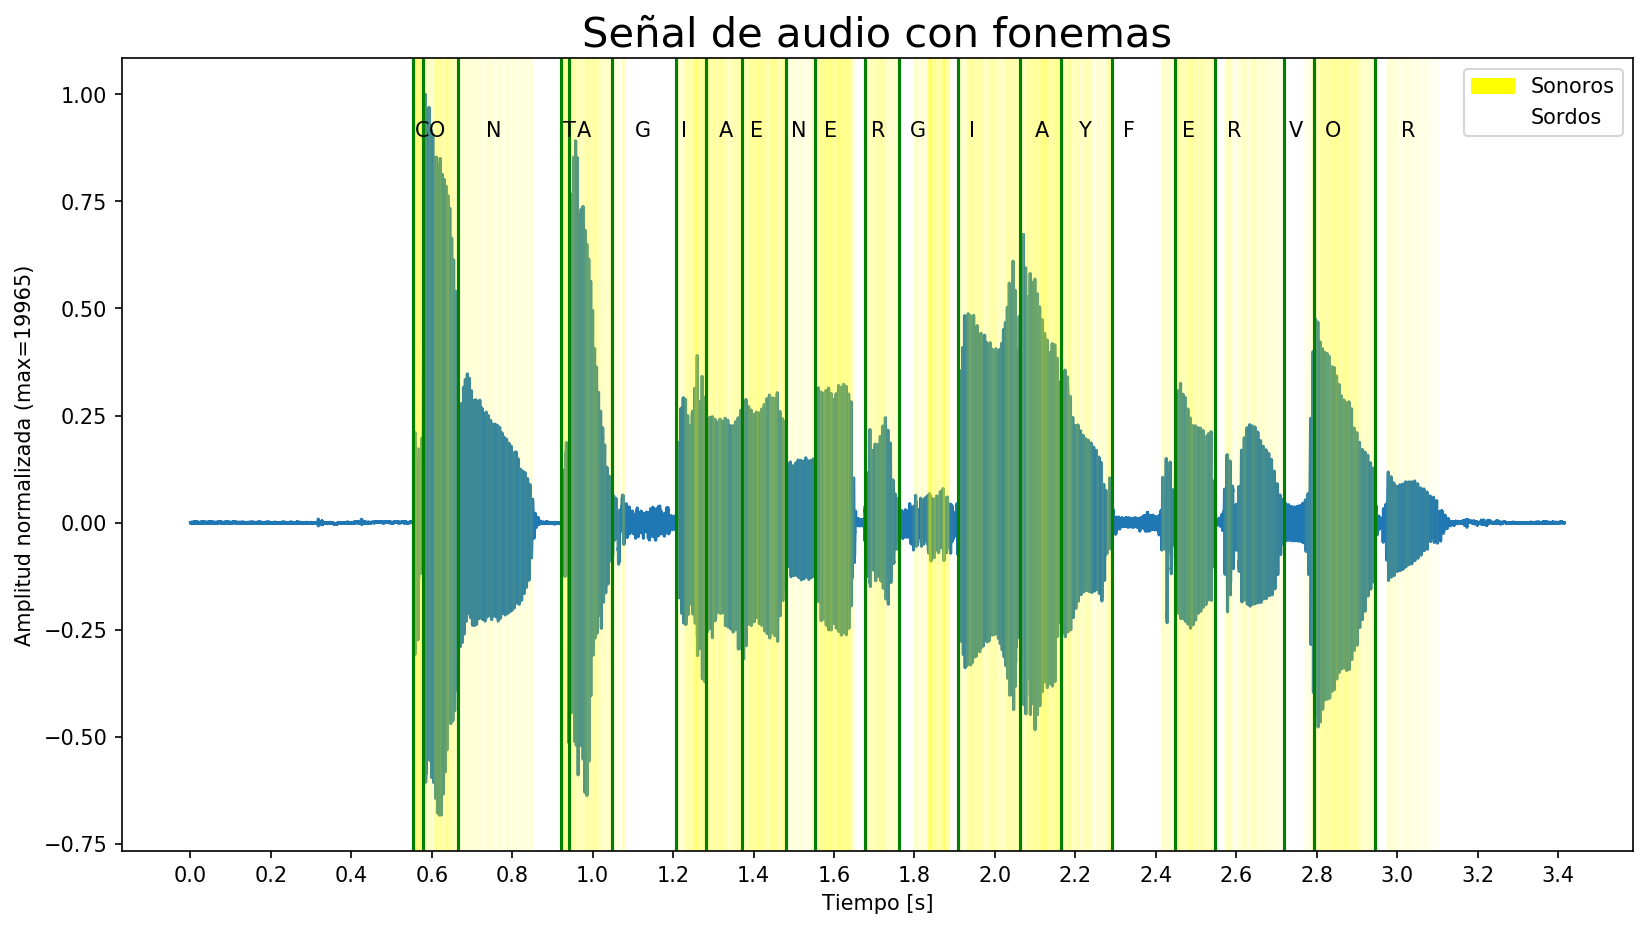

In [390]:
from scipy.io import wavfile
from tp.vocal import Letter

(FS, Y) = wavfile.read("res/hh15.WAV")

# Duracion
L = len(Y)/FS
print("Rate: {} | Muestras: {} | Duracion {}s | Duracion/Muestras = {}".format(FS, len(Y), L, L/len(Y)))

X = np.arange(0, len(Y))/FS
Y_max = max(Y)
Y = Y/Y_max # Y normalizado

plt.title(r'Señal de audio con fonemas', fontsize=20)
plt.plot(X, Y) 
plt.xticks(np.arange(min(X), max(X), 0.2))

UMBRAL = 0.05
inicia_mudo = False
for x, v in zip(X,Y):
    v = abs(v)
    if inicia_mudo and v > UMBRAL:
        plt.axvline(x=x, alpha=0.05, color="yellow")
        inicia_mudo = False
    if v <= UMBRAL and not inicia_mudo:
        inicia_mudo = True    

red_patch = mpatches.Patch(color='yellow', label='Sonoros')
white_patch = mpatches.Patch(color='white', label='Sordos')
plt.legend(handles=[red_patch,white_patch])

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud normalizada (max={})".format(Y_max))

for l in Letter.LETTERS_POSITION:
    y = 0.9
    x = l.start + (l.end - l.start)*.35
    plt.text(x, y, l.char)
    plt.axvline(x=l.start, color="green")

plt.show()

## 2) Con la segmentación realizada en el ejercicio 1 de la señal hh15.wav, encuentre los coeficientes de Fourier de un período del segmento de señal correspondiente a un fono [a]. Repetir el cálculo para varios períodos de la vocal.


``Propuesta``
A partir de una Letra, se grafica su señal y se marca un periodo de la misma. Luego se extrae el segment (periodo) y se le realiza DFT. Apartir de la misma se extraen los coeficientes de Fourier y se grafican.



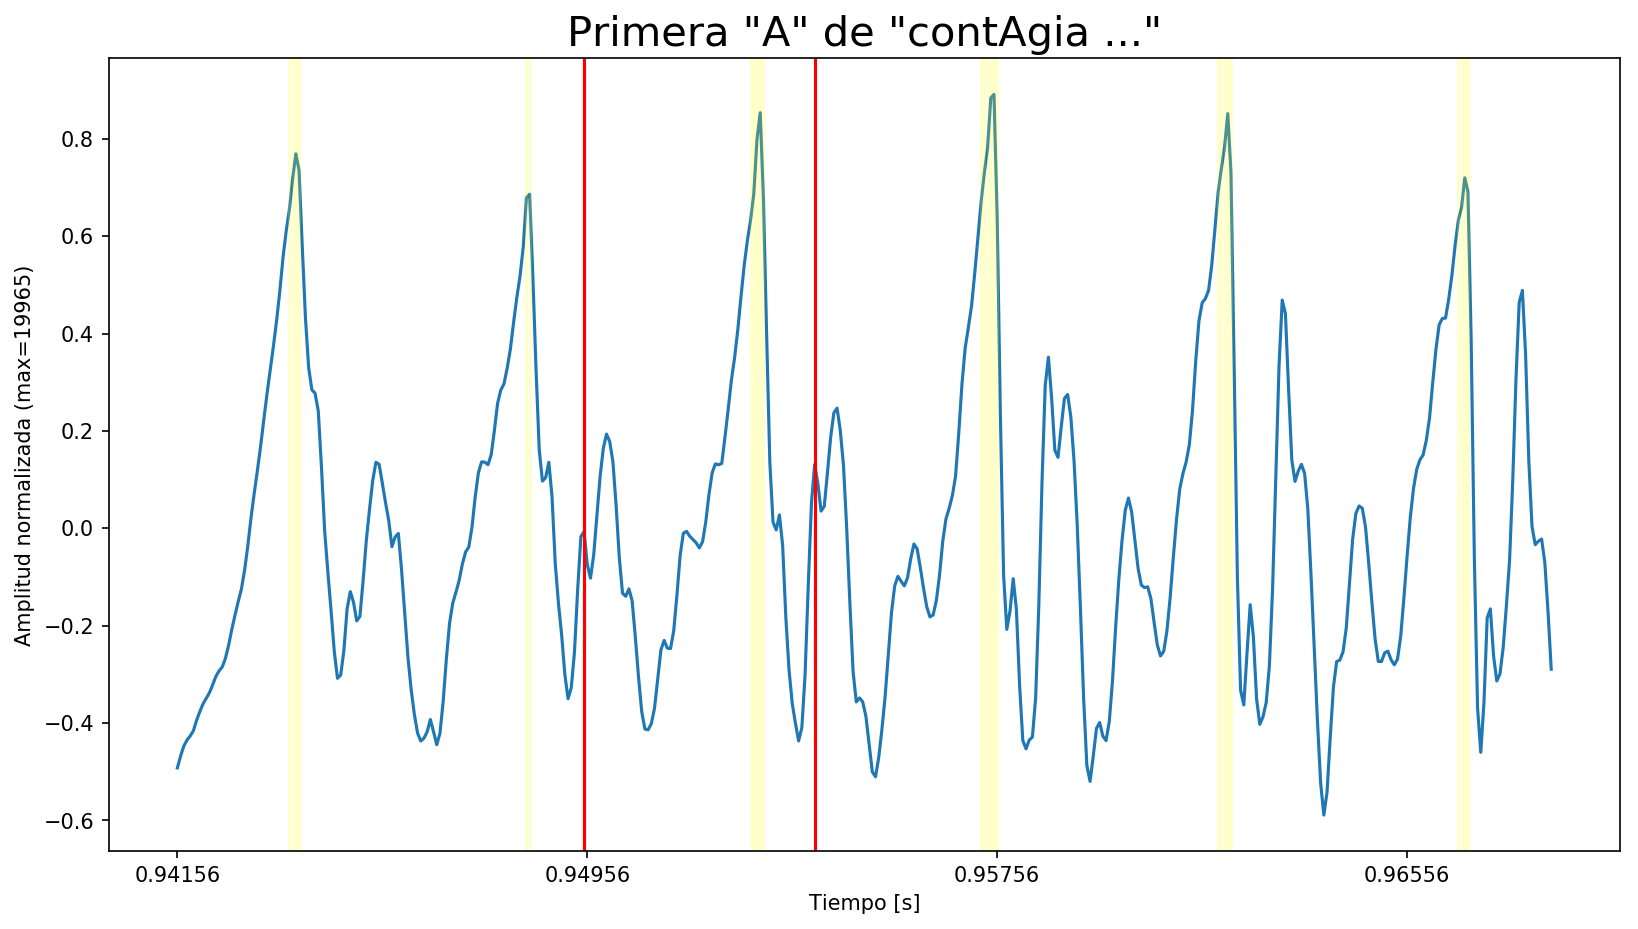

In [37]:
# Tomo a
a1 = Letter.LETTERS_POSITION[4]

def plot_letter(letter: Letter, tittle = None, **kwargs):
    X_l = X[int(letter.start*FS):int(letter.end*FS)]
    Y_l = Y[int(letter.start*FS):int(letter.end*FS)]

    graph_half = kwargs.get('graph_half', False)
    X_middle = X_l[:len(X_l)//2] if graph_half else X_l
    Y_middle = Y_l[:len(Y_l)//2] if graph_half else Y_l

    plt.title(kwargs.get("title","Letra {}".format(letter.char)), fontsize=20)
    plt.plot(X_middle, Y_middle)
    
    plt.xticks(np.arange(min(X_middle), max(X_middle), kwargs.get('xticks',0.008)))
    
    # Marco ls picos mas altos
    for x, y in zip(X_middle, Y_middle):
        if y > kwargs.get('threeshold', max(Y_middle)*.70):
            x = plt.axvline(x=x, color="yellow", alpha=0.2)
    return X_l, Y_l
    

(X_a1, Y_a1) = plot_letter(a1, title=r'Primera "A" de "contAgia ..."', graph_half=True)

# Busco periodo "a mano"
plt.axvline(x=0.9495, color="red")
plt.axvline(x=0.9495 + 0.00451, color="red")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud normalizada (max={})".format(Y_max))

plt.show()

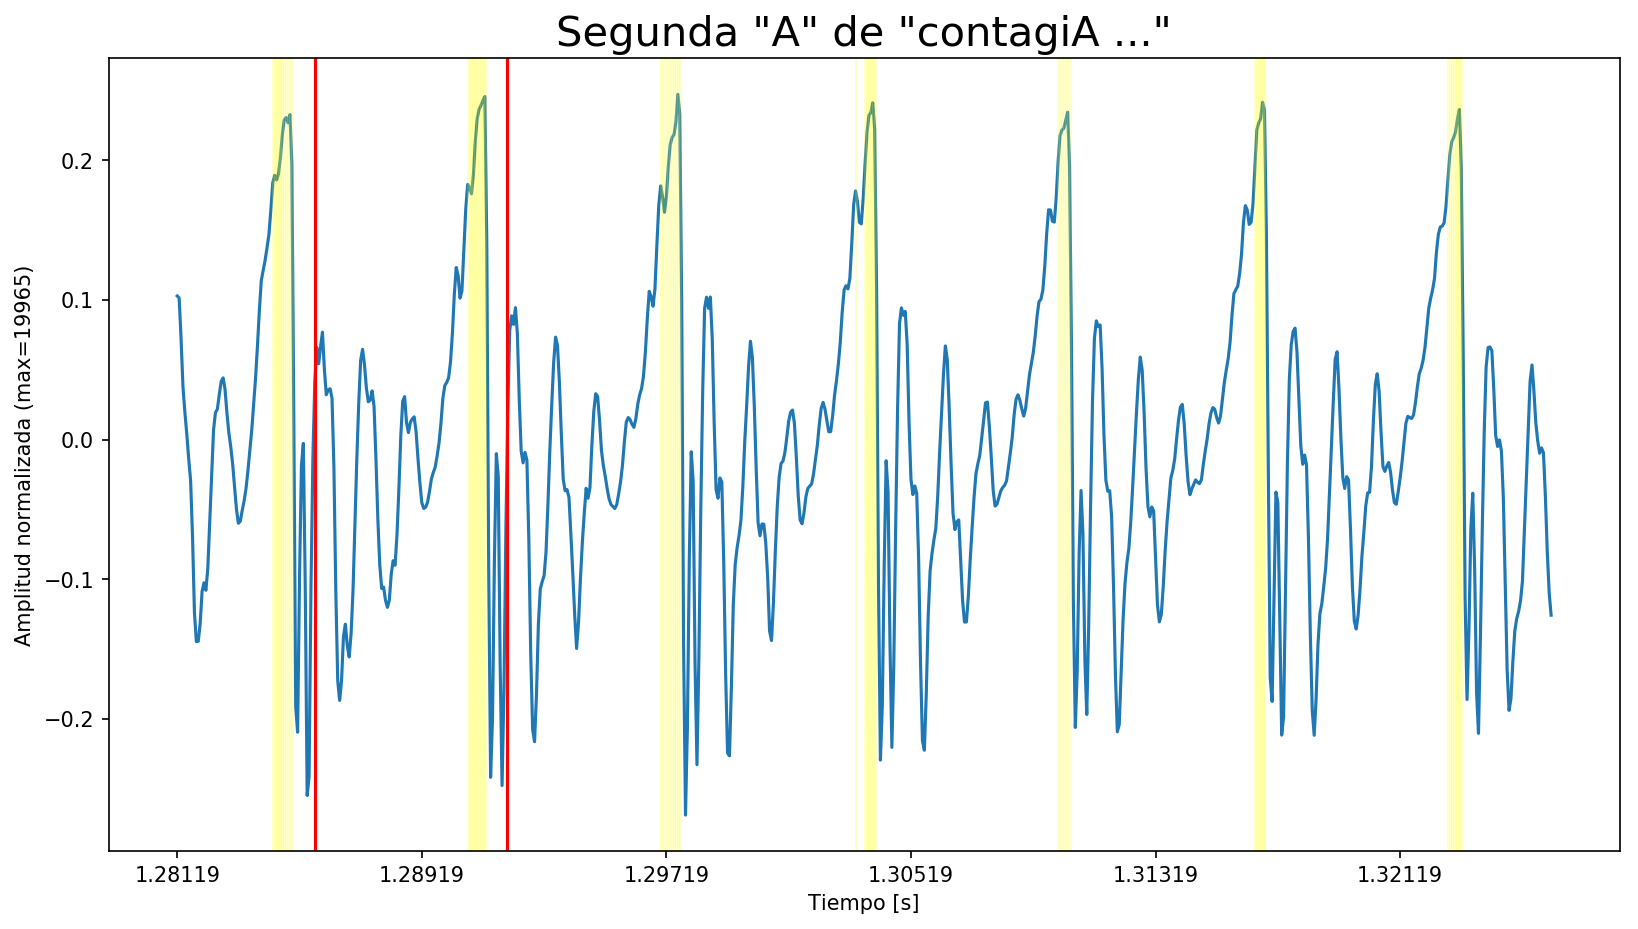

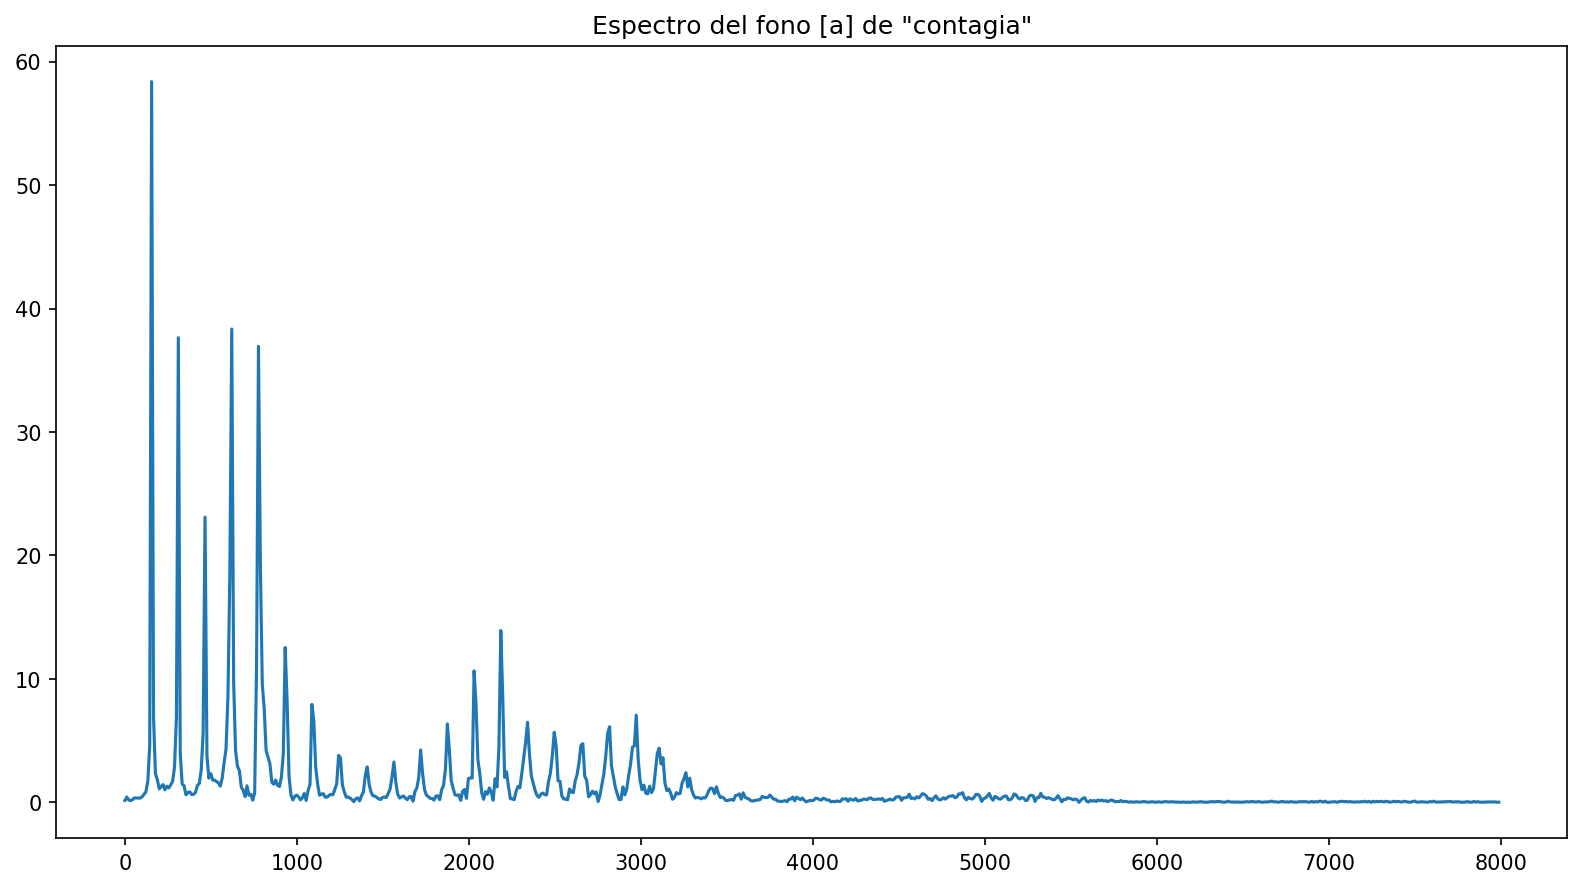

In [681]:
a2 = Letter.LETTERS_POSITION[7]

(X_a2, Y_a2) = plot_letter(a2, title=r'Segunda "A" de "contagiA ..."', graph_half=True)
# Busco periodo "a mano"
plt.axvline(x=a2.start + 0.0045, color="red")
plt.axvline(x=a2.start + 0.0045 + 0.00628, color="red")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud normalizada (max={})".format(Y_max))
plt.show()

plt.title("Espectro del fono [a] de \"contagia\"")
spectrum = np.absolute(np.fft.rfft(Y_a2)) 
tspectrum = np.arange(0, FS/2, (FS/2)/len(spectrum))
plt.plot(tspectrum, spectrum)
plt.show()

### Busco periodo de primera A Manualmante

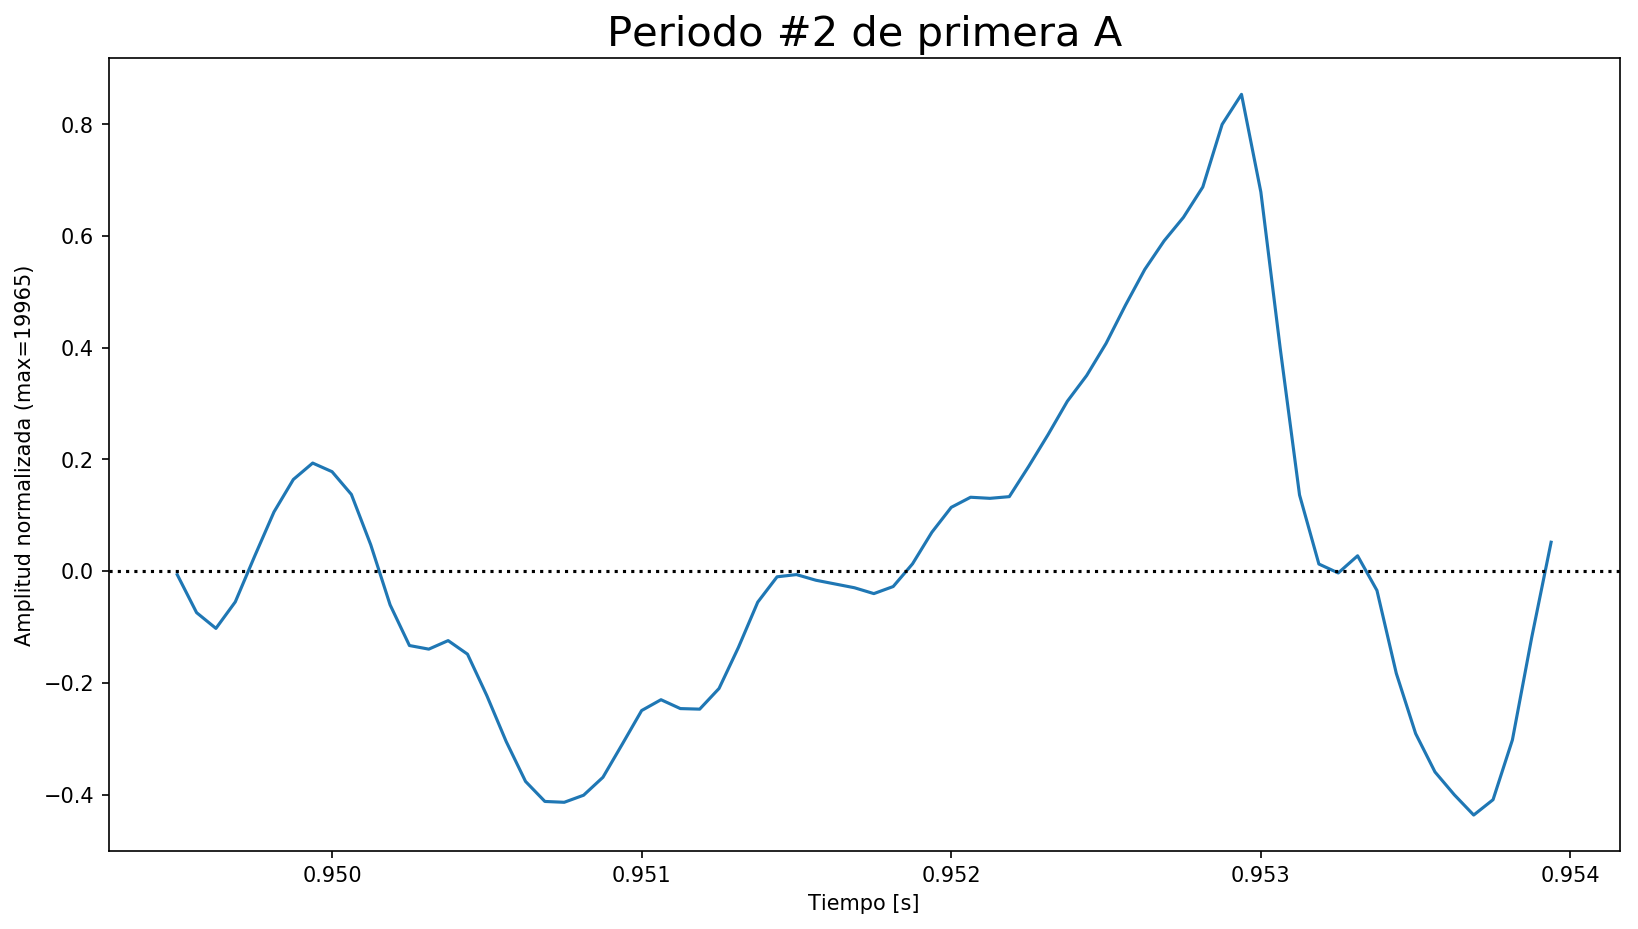

In [39]:
a1_T = 0.0045 # Tamano del periodo de "a1"

# Periodo 2
a1_P2_start = 0.9495

X_a1_P2 = X[int(a1_P2_start*FS):int((a1_P2_start + a1_T)*FS)]
Y_a1_P2 = Y[int(a1_P2_start*FS):int((a1_P2_start + a1_T)*FS)]

# print("Y[ 0]: {}\nY[-1]: {}\nDiferencia: {}".format(Y_a1_T[0], Y_a1_T[-1], abs(Y_a1_T[0]-Y_a1_T[-1])))

plt.title(r'Periodo #2 de primera A', fontsize=20)
plt.plot(X_a1_P2, Y_a1_P2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud normalizada (max={})".format(Y_max))
plt.axhline(y=0, color="black",linestyle="dotted")
plt.show()

### FFT del Periodo 2 de primera A

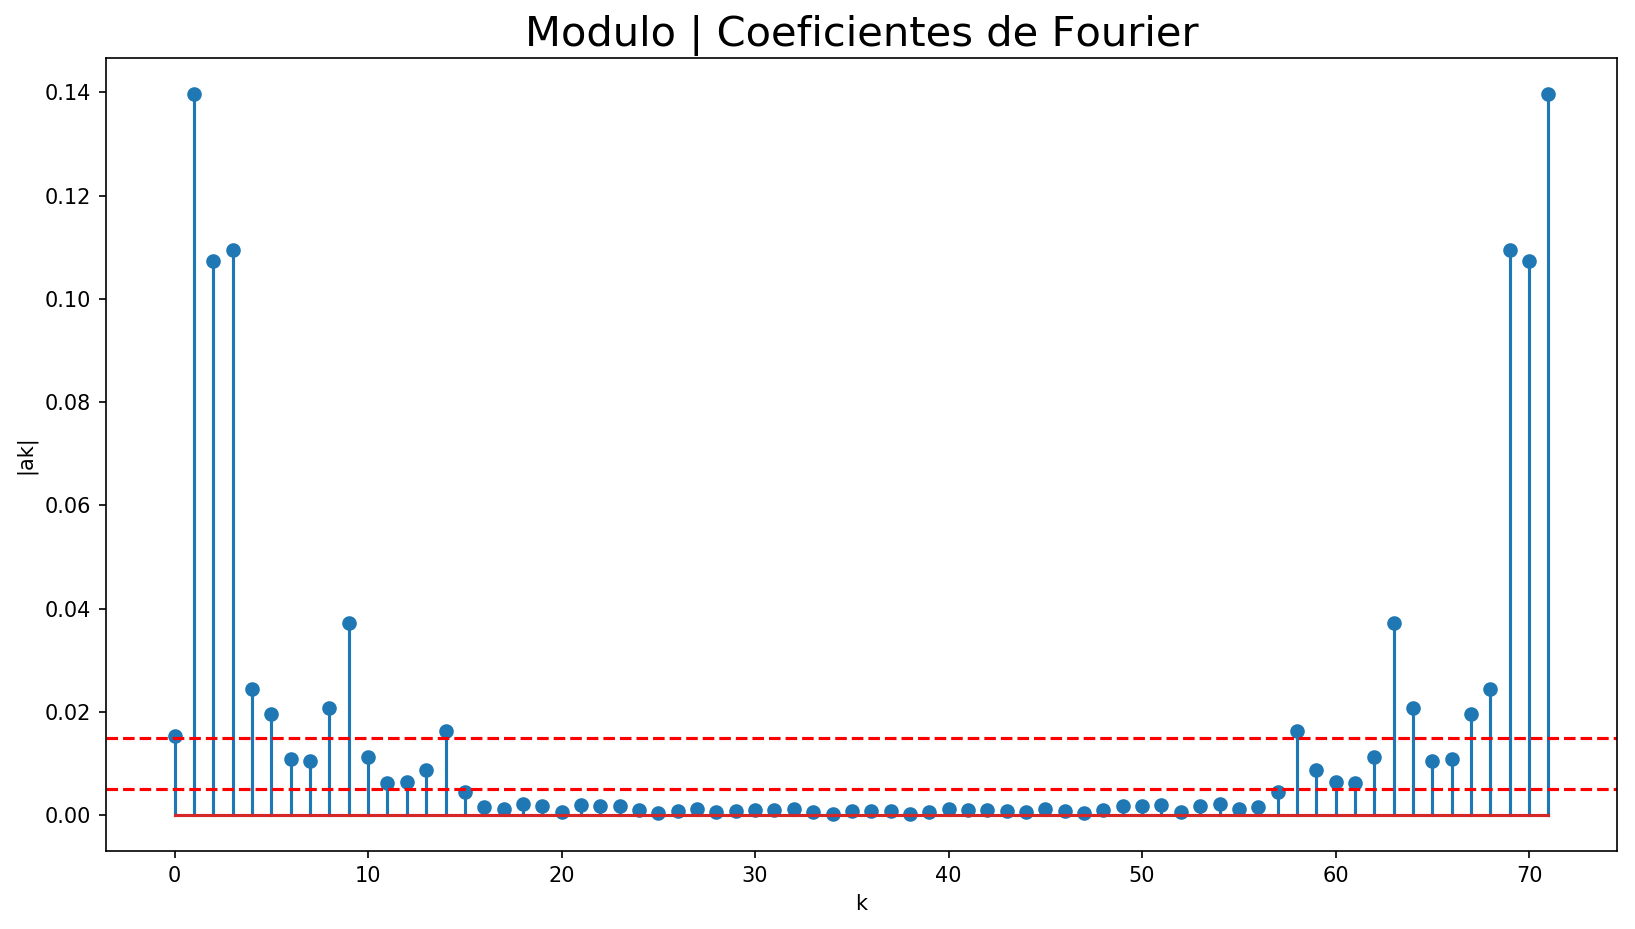

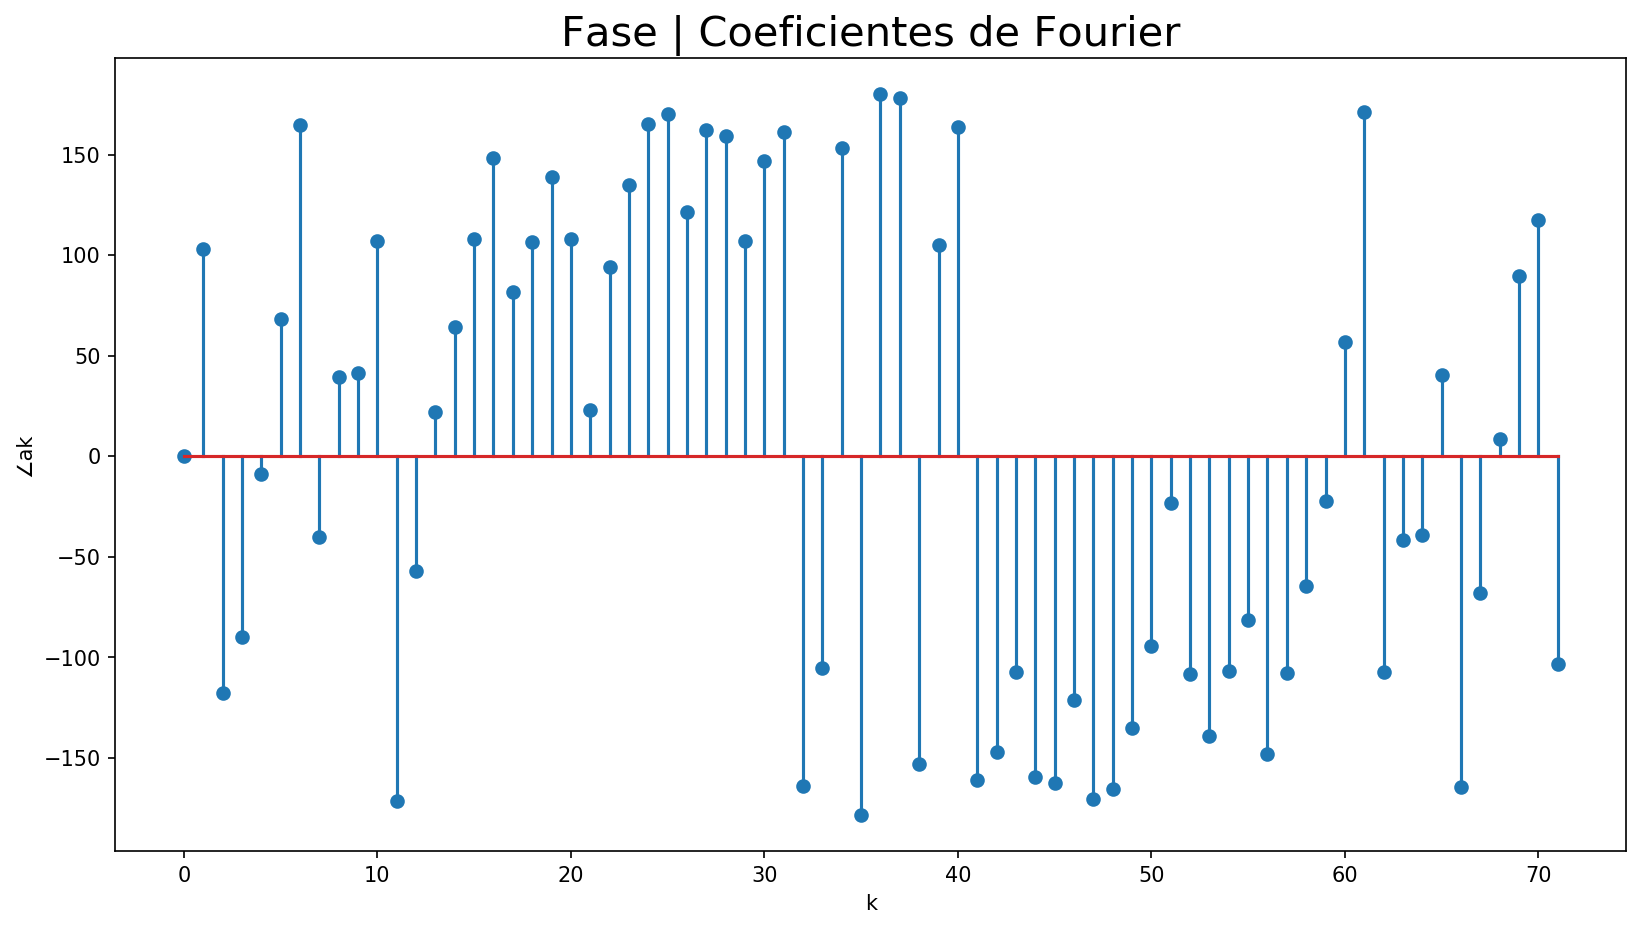

In [281]:
# Calclo DFT (con FFT). Desnormalizo el vector Y
TF_Y_a1_P2 = np.fft.fft(np.array(Y_a1_P2)*max(Y) / len(Y_a1_P2))
plt.title("Modulo | Coeficientes de Fourier", fontsize=20)
plt.stem(np.absolute(TF_Y_a1_P2))
plt.xlabel('k')
#plt.axhline(y=0.01, color='r', linestyle='-')
plt.axhline(y=0.015, color='r', linestyle='dashed')
plt.axhline(y=0.005, color='r', linestyle='dashed')
plt.ylabel('|ak|')
plt.show()


plt.title("Fase | Coeficientes de Fourier", fontsize=20)
plt.stem(np.angle(TF_Y_a1_P2, deg=True))
plt.xlabel('k')
plt.ylabel('∠ak')
plt.show()

## 3) Reconstruya la señal temporal a partir de los coeficientes calculados. Escuche y compare las distintas reconstrucciones correspondientes a coeficientes de Fourier tomados de distintos períodos. Compárelas también con la señal original. ¿Qué observación se puede hacer sobre la periodicidad de los fonemas vocálicos?


A los resultados obtenidos en el punto anteriro, se realiza la inversa de la DFT (ifft) y se la hace `tile` para reptir el segmento por un tiempo breve (~2 segundos). Ese resultado se vuelva sobre un archivo WAV.


In [41]:
# Reconstruyo la señal usando inversa de fft

def store_wav(Y, FS, name):
    wavname = "out/{}.wav".format(name)
    wavfile.write(wavname, FS, Y)
    print("Guardado: \"{}\" [Duracion: {} seg., FS:{}, Muestras: {}]"
          .format(wavname, len(Y)/FS, FS, len(Y/FS))
         )
    

def generate_wav(Y_fft, title, **kwargs):
    Y_fft2 = np.copy(Y_fft)
    threeshold = kwargs.get("threeshold", 0)
    if threeshold > 0:
        Y_fft2[np.absolute(Y_fft2) < threeshold] = 0 
    Yi = np.tile(np.real(np.fft.ifft(Y_fft2)), kwargs.get("tile", 1099))
    wavname = "{}{}".format(title, "_u-" + str(threeshold) if threeshold > 0 else "")
    store_wav(Yi, FS, wavname)
    
generate_wav(TF_Y_a1_P2, "A1_P2")
generate_wav(TF_Y_a1_P2, "A1_P2", threeshold=0.015)
generate_wav(TF_Y_a1_P2, "A1_P2", threeshold=0.005)

Guardado: "out/A1_P2.wav" [Duracion: 4.9455 seg., FS:16000, Muestras: 79128]
Guardado: "out/A1_P2_u-0.015.wav" [Duracion: 4.9455 seg., FS:16000, Muestras: 79128]
Guardado: "out/A1_P2_u-0.005.wav" [Duracion: 4.9455 seg., FS:16000, Muestras: 79128]


## 4) Grabe la misma frase del ejercicio 1. Mencionar las diferencias entre ambas señales.

La grabacion se realiza en Audacity. Y se debe conseguir la sincronizacion optima respecto del sonido original.

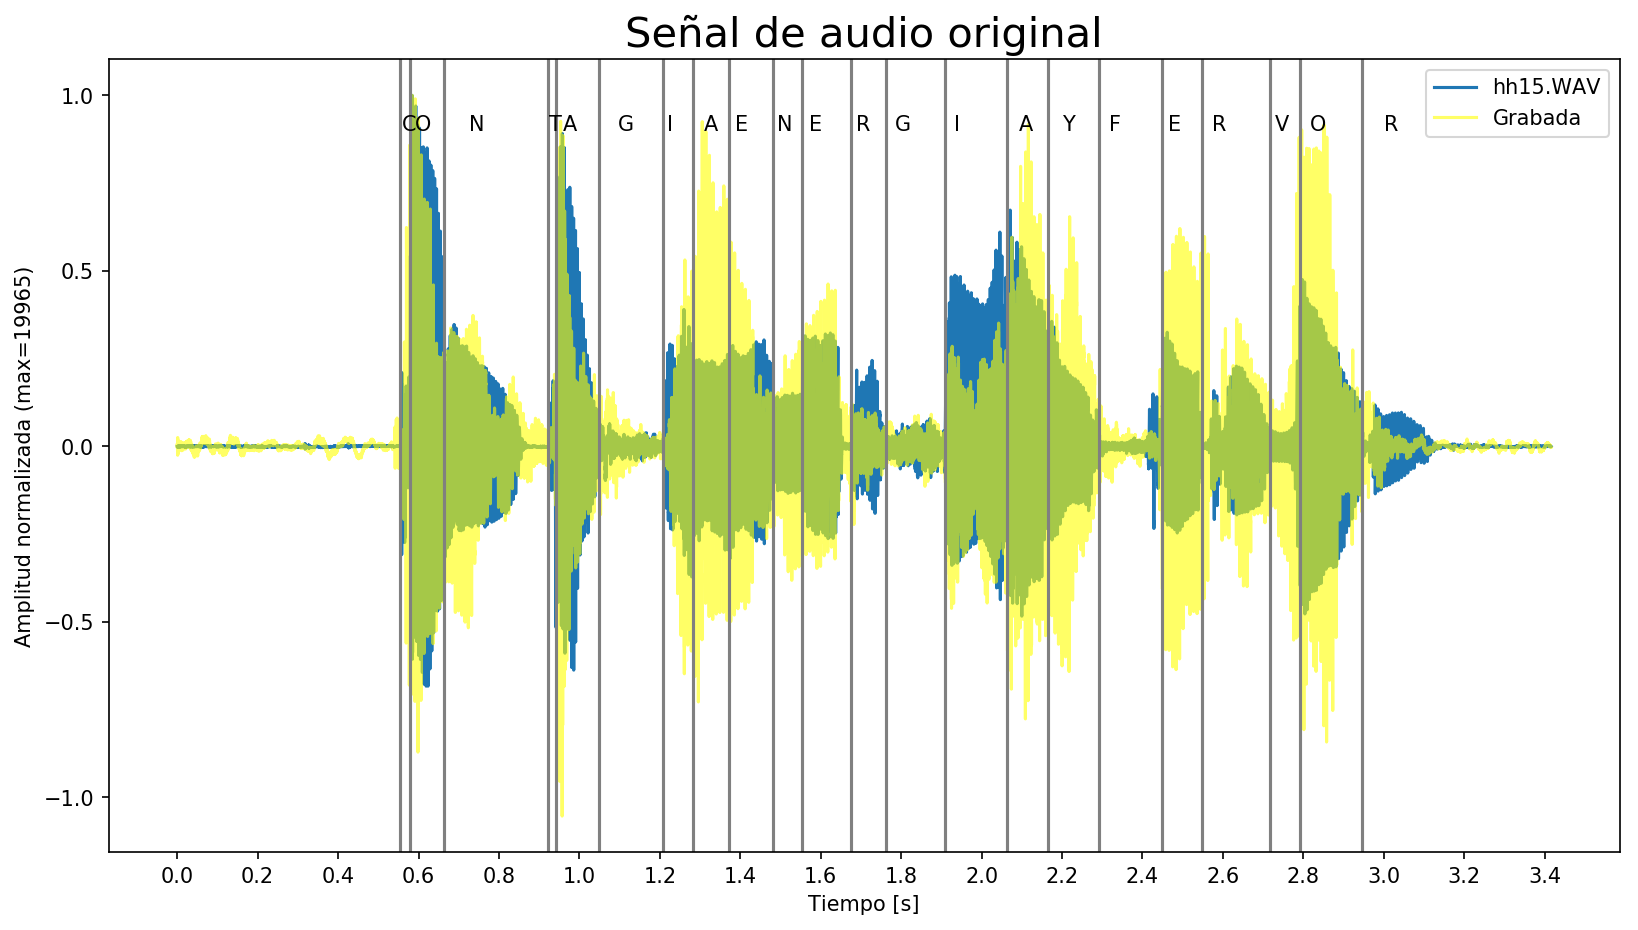

In [445]:
# Plot de original
X = np.arange(0, len(Y))/FS
Y = Y/max(Y) # Y normalizado
plt.title(r'Señal de audio original', fontsize=20)
plt.plot(X, Y) 
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud normalizada (max={})".format(Y_max))
plt.xticks(np.arange(min(X), max(X), 0.2))

# Senal grabada
(FS_t, Y_t) = wavfile.read("res/hh15-self.wav")
X_t = np.arange(0, len(Y_t))/FS_t
Y_t = Y_t/max(Y_t) # Y normalizado 
plt.plot(X_t, Y_t, alpha=0.6, color="yellow")
plt.legend(["hh15.WAV", "Grabada"])
for l in Letter.LETTERS_POSITION:
    y = 0.9
    x = l.start + (l.end - l.start)*.3
    plt.text(x, y, l.char)
    plt.axvline(x=l.start, color="grey")
plt.show()

A simple vista se ntan mayor intensidad de la señal en las vocales "A" y "E". Debe notarse tambien, la menor intensidad en la "I" de energia.

## 5) Grafique los espectrogramas de banda angosta de los segmentos de señal correspondientes a tres vocales presentes en la señal hh15.wav. Compare y analice las diferencias.

### Selecciono 3 vocales
"c**O**ntag**I**a en**E**rgia y fervor"

 

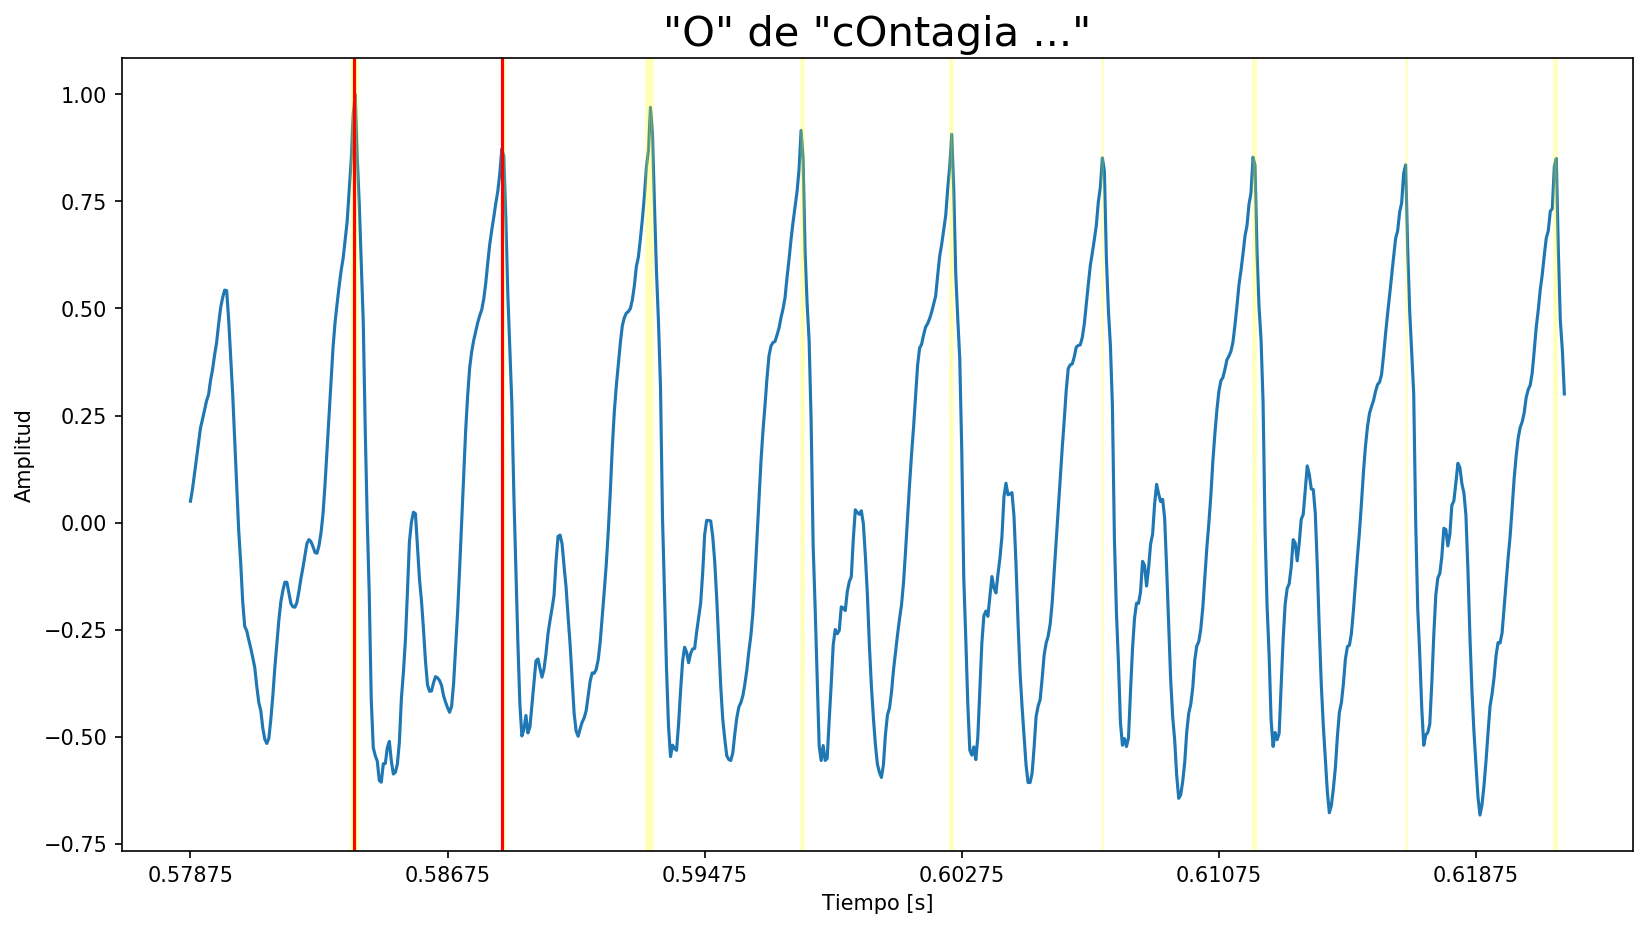

T.nT.FS = 0.0046.16000.8 = 588


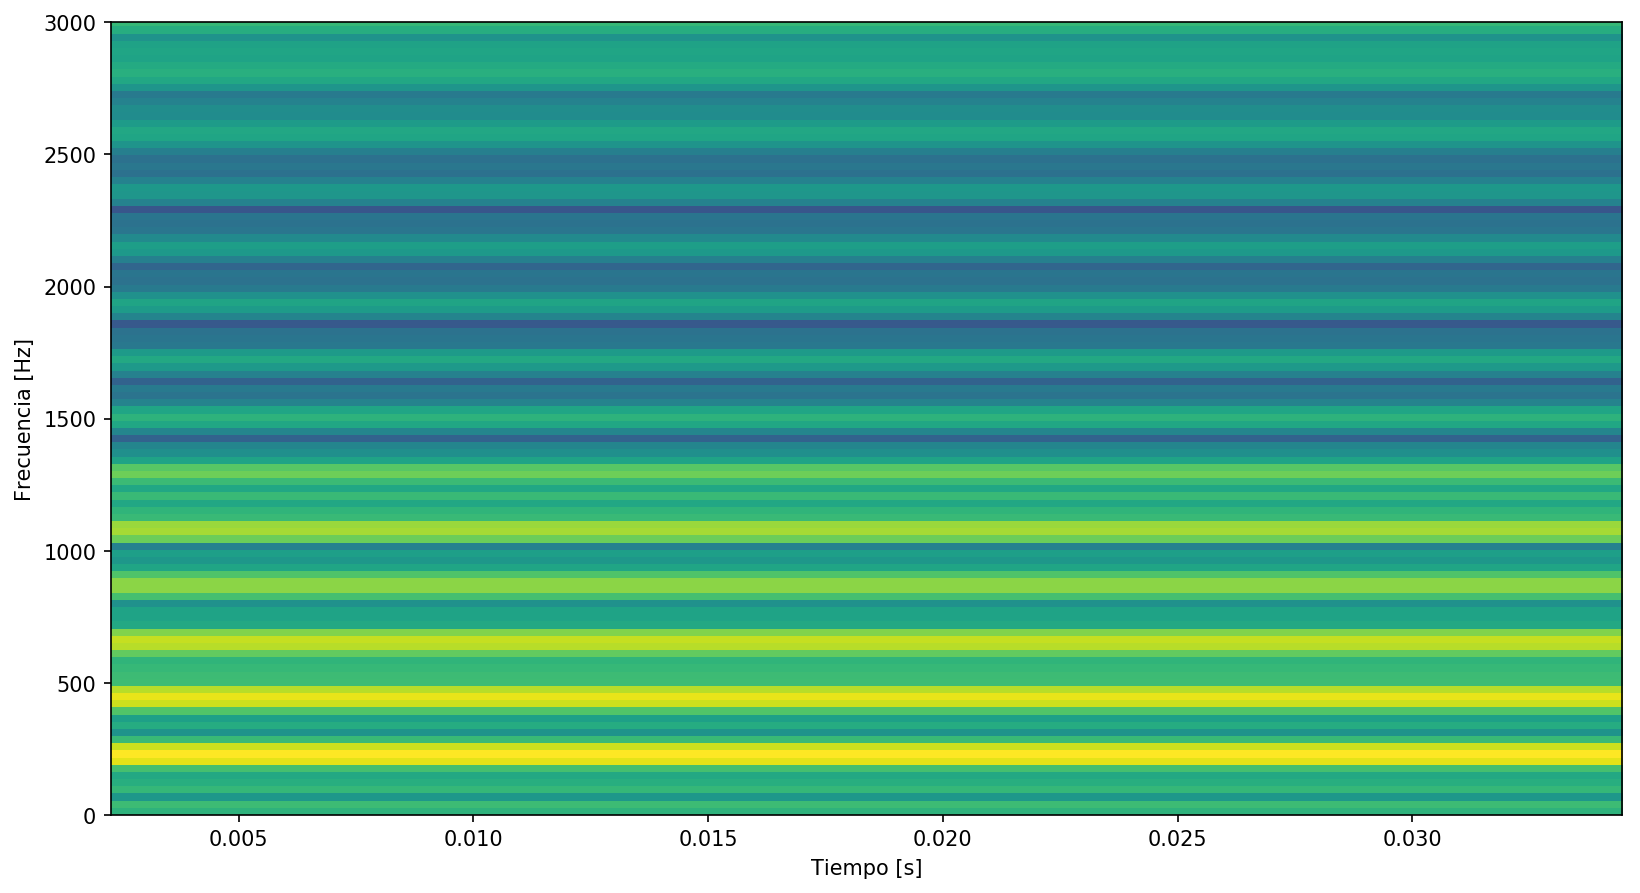

In [43]:
from scipy import signal

O1 = Letter.LETTERS_POSITION[1]
(O1_X, O1_Y) = plot_letter(O1, title=r'"O" de "cOntagia ..."', threeshold=0.83)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.axvline(x=0.58385, color="red")
plt.axvline(x=0.58385 + 0.00460, color="red")
plt.show()
O1_T = 0.00460

def plot_specgram(Y, T, nT, FS, **kwargs):
    """
    Y: Señal
    T: Periodo (tiempo)
    nT: Numero de periodos de la señal
    FS: FS
    """
    window_size = int(T * FS * nT)
    print("T.nT.FS = {}.{}.{} = {}".format(T,FS,nT,window_size))
    # NFFT: T de un periodo x cantidad = Ancho de ventana
    plt.specgram(Y*Y_max, NFFT=window_size, Fs=FS, noverlap=int(window_size//8))
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Frecuencia [Hz]")
    if (kwargs.get('ylim', False)):
        plt.ylim(0, kwargs.get('ylim'))
    plt.show()
    
plot_specgram(O1_Y, O1_T, 8, FS, ylim=3e3)

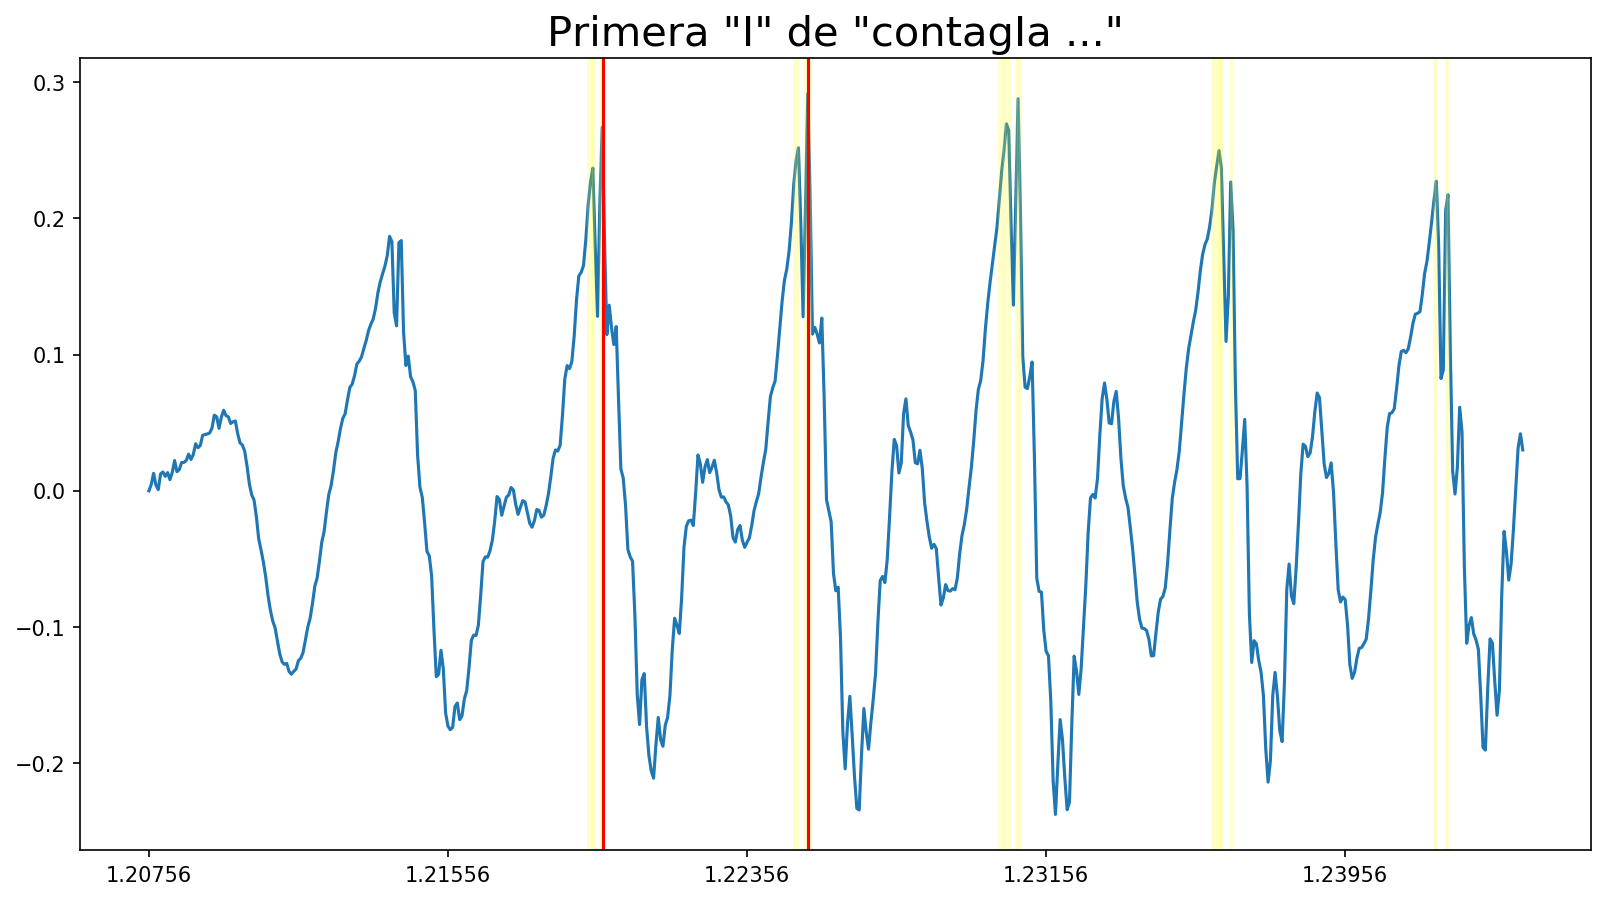

T.nT.FS = 0.005481.16000.6 = 526


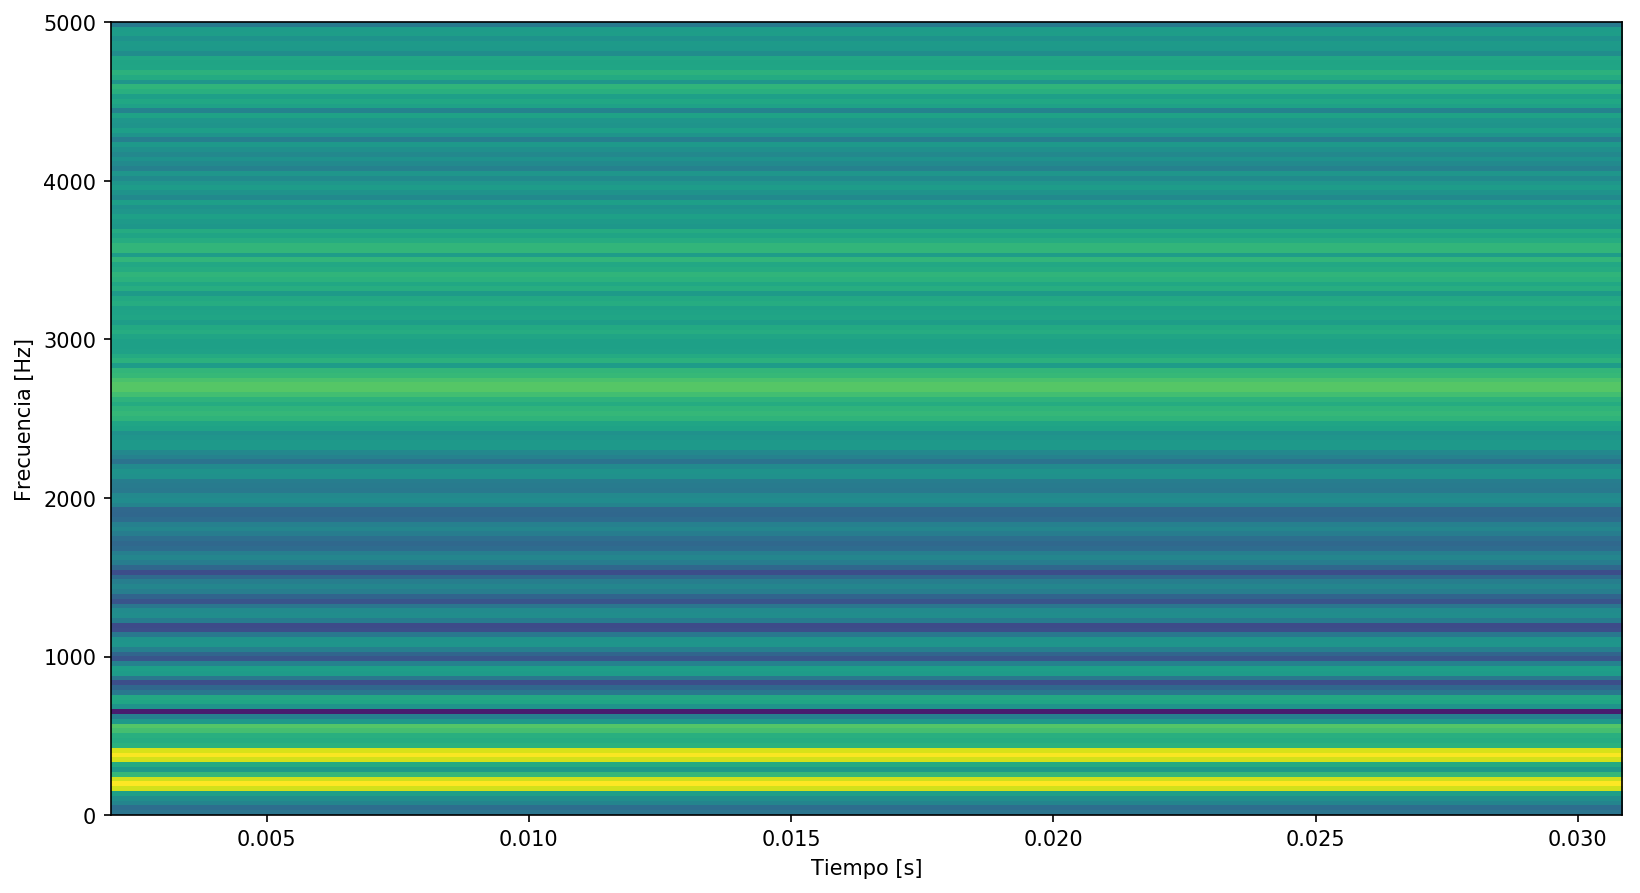

In [44]:
I1 = Letter.LETTERS_POSITION[6]
(I1_X, I1_Y) = plot_letter(I1, title=r'Primera "I" de "contagIa ..."')

plt.axvline(x=1.21970, color="red")
plt.axvline(x=1.21970 + 0.005481, color="red")
plt.show()

I1_T = 0.005481

plot_specgram(I1_Y, I1_T, 6, FS, ylim=5e3)

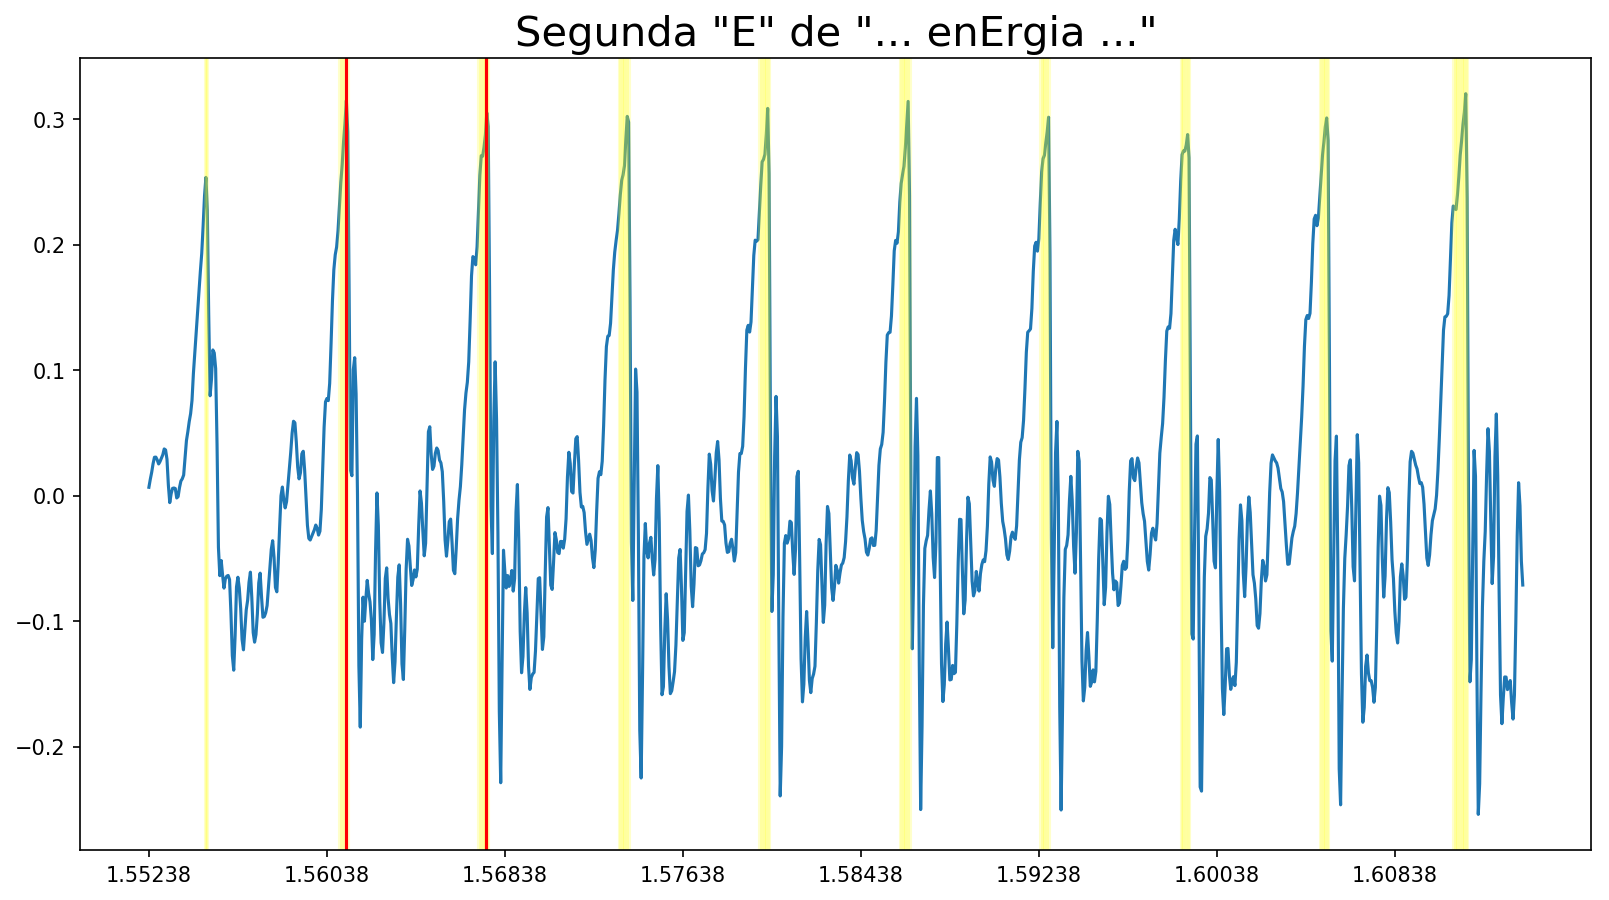

T.nT.FS = 0.006281.16000.9 = 904


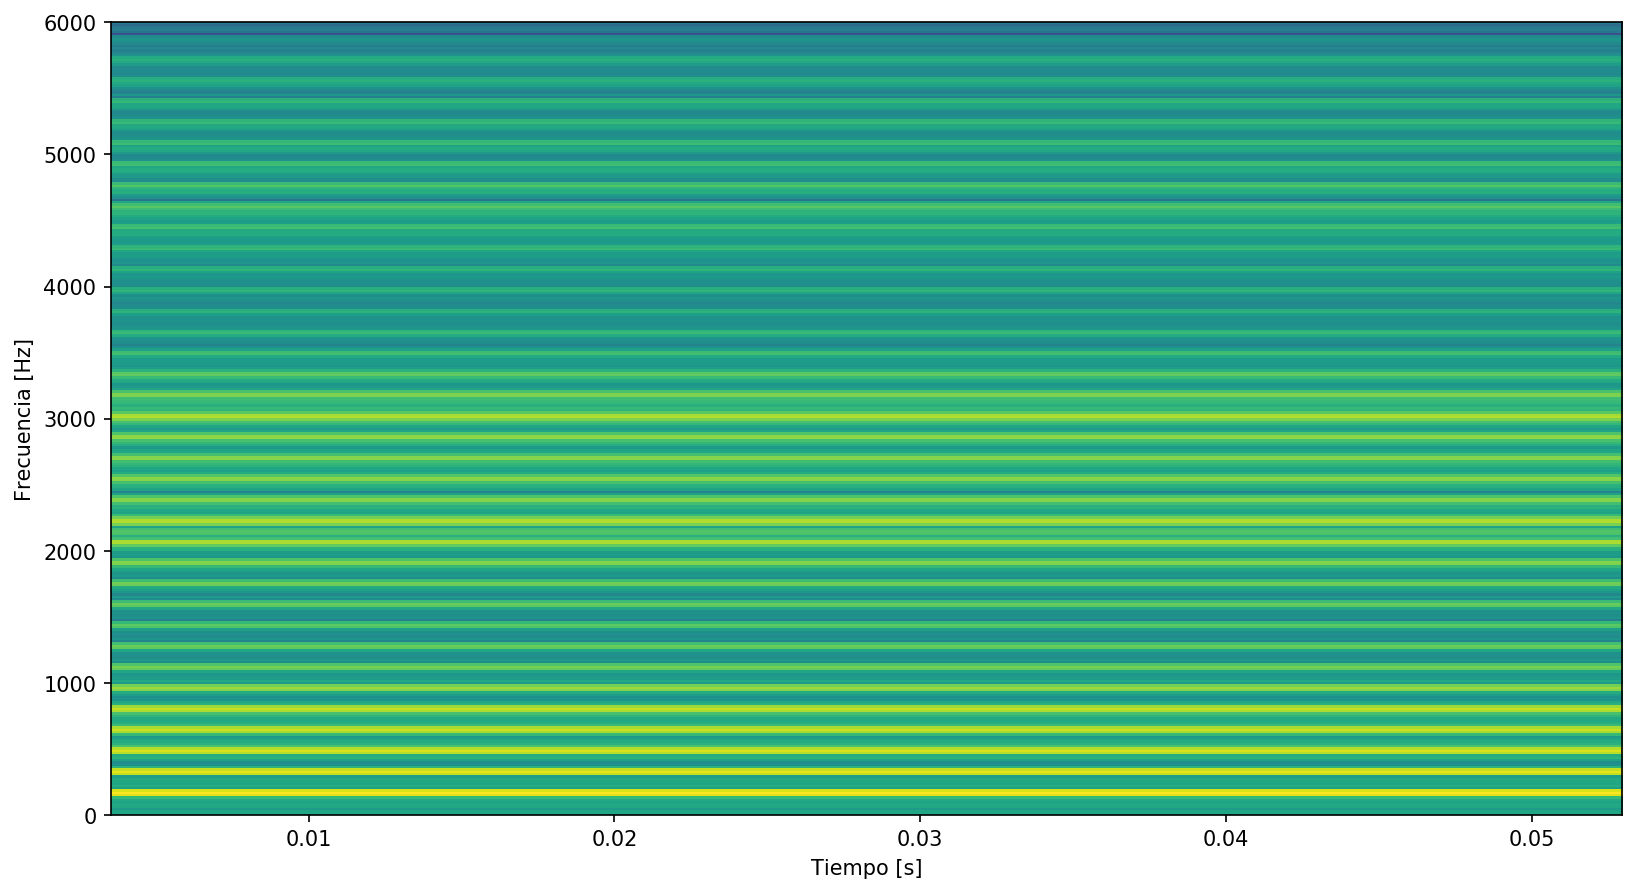

In [45]:
E2 = Letter.LETTERS_POSITION[10]
(E2_X, E2_Y) = plot_letter(E2, title=r'Segunda "E" de "... enErgia ..."')


plt.axvline(x=1.56125, color="red")
plt.axvline(x=1.56125 + 0.006281, color="red")
plt.show()

E2_T = 0.006281

plot_specgram(E2_Y, E2_T, 9, FS, ylim=6e3)

``banda angosta`` Se puede notar como el ancho de la ventana afecta la resulicion temporal. Es decir, mientras mas ancha, menor resolucion temporal y mayor resulcion espectral.

## 6) Genere diez ciclos del tren de pulsos glóticos según los modelos de Rosenberg. Tomar una frecuencia F0 = 200 Hz, y fases de apertura y cierre de 40% y 16%, respectivamente, de la duración de un pulso. Considerar una amplitud máxima de 1. A los efectos de la simulación, considerar una frecuencia de muestreo de 16 kHz. Estimar su espectro de amplitud y explicar su contenido. Grafique en forma superpuesta el espectro de un pulso y del tren de pulsos. Justifique los resultados observados.

Modelo del pulso blotico (ecuacion 1)

espectro de un periodo son deltas de dirac con envolvente


Tp: 0.001975s | Tn: 0.00079s | A: 1s


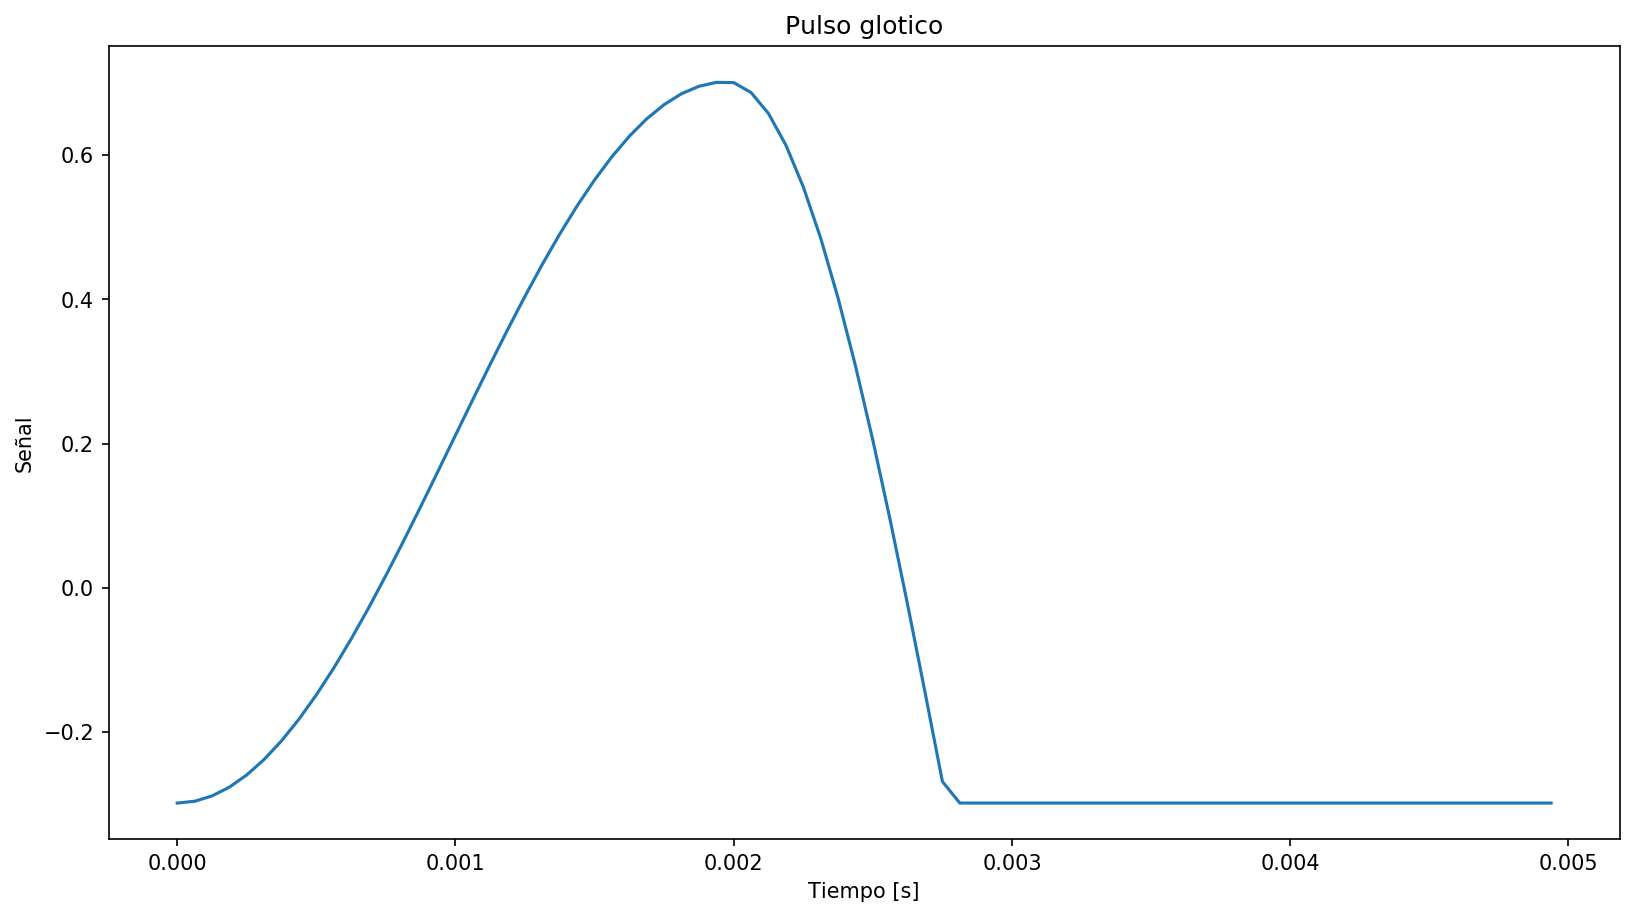

Tp: 0.001975s | Tn: 0.00079s | A: 1s


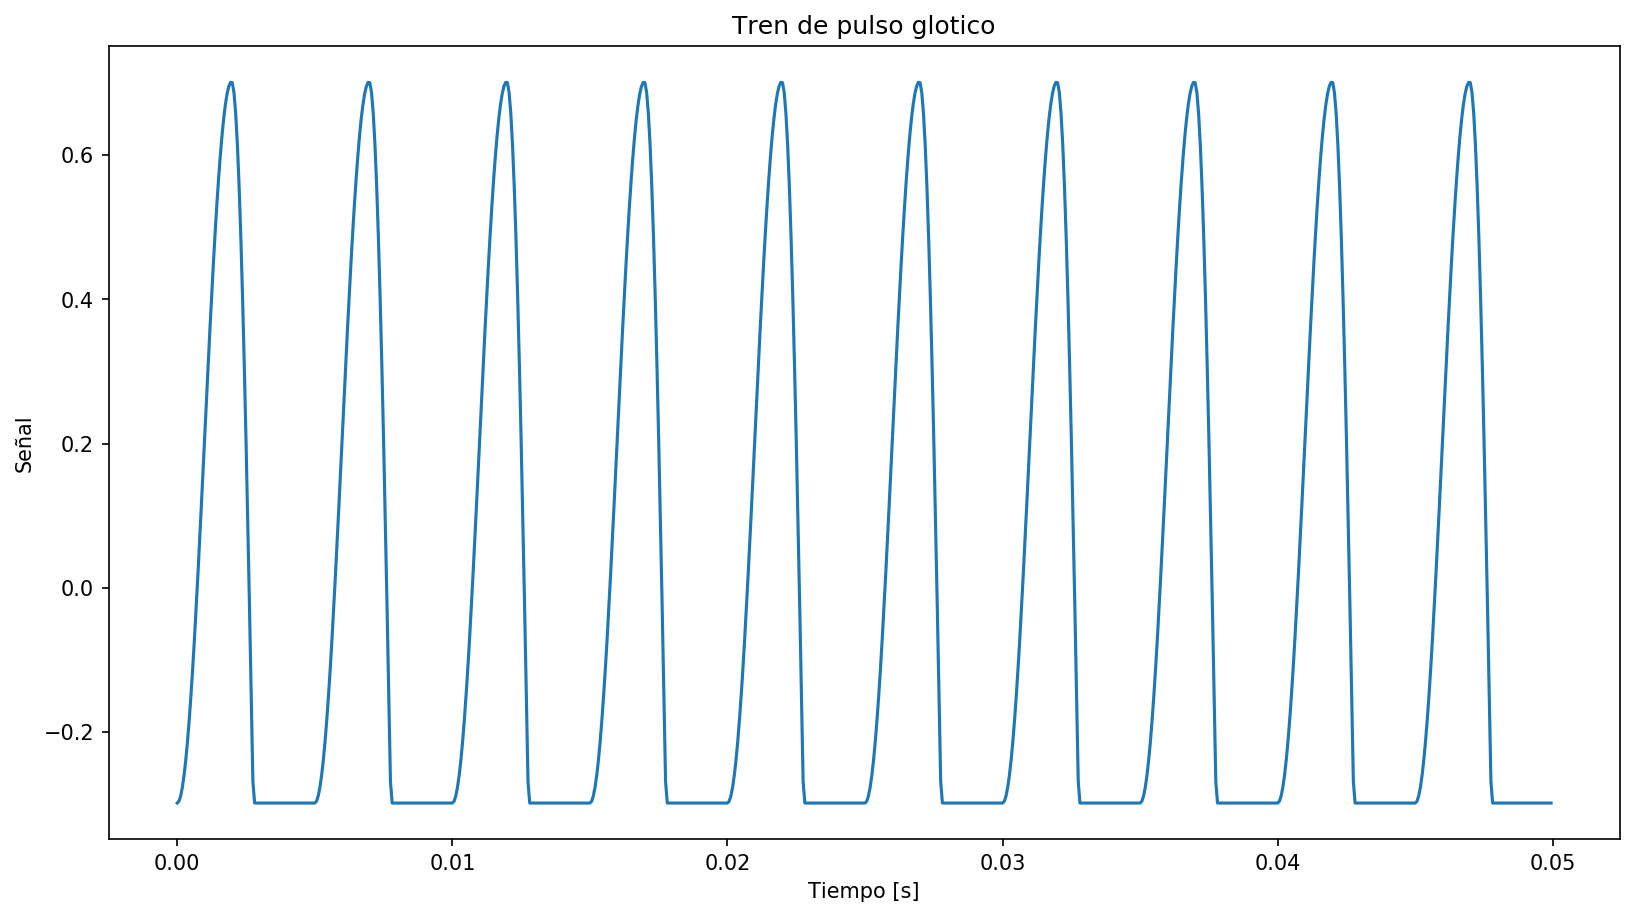

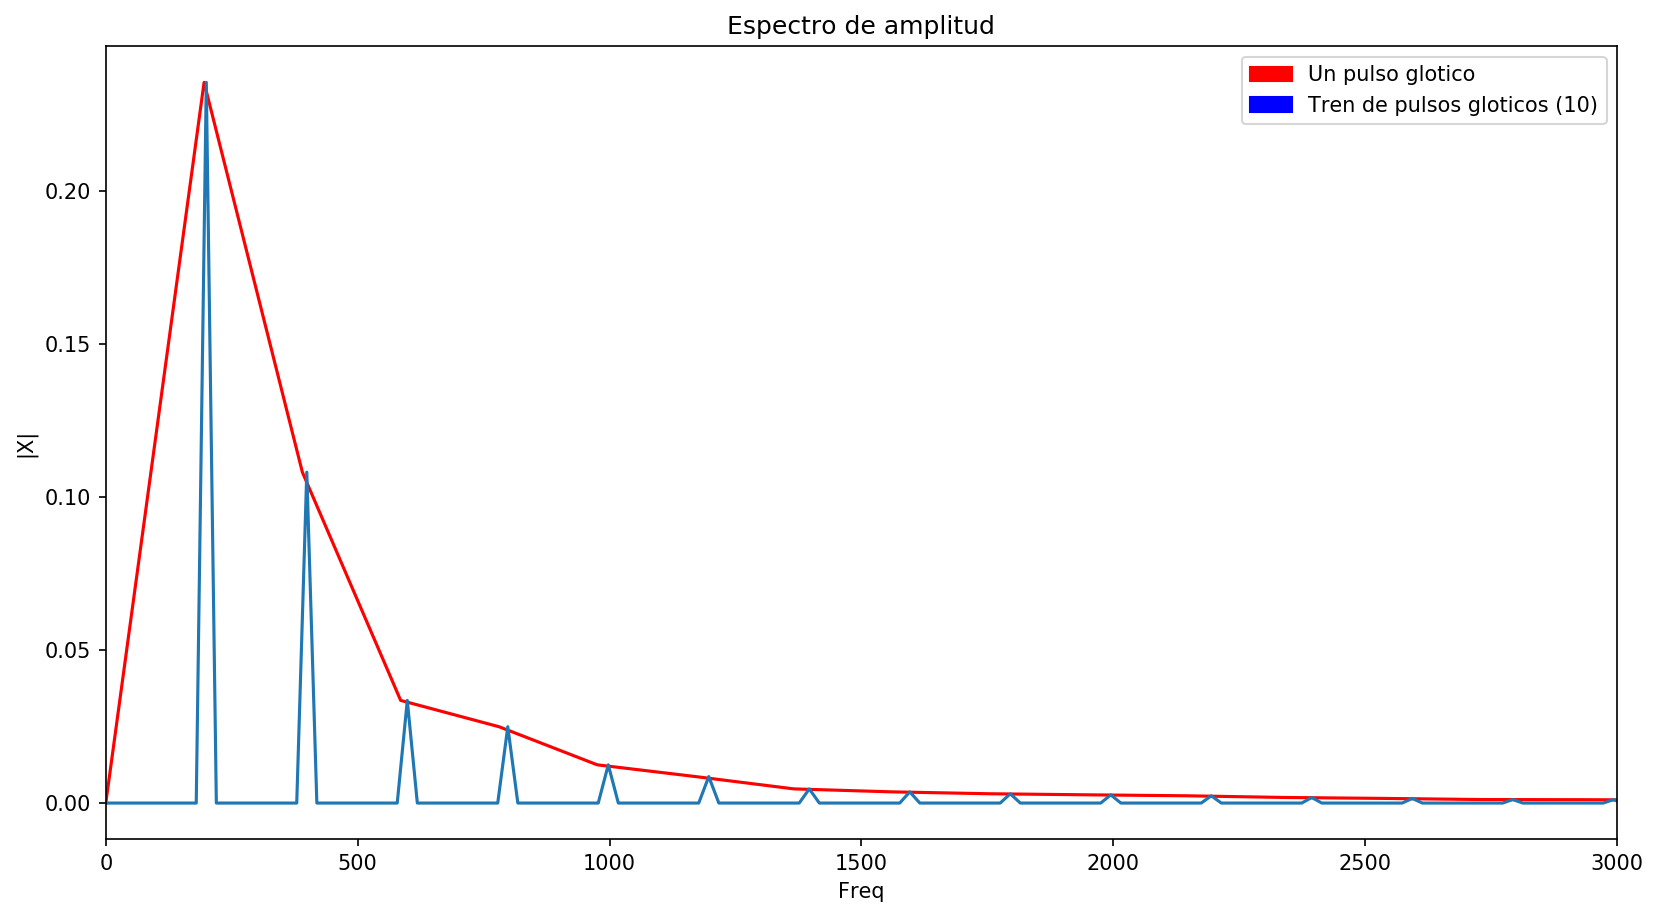

In [447]:
from tp.vocal import GlottalPulse

F06 = 200
FS6 = 16e3

def plot_glotal_pulse(nT, title, **kwargs):
    # Calculo 1 periodo
    T = np.arange(0, 1/F06, 1/FS6)
    T_max = max(T)
    print("Tp: {}s | Tn: {}s | A: {}s". format(T_max*.4, T_max*.16, 1))
    Pt = GlottalPulse.generate(T_max*.4, T_max*.16, 1)
    P = np.array([Pt(t) for t in T])
    
    X = np.arange(0, nT/F06, 1/FS6)
    Y = P if nT == 1 else np.tile(P, nT)
    if kwargs.get("mean", False):
        Y = Y - np.mean(Y)
    plt.plot(X, Y)
    plt.title(title)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Señal")
    # plt.title("Tren de pulso glotico")
    plt.show()
    return X, Y


T6, P6 = plot_glotal_pulse(1, "Pulso glotico", mean = True)

T6_10, P6_10 = plot_glotal_pulse(10, "Tren de pulso glotico", mean = True)

# Espectro de amplitud
AMPLITUDE_SPECTRUM = abs(np.fft.rfft(P6) / len(P6))
plt.plot(np.arange(0, FS6/2, (FS6/2)/len(AMPLITUDE_SPECTRUM)), AMPLITUDE_SPECTRUM, color="red")

AMPLITUDE_SPECTRUM_10 = abs(np.fft.rfft(P6_10) / len(P6_10))
plt.plot(np.arange(0, FS6/2, (FS6/2)/len(AMPLITUDE_SPECTRUM_10)), AMPLITUDE_SPECTRUM_10)
plt.ylabel("|X|")
plt.xlabel("Freq")

plt.title("Espectro de amplitud")
plt.legend(handles=[
    mpatches.Patch(color='red', label='Un pulso glotico'),
    mpatches.Patch(color='blue', label='Tren de pulsos gloticos (10)')
])
plt.xlim(0,3e3)
plt.show()



## 7) Utilizando las ec. 3 y 4, generar un modelo de tracto vocal para cada uno de los siguientes conjuntos de valores de parámetros, que se corresponde con una vocal emitida por una locutora. Graficar diagrama de polos y ceros, y la respuesta en frecuencia d cada vocal, compare.

|  | F1  | B1  | F2   | B2  | F3   | B3  | F4   | B4  |
|--|-----|-----|------|-----|------|-----|------|-----|
|**a**| 830 | 110 | 1400 | 160 | 2890 | 210 | 3930 | 230 |
|**e**| 500 | 80  | 2000 | 156 | 3130 | 190 | 4150 | 220 |
|**i**| 330 | 70  | 2765 | 130 | 3740 | 178 | 4336 | 200 |
|**o**| 546 | 97  | 934  | 130 | 2966 | 185 | 3930 | 240 |
|**u**| 382 | 74  | 740  | 150 | 2760 | 210 | 3380 | 180 |

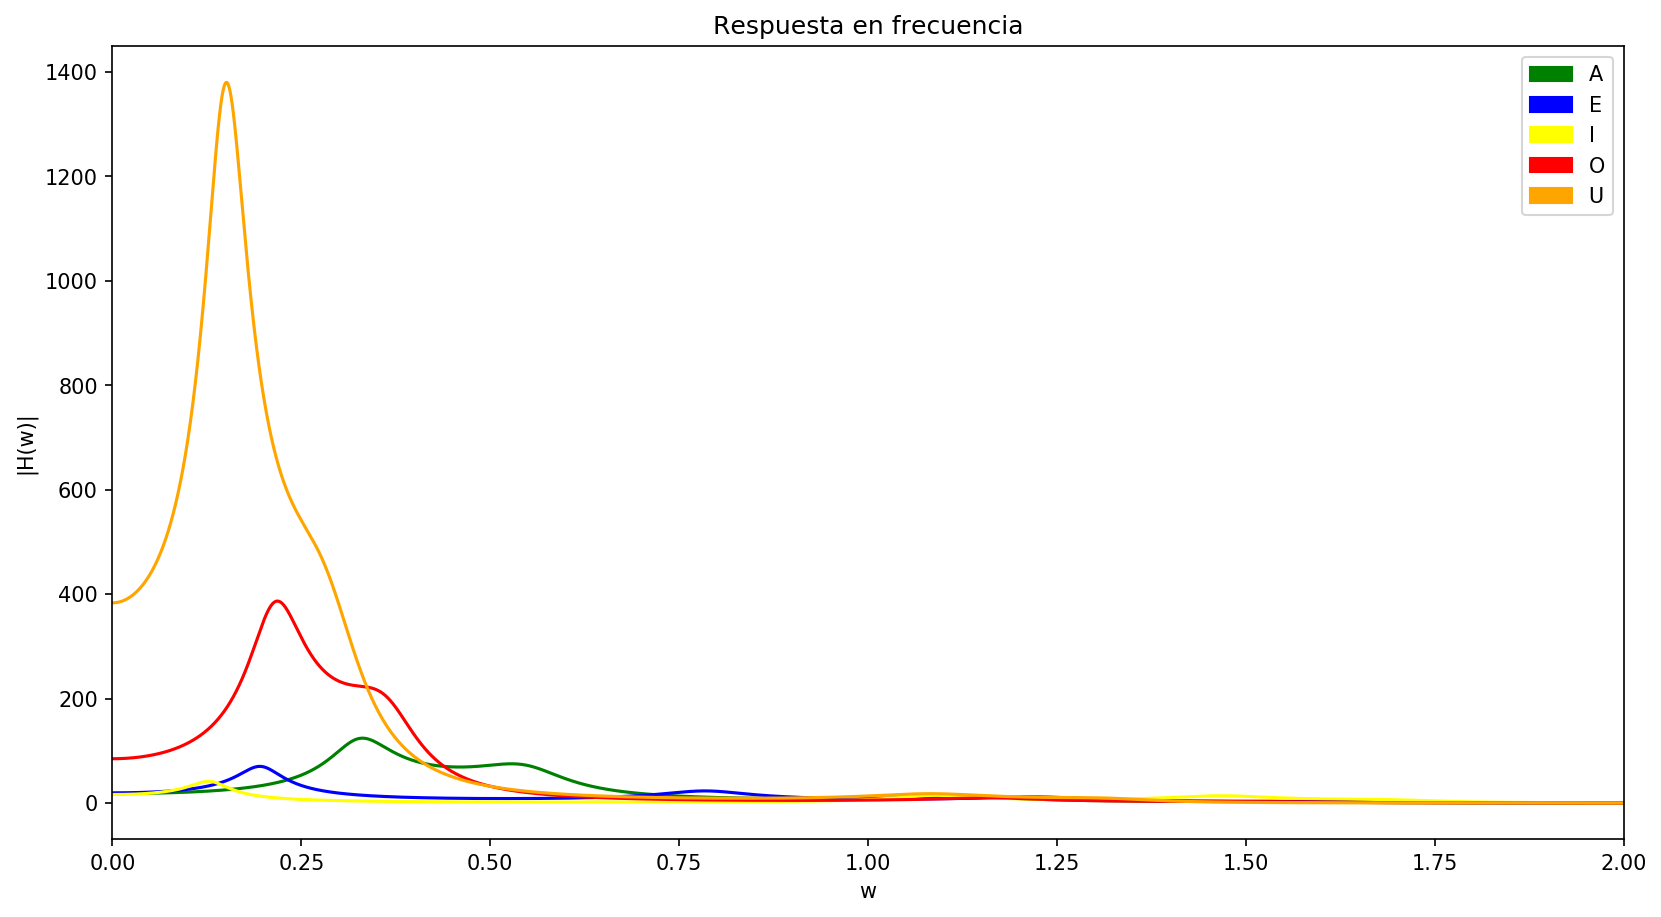

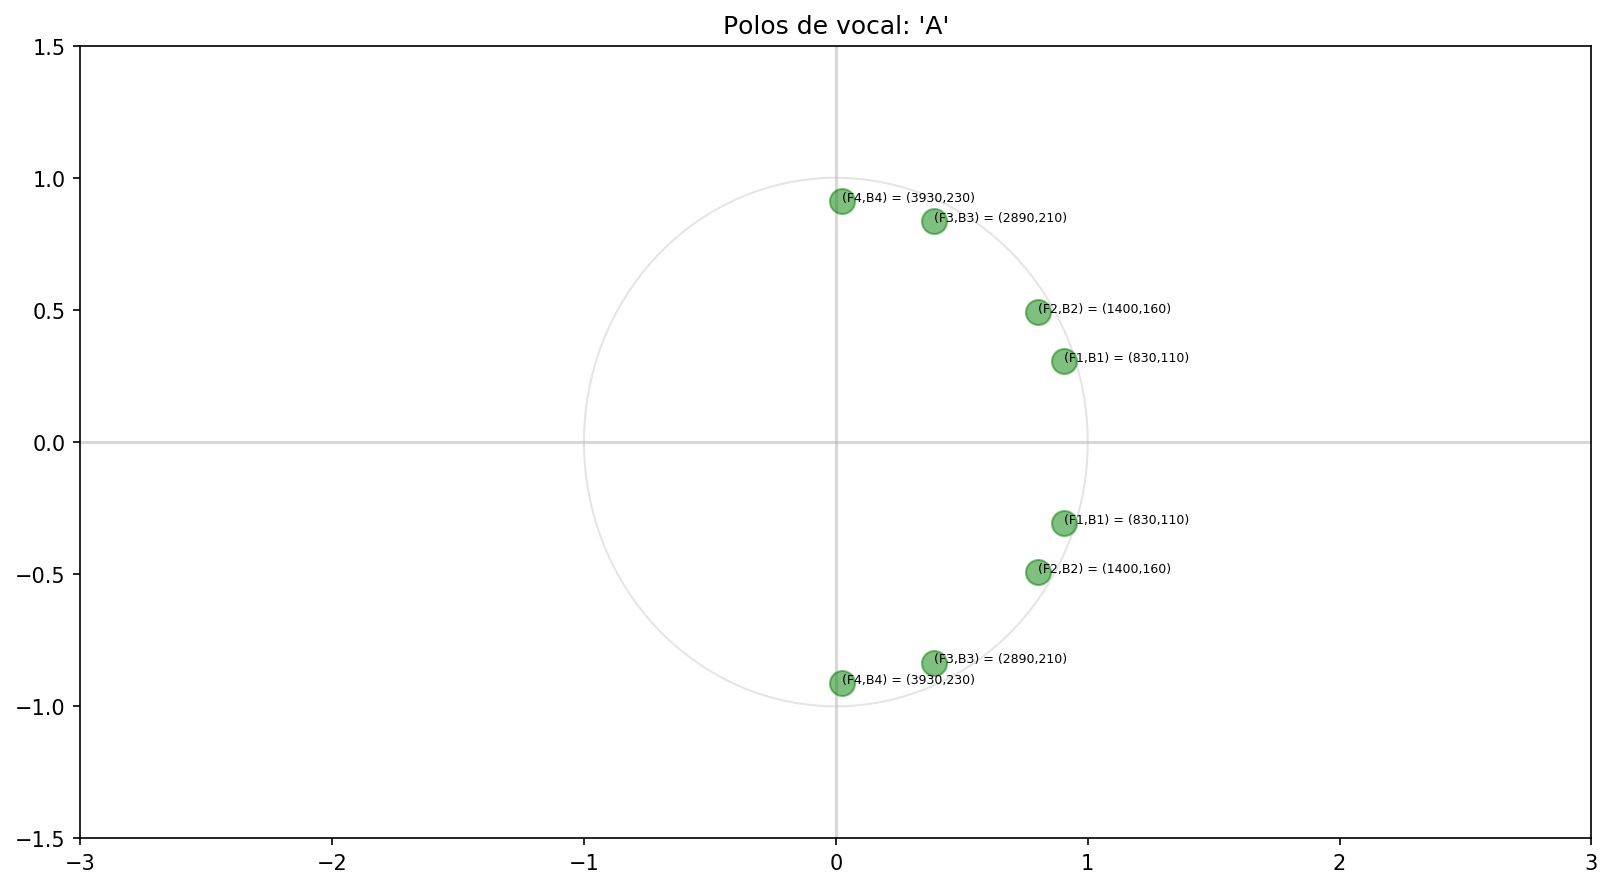

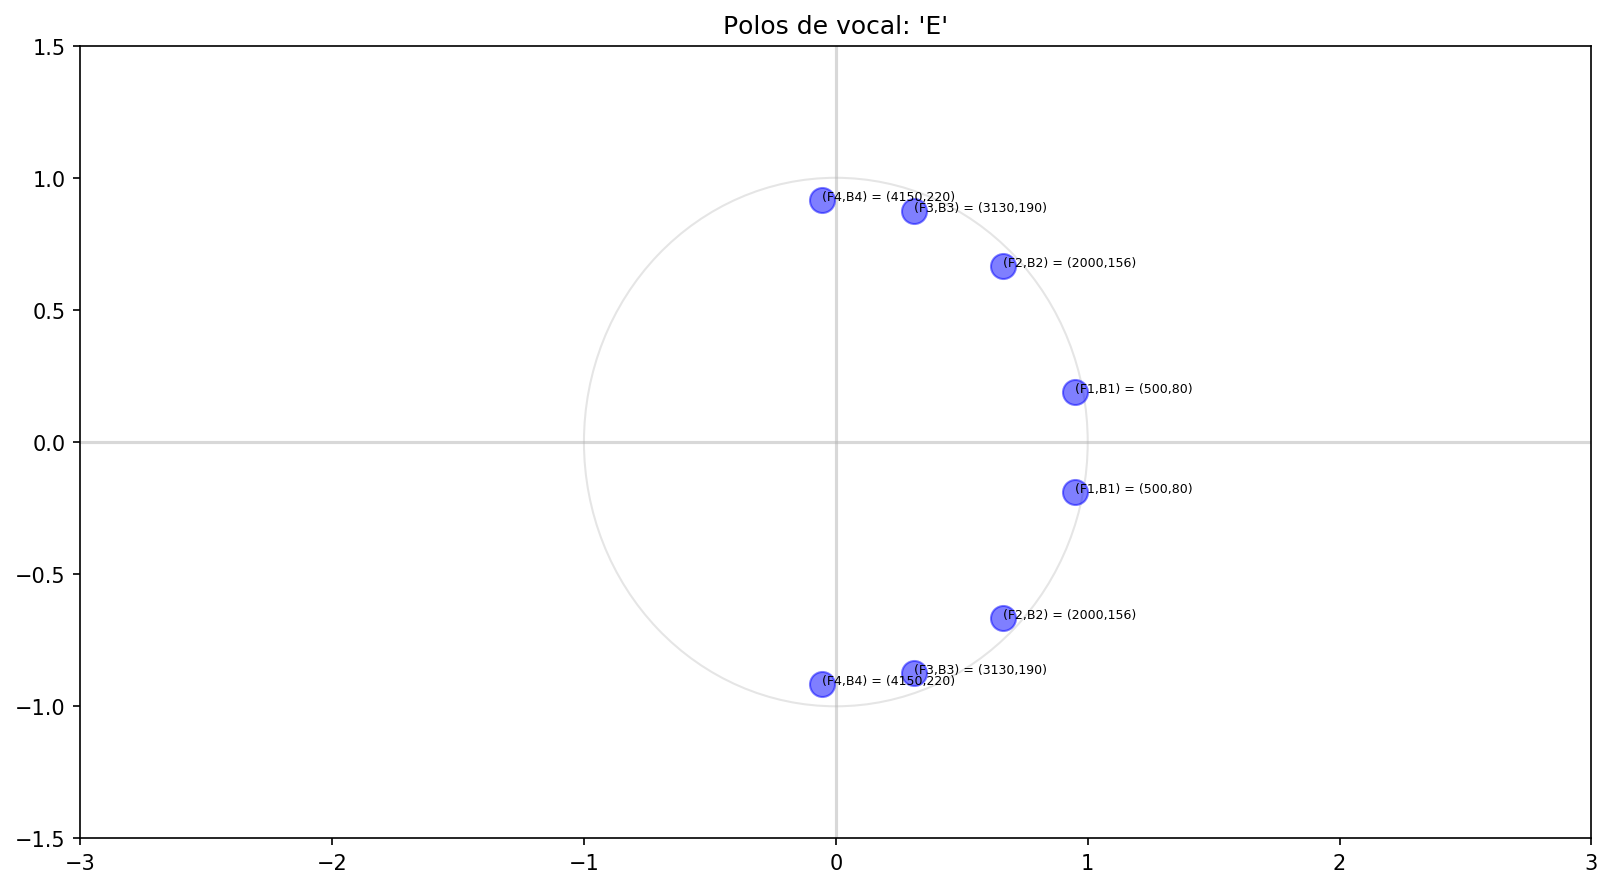

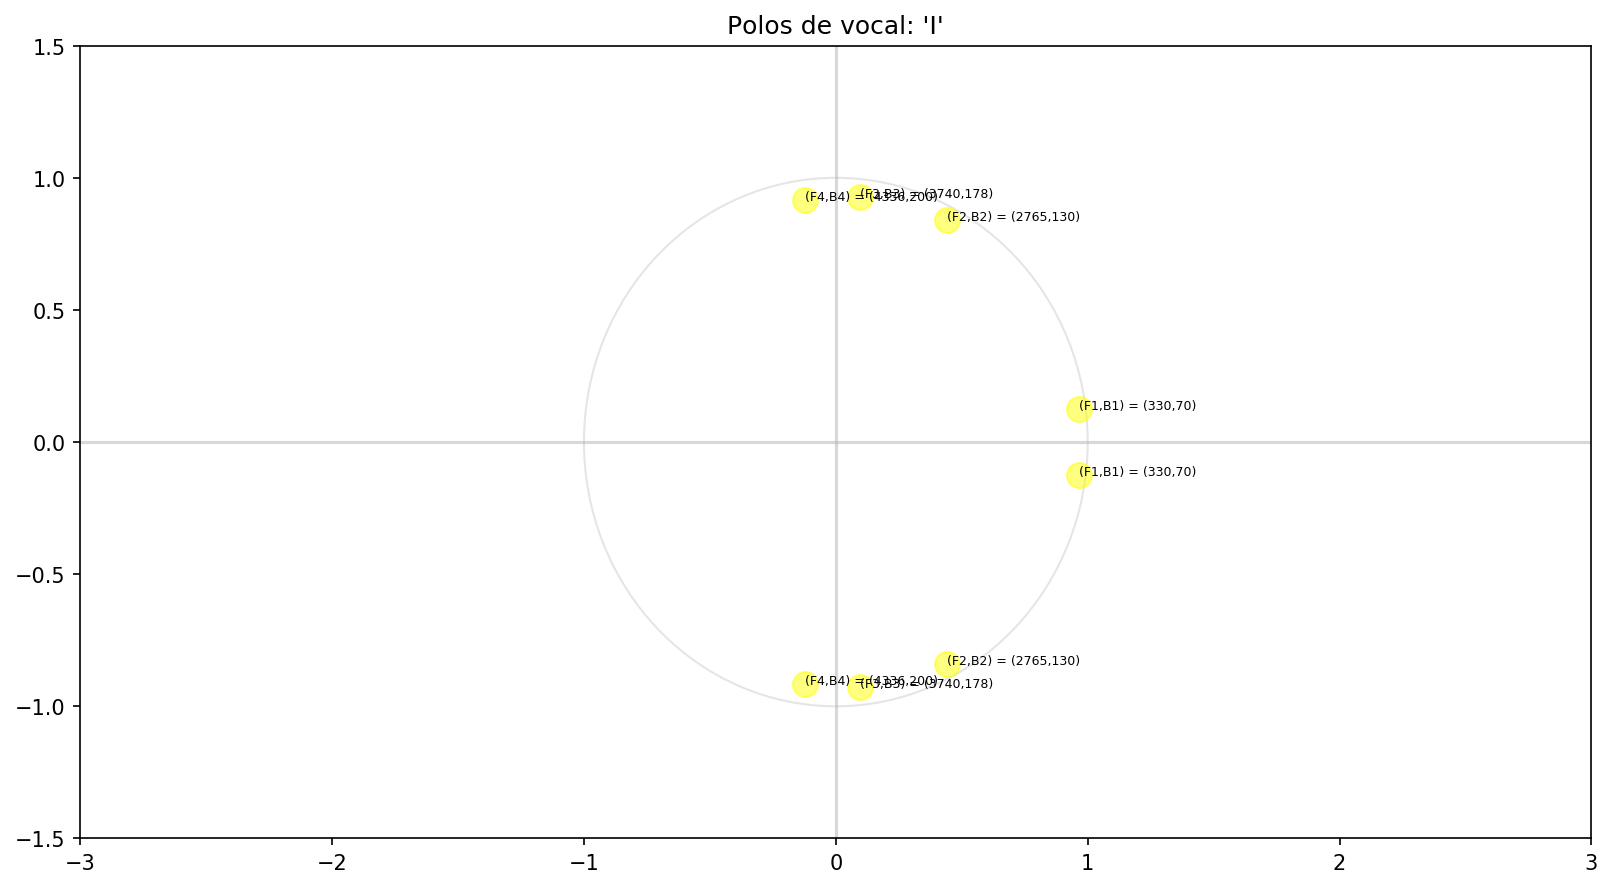

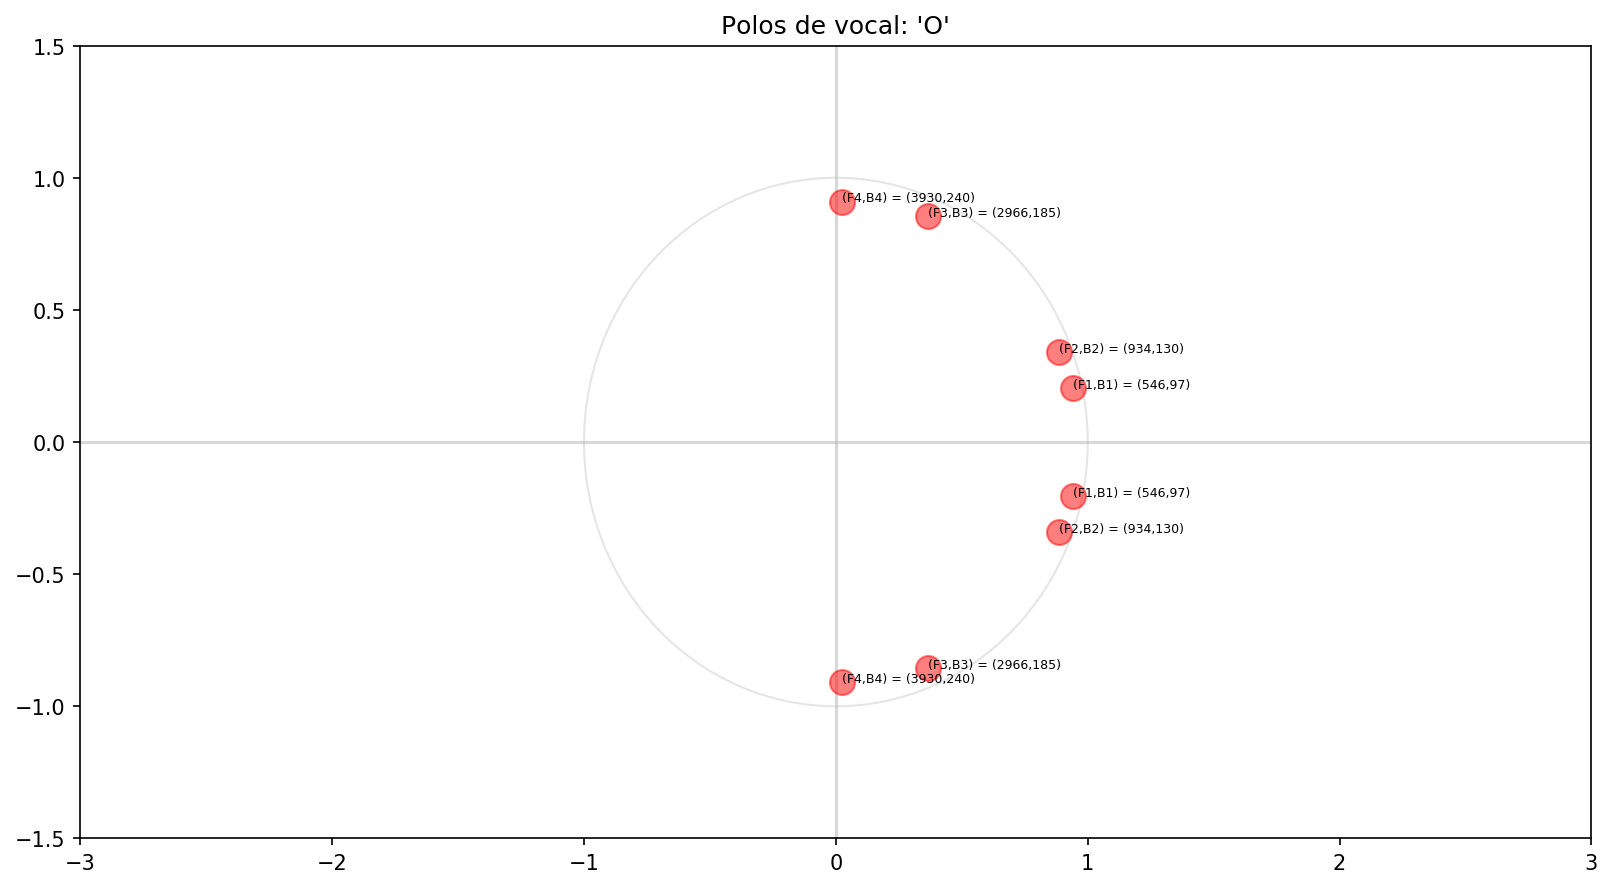

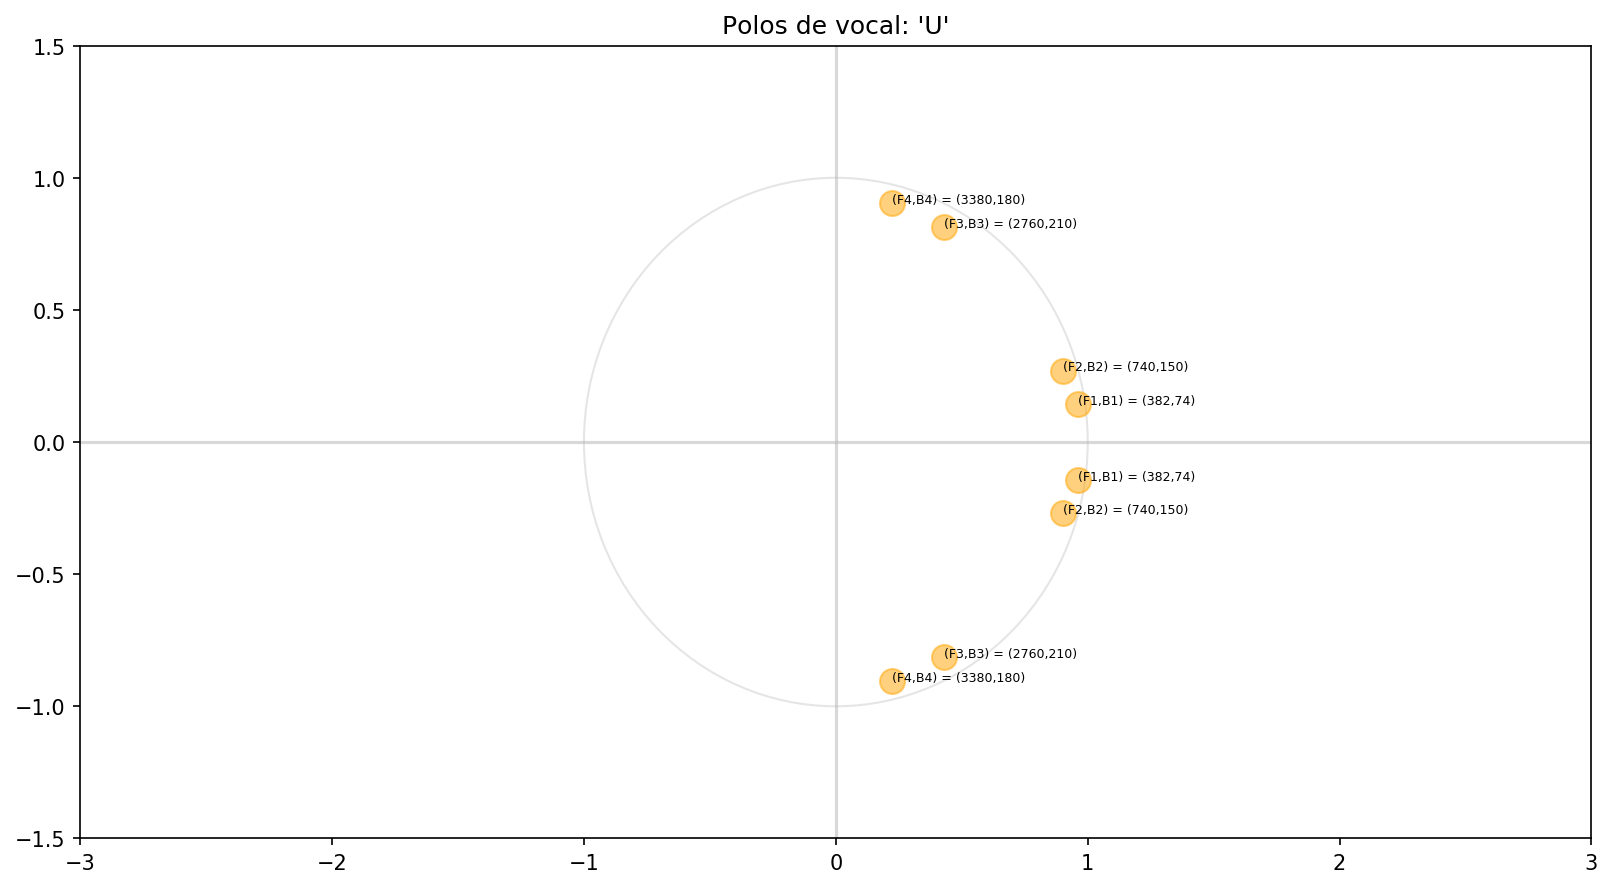

In [344]:
from tp.vocal import Tract

VOCALS = {
    'a' : {'data': [ (830,110), (1400, 160), (2890,210), (3930,230) ], 'color': 'green'},
    'e' : {'data': [ (500,80) , (2000, 156), (3130,190), (4150,220) ], 'color': 'blue'},
    'i' : {'data': [ (330,70) , (2765, 130), (3740,178), (4336,200) ], 'color': 'yellow'},
    'o' : {'data': [ (546,97) , (934, 130) , (2966,185), (3930,240) ], 'color': 'red'},
    'u' : {'data': [ (382,74) , (740, 150) , (2760,210), (3380,180) ], 'color': 'orange'},
}

# Respuesta en frecuencia

w = np.arange(0, np.pi, 0.0001)
for vocal, data in VOCALS.items():
    H_cascade = 1
    for i, (F, B) in enumerate(data['data']):
        H = Tract.generate(B, F, FS)
        H_calc = H(z = np.exp(1j*w))
        VOCALS[vocal]['H' + str(i)] = H_calc
        H_cascade *= H_calc
    VOCALS[vocal]['Hc'] = H_cascade
    plt.plot(w, np.abs(H_cascade), color=data['color'])
plt.title("Respuesta en frecuencia")
plt.xlabel("w")
plt.ylabel("|H(w)|")
plt.xlim(0,2.0)
plt.legend(handles=[mpatches.Patch(color=d['color'], label=v.upper()) for v,d in VOCALS.items()])
plt.show()

# Diagrama de polos y ceros
for vocal, data in VOCALS.items():
    fig, ax = plt.subplots()
    ax.add_artist(plt.Circle((0,0), 1, fill=False, color='black', ls='solid', alpha=0.1))
    plt.title("Polos de vocal: '{}'".format(vocal.upper()))
    plt.axvline(0, color='0.7', alpha=0.5)
    plt.axhline(0, color='0.7', alpha=0.5)
    #plt.axis('scaled')
    plt.axis([-3, 3, -1.5, 1.5])
    for i, (Fn, Bn) in enumerate(data["data"]):
        poles = np.array([Tract.PN(Bn,Fn,FS), np.conj(Tract.PN(Bn,Fn,FS))])
        plt.plot(poles.real, poles.imag, 'o', markersize=12, alpha=0.5, color=data['color'])
        for pole in poles:
            plt.text(pole.real, pole.imag, "(F{0},B{0}) = ({1},{2})".format(i+1,Fn,Bn), fontsize=6)
plt.show()


## 8) Utilizando los resultados de los dos último ejercicios, sintetice un segundo de las cinco vocales. Escuche y grafique. Haga un análisis en frecuencia, y en tiempo-frecuencia.


                                                       1                                                       
______________________________________________________________________________________________________________
+1.00*z(-0) -4.24*z(-1) +9.25*z(-2) -13.54*z(-3) +14.52*z(-4) -11.63*z(-5) +6.85*z(-6) -2.73*z(-7) +0.57*z(-8)


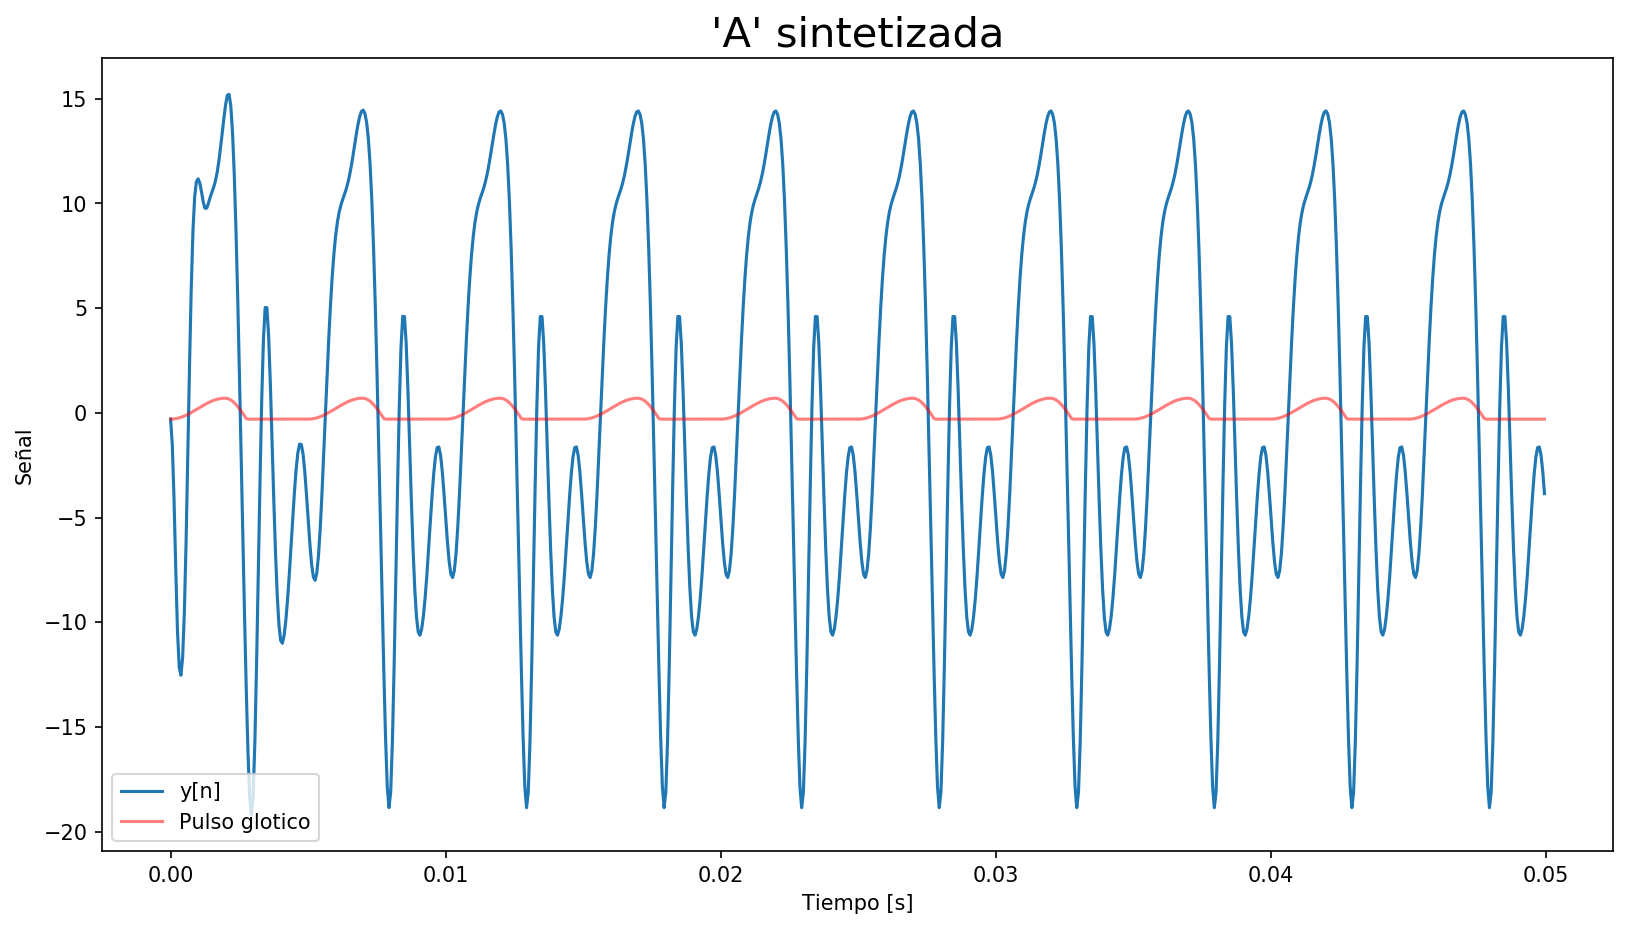

Guardado: "out/A-sint.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


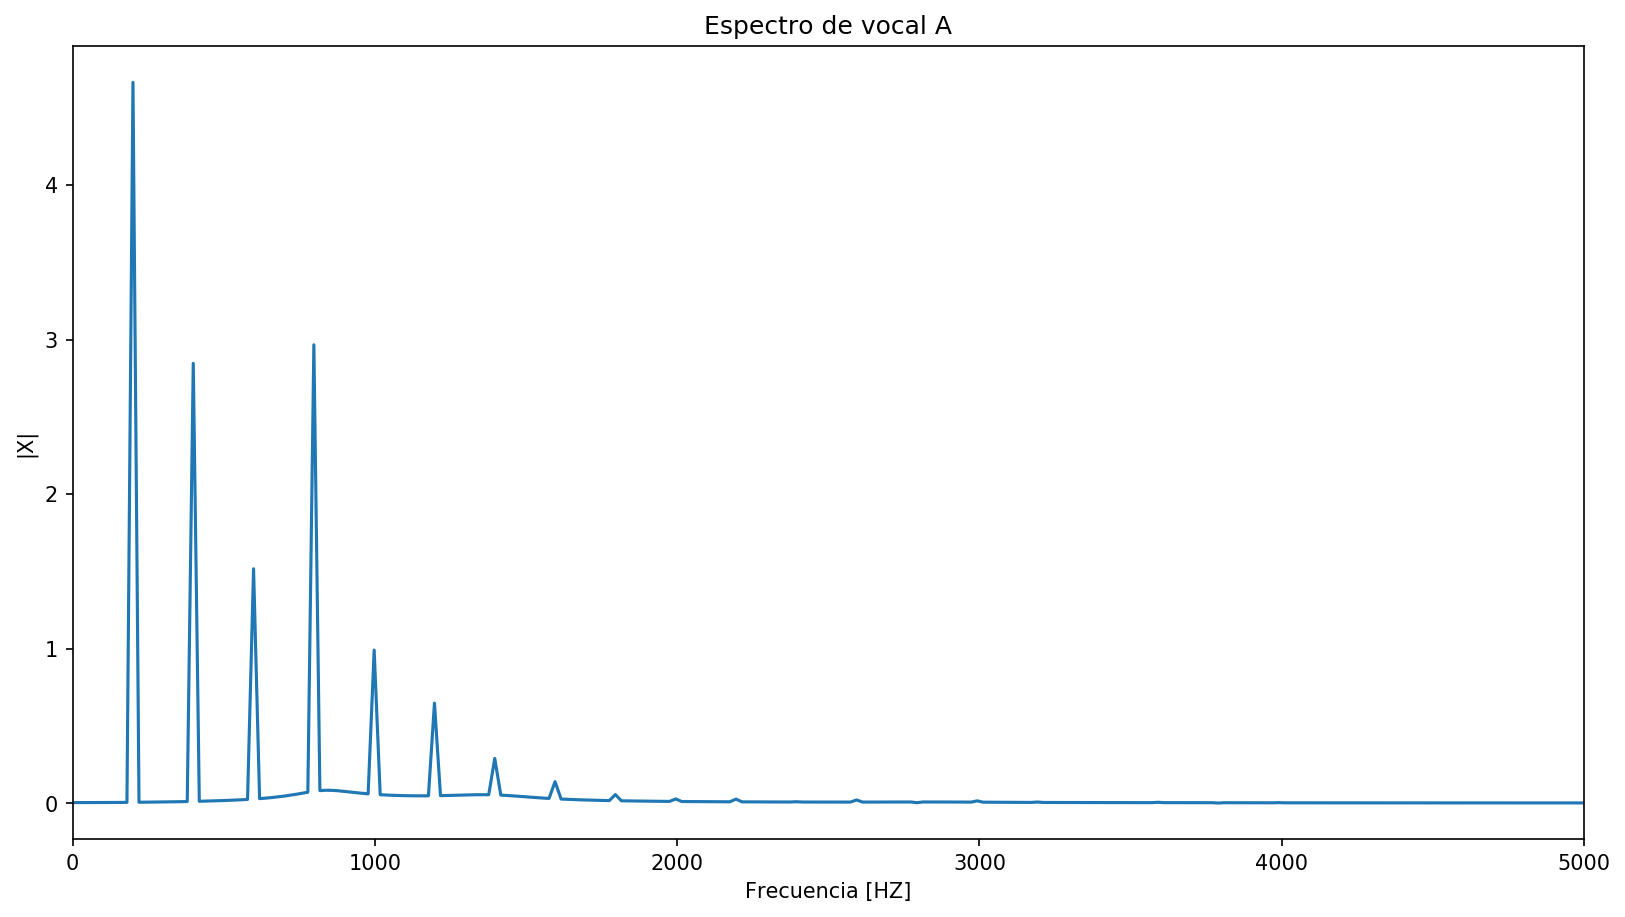

                                                      1                                                      
_____________________________________________________________________________________________________________
+1.00*z(-0) -3.74*z(-1) +7.65*z(-2) -10.88*z(-3) +11.57*z(-4) -9.43*z(-5) +5.77*z(-6) -2.48*z(-7) +0.60*z(-8)


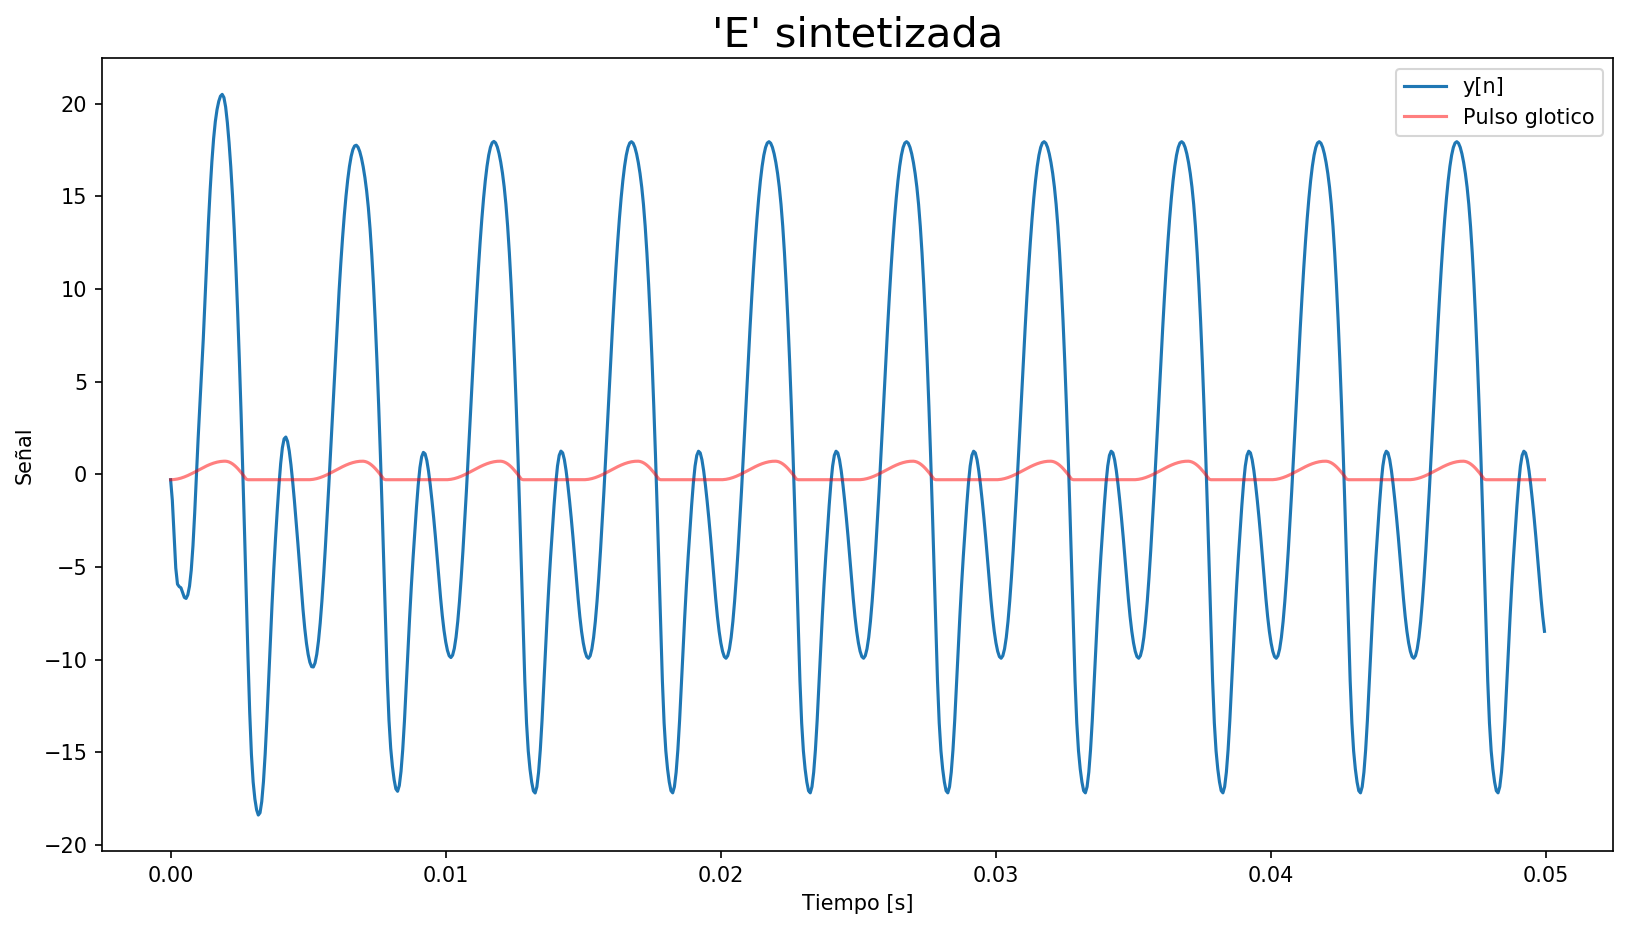

Guardado: "out/E-sint.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


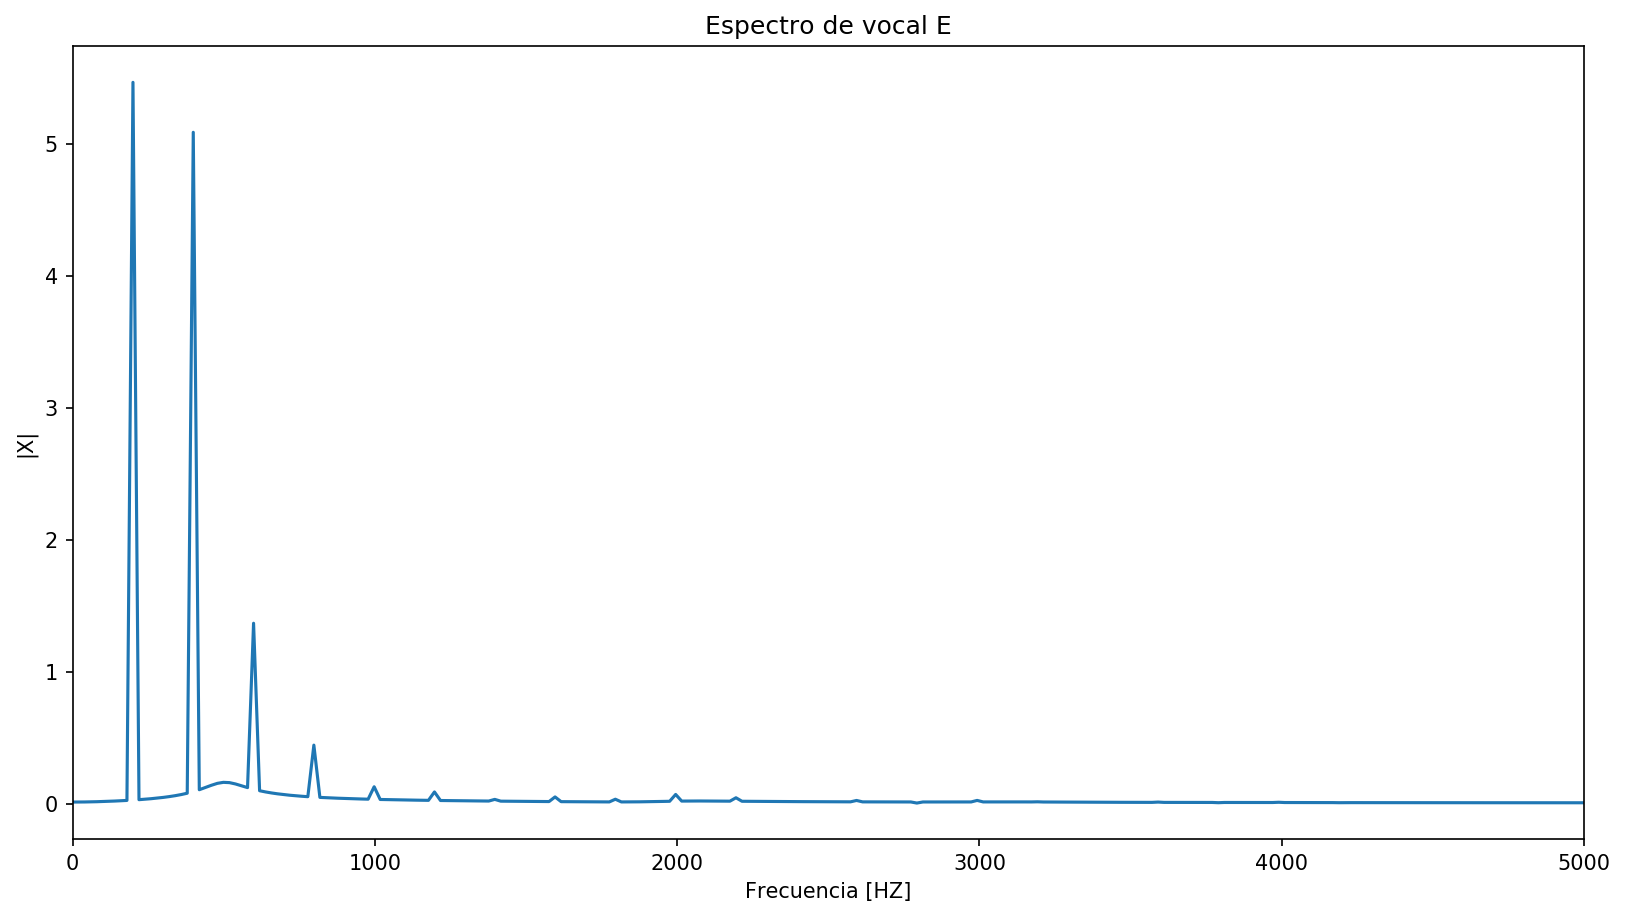

                                                     1                                                     
___________________________________________________________________________________________________________
+1.00*z(-0) -2.76*z(-1) +5.09*z(-2) -7.07*z(-3) +7.29*z(-4) -6.20*z(-5) +3.95*z(-6) -1.88*z(-7) +0.64*z(-8)


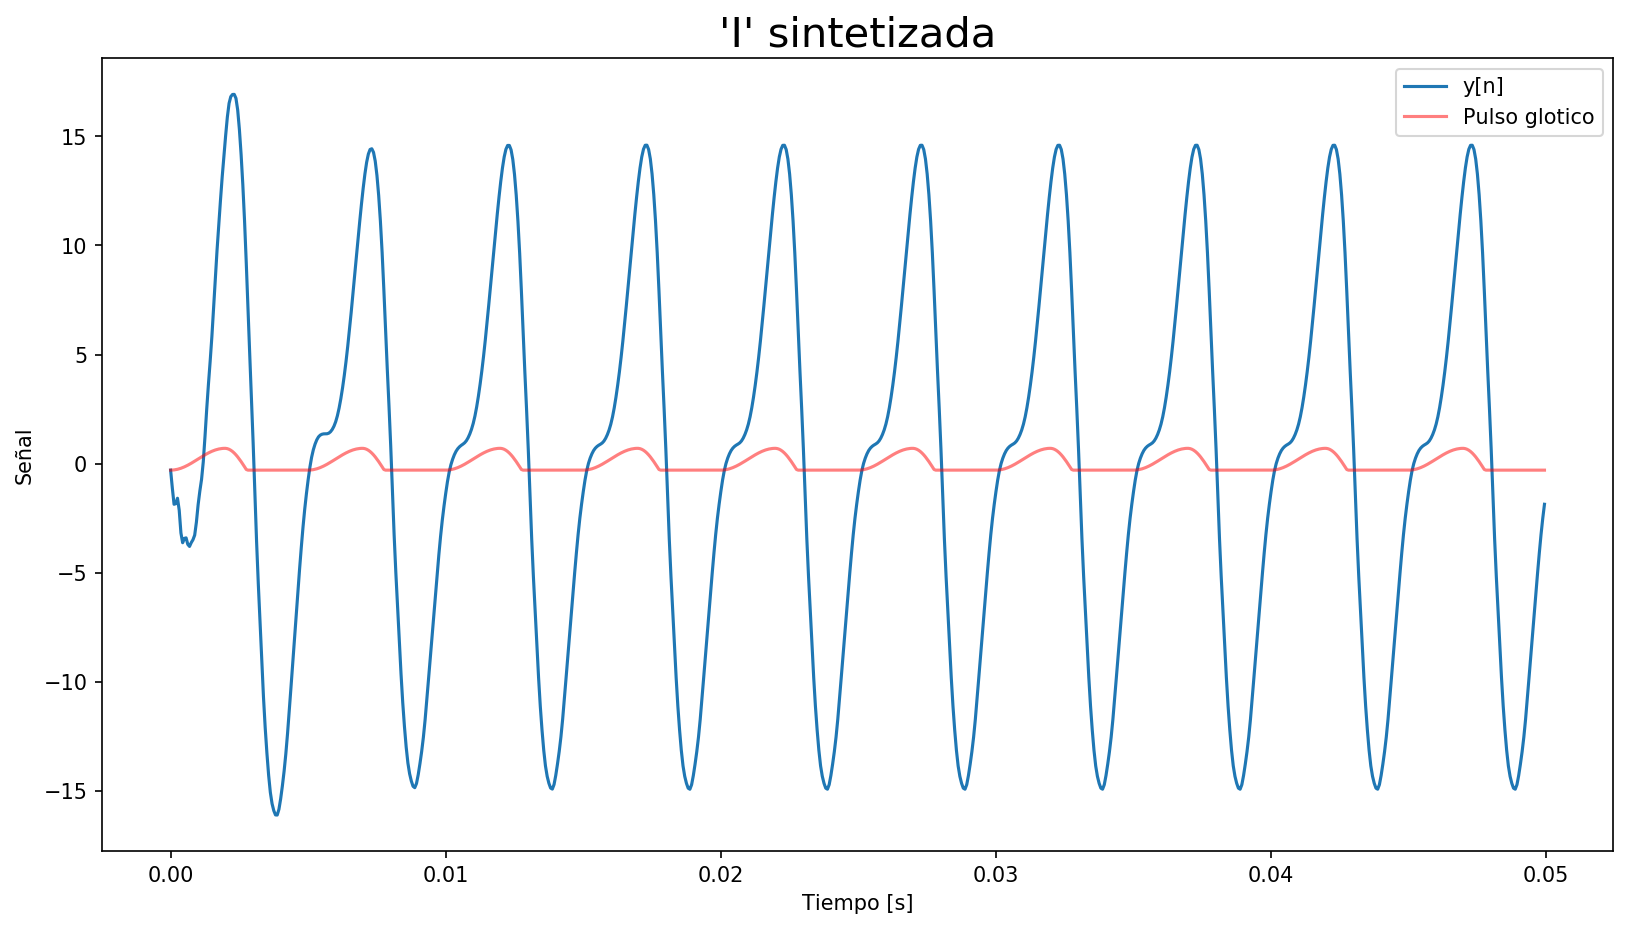

Guardado: "out/I-sint.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


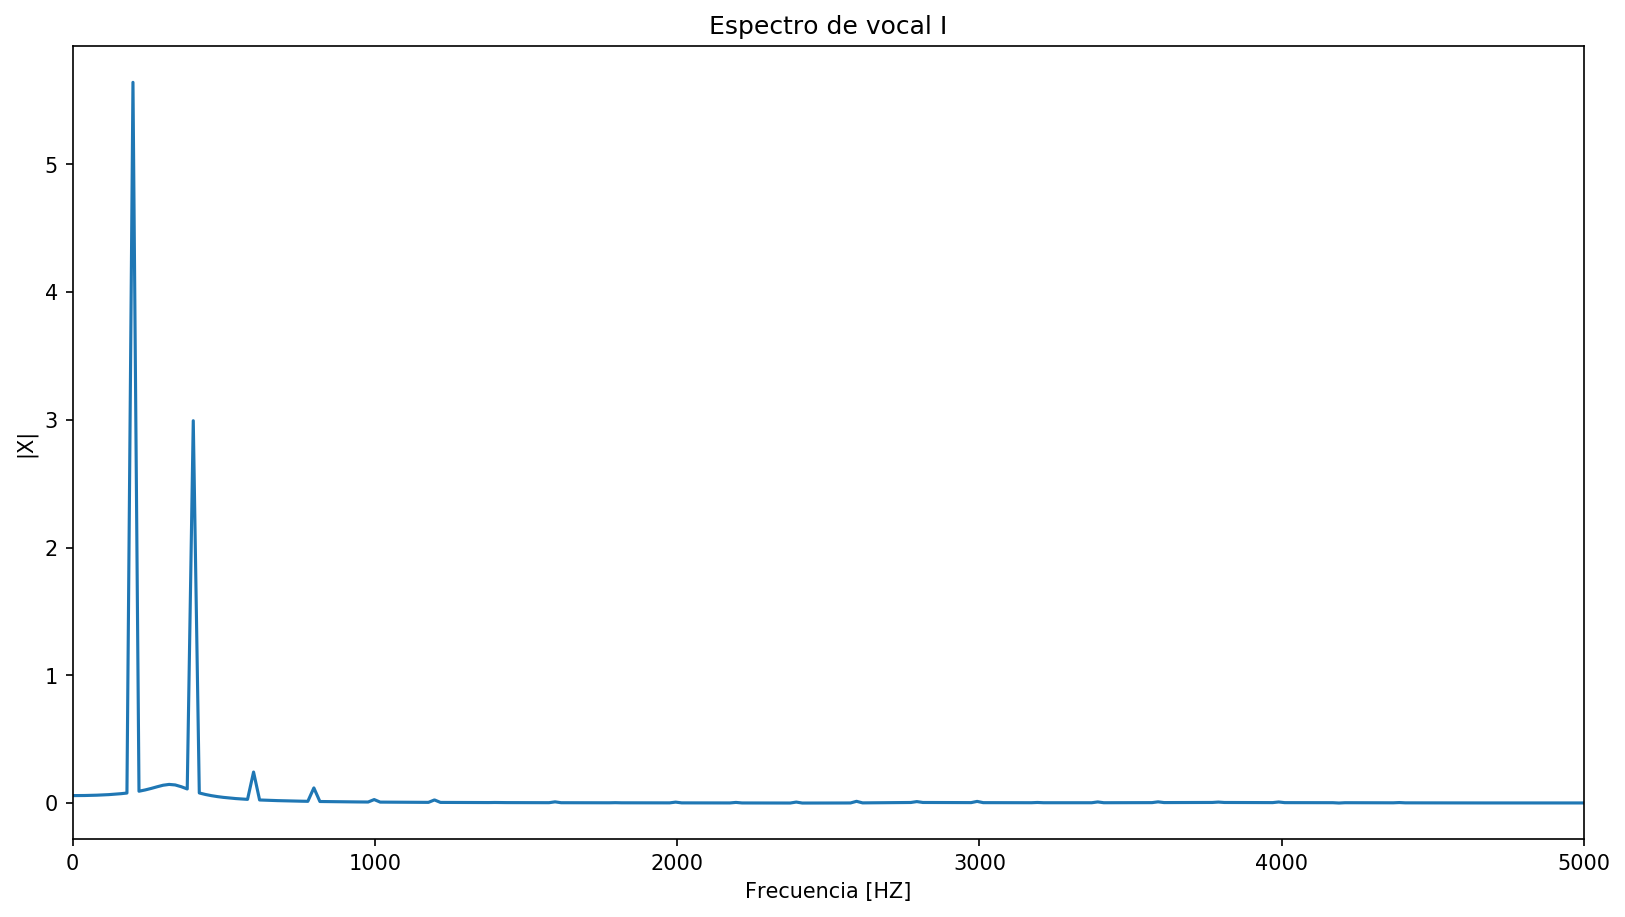

                                                       1                                                       
______________________________________________________________________________________________________________
+1.00*z(-0) -4.44*z(-1) +9.76*z(-2) -14.37*z(-3) +15.49*z(-4) -12.42*z(-5) +7.33*z(-6) -2.94*z(-7) +0.60*z(-8)


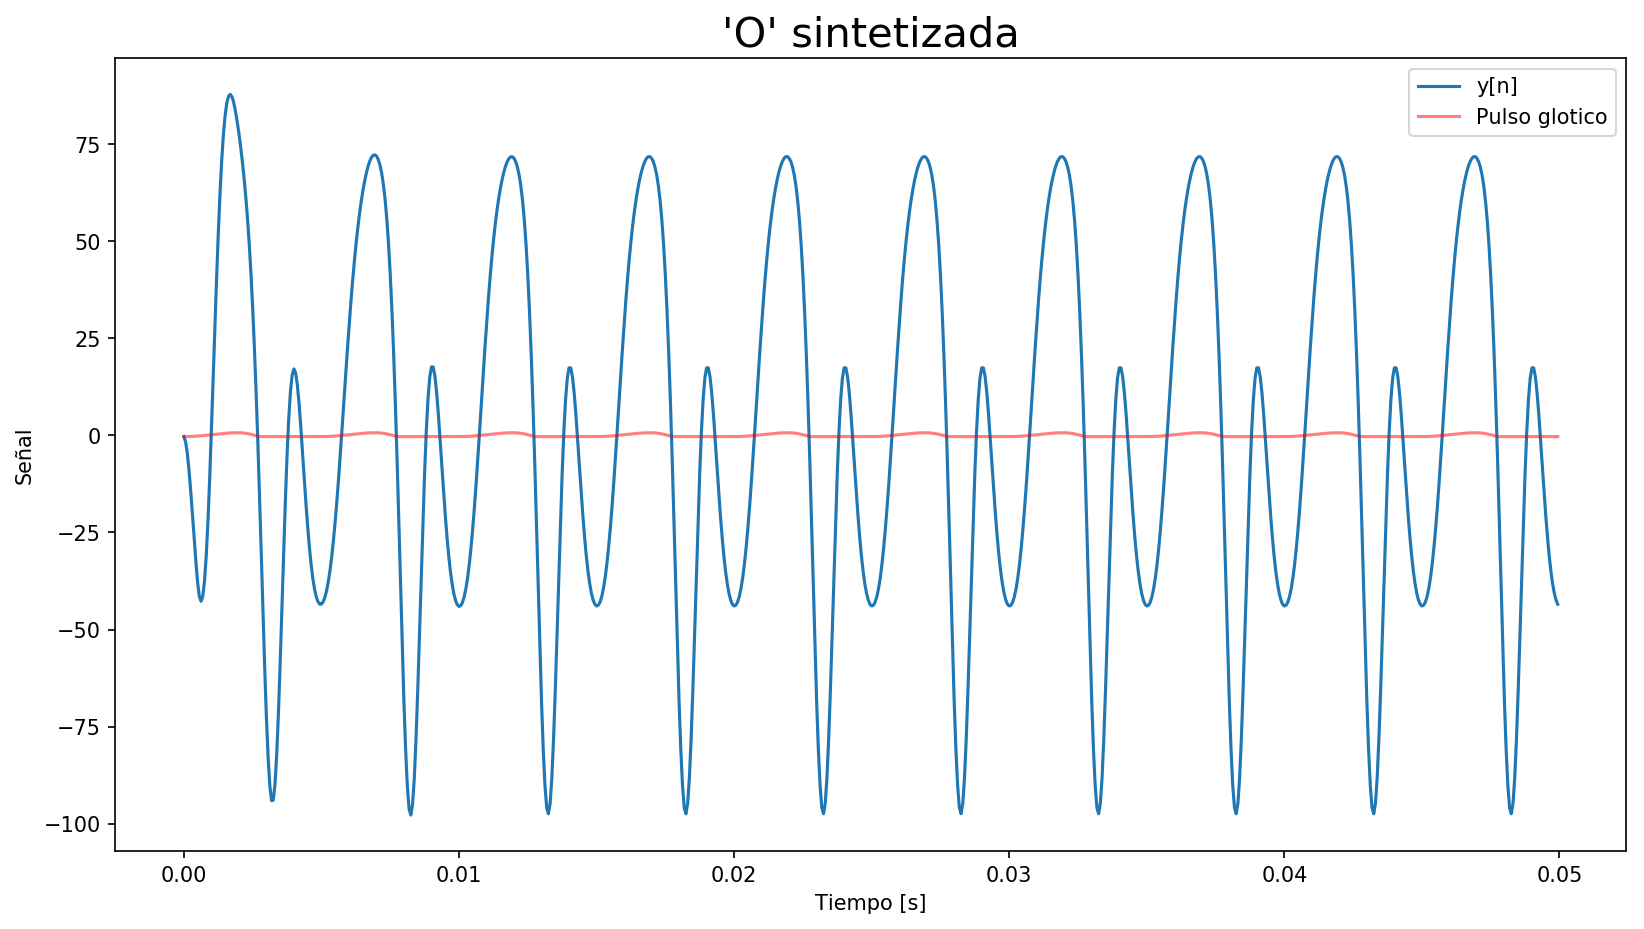

Guardado: "out/O-sint.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


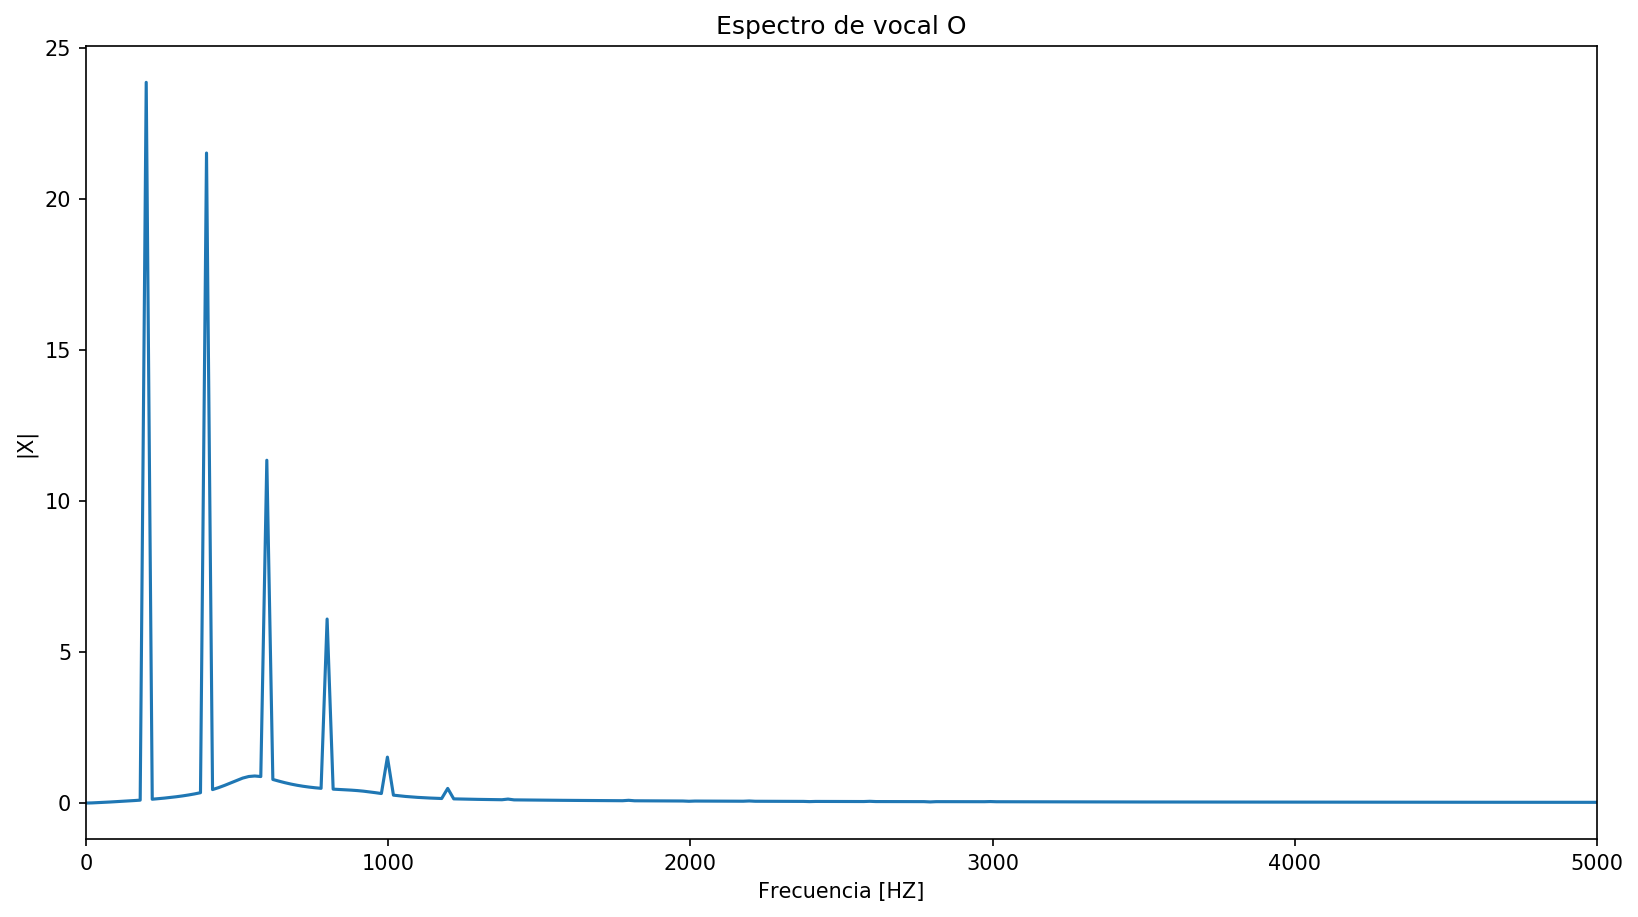

                                                       1                                                       
_______________________________________________________________________________________________________________
+1.00*z(-0) -5.04*z(-1) +12.29*z(-2) -19.33*z(-3) +21.41*z(-4) -17.01*z(-5) +9.52*z(-6) -3.46*z(-7) +0.62*z(-8)


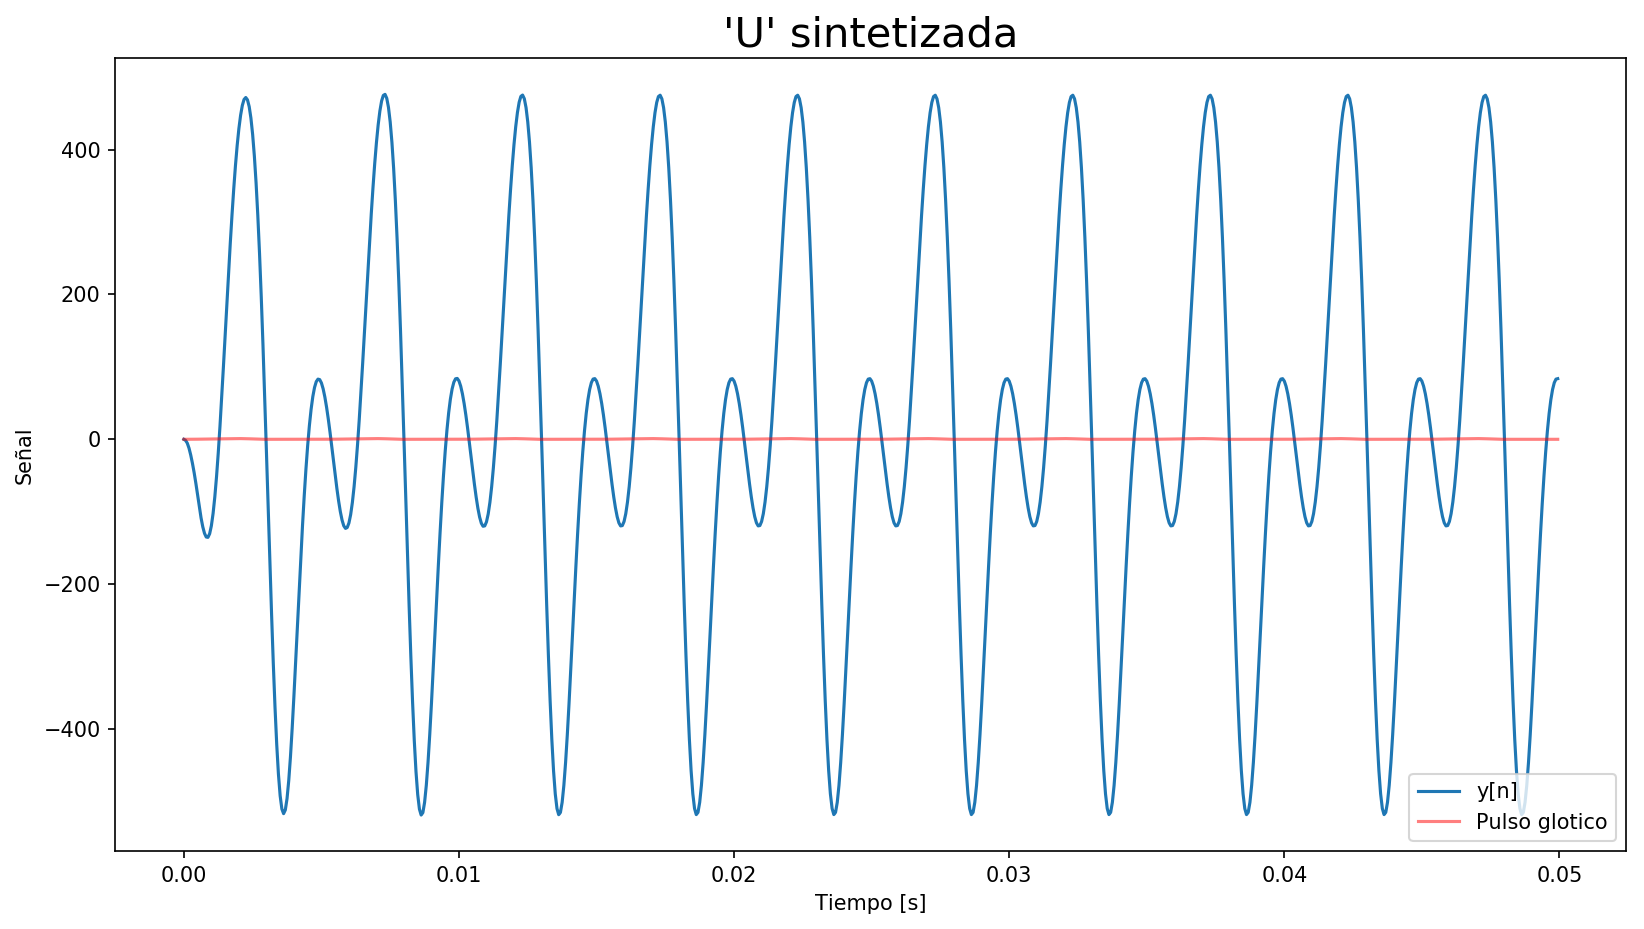

Guardado: "out/U-sint.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


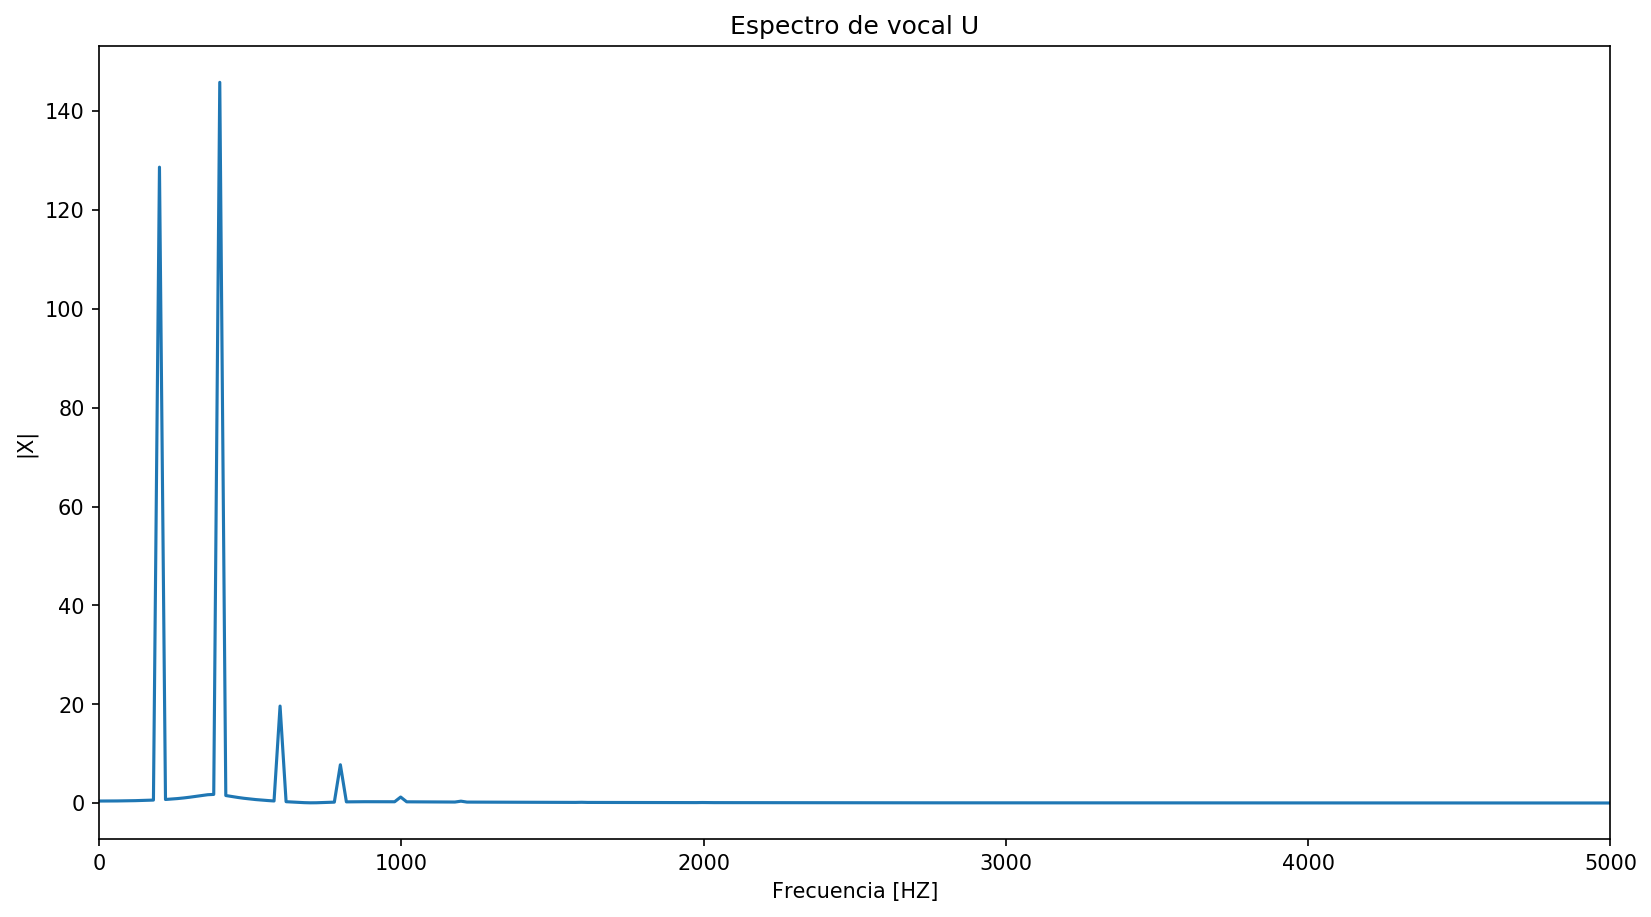

In [624]:
from scipy import signal

PULSO_GLOTICO = P6_10
# H_vocal = CerosVocal/PolosVocal
# Filtro(CerosVocal, PolosVocal, PULSO_GLOTICO)
def get_poles(vocal: str, n = 0):
    fn, bn = VOCALS[vocal.lower()]['data'][n]
    pn = Tract.PN(bn,fn,FS)
    return np.array([pn, np.conj(pn)])

def sintetize(vocal: str, **kwargs):
    n = kwargs.get("n", [0])
    max_n = len(VOCALS[vocal.lower()]['data'])
    ns = range(max_n) if n == "all" else n
    poles = np.concatenate([get_poles(vocal, int(n)) for n in ns if str(n).isdigit() and 0 <= int(n) < max_n])
    den = " ".join(["{}{:.2f}*z(-{})".format("+" if c >= 0 else "",c,i) for i,c in enumerate(np.poly(poles))])
    print(" "*(len(den)//2) + "1" + " "*(len(den)//2))
    print("_" * len(den))
    print("{}".format(den))
    tile = kwargs.get("tile", 1)
    pulso_extendido = np.tile(PULSO_GLOTICO, tile)
    sint = signal.lfilter([1], np.poly(poles),  pulso_extendido)
    plt.title("'{}' sintetizada".format(vocal.upper()), fontsize=20)
    sample_size = int(len(sint)/tile)
    t = np.arange(0, (10*tile)/F06,1/FS6)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Señal")
    plt.plot(t[:sample_size], sint[:sample_size])
    plt.plot(t[:sample_size], pulso_extendido[:sample_size], color="red", alpha=0.5)
    plt.legend(["y[n]", "Pulso glotico"])
    plt.show()
    store_wav(sint, FS, kwargs.get('title', "{}-sint".format(vocal.upper())))
    
    amplitude_spectrum = np.abs(np.fft.rfft(sint[:sample_size]) / sample_size)
    freqs = np.arange(0, FS/2, (FS/2) / len(amplitude_spectrum))
    plt.title("Espectro de vocal {}".format(vocal.upper()))
    plt.ylabel("|X|")
    plt.xlabel("Frecuencia [HZ]")
    plt.xlim(0,5e3)
    plt.plot(freqs, amplitude_spectrum)
    plt.show()
    VOCALS[vocal]['sint_large'] = t,sint
    return t[:sample_size], sint[:sample_size]

for vocal in VOCALS:
    t,sint = sintetize(vocal, n="all", tile=20)
    VOCALS[vocal]['sint'] = (t,sint)


## 9) A partir de las vocales sintetizadas del ejercicio anterior, estime la respuesta en frecuencia correspondiente al tracto vocal y el contorno de la frecuencia fundamental mediante la transformada cepstrum.

- Y = Pos del max(|C(n)|) en Hz
- X = t

```
1) y^[n] = x^[n] + h^[n]

   y^[n] es Ceptrum de señal de una vocal sintetizada

- Elimino frecuencias altas entonces descarto x^[n]. Quefrencia = 1/fr. Quefrencias bajas.
  El umbral se define manualmente.
  
2) y^[n] = h^[n]

   F{h^[n]} = F{F^-1{log|F{h[n]}|}}
   
   F{h^[n]} = log|F{h[n]}| donde F{h[n]} = H(w) <--- Respuesta en frecuencia
   
   F{h^[n]} = log|H(w)|
   
   Comparo con la H del punto 6
```



Ysint de 0 seg a 0.0021875 seg


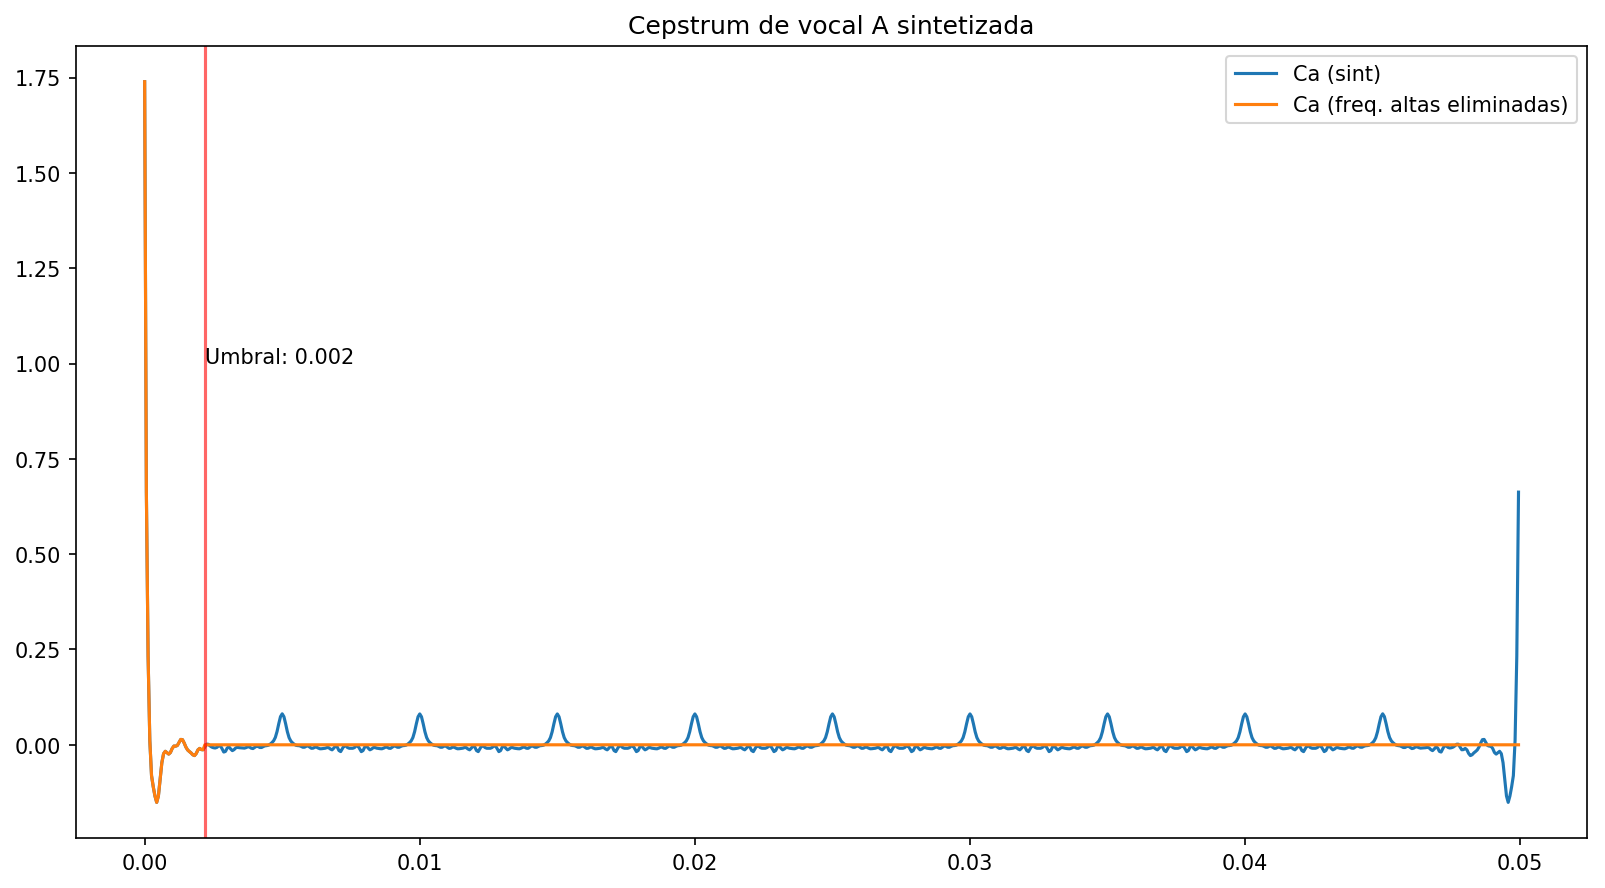

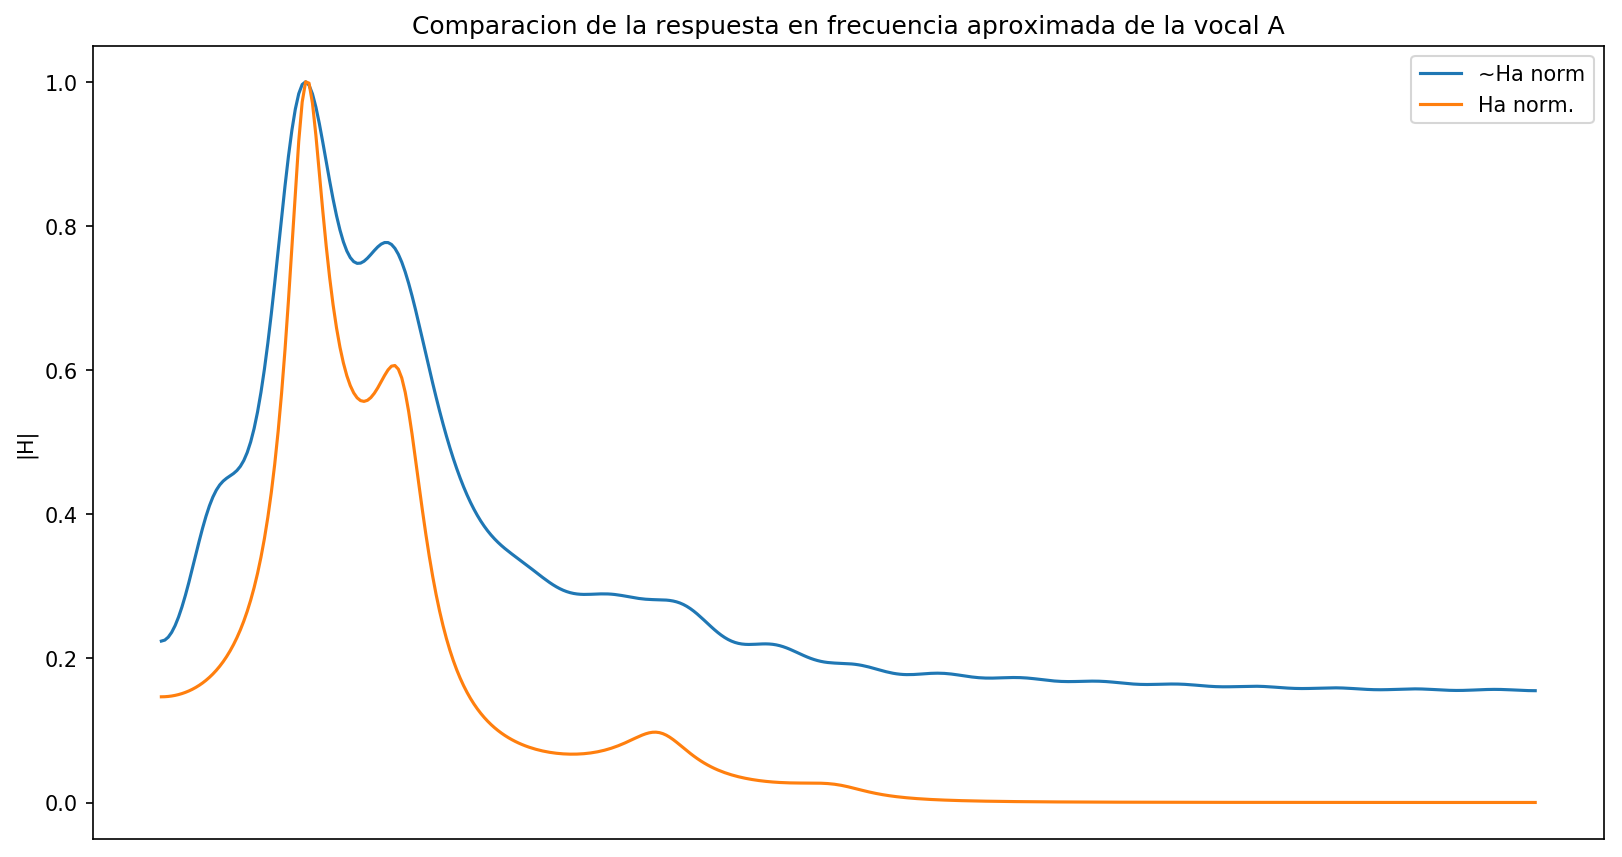

Ysint de 0 seg a 0.0025 seg


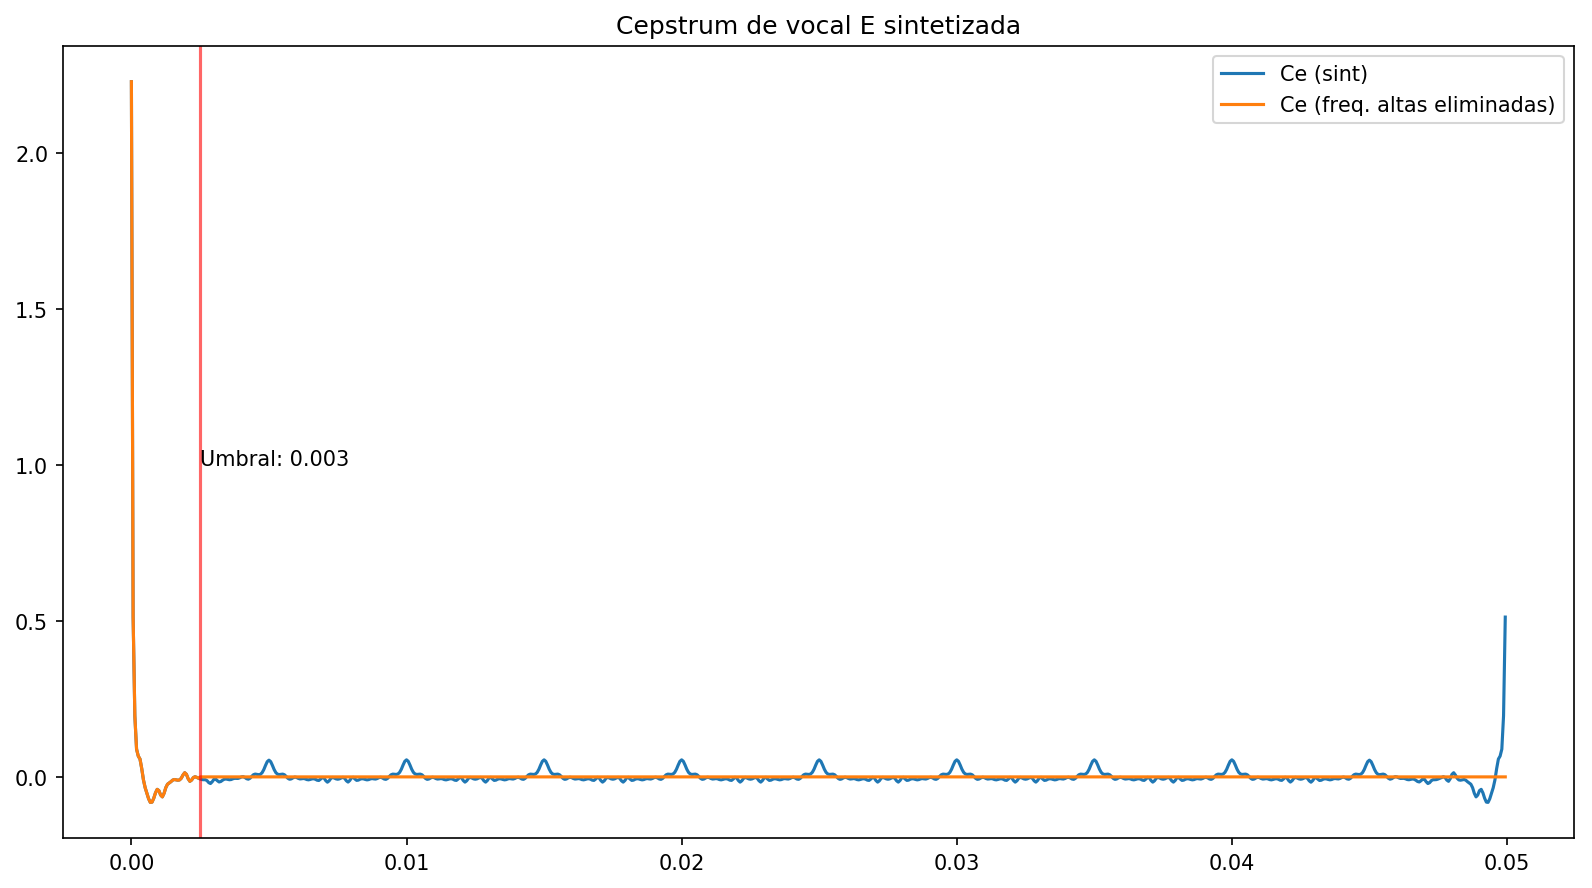

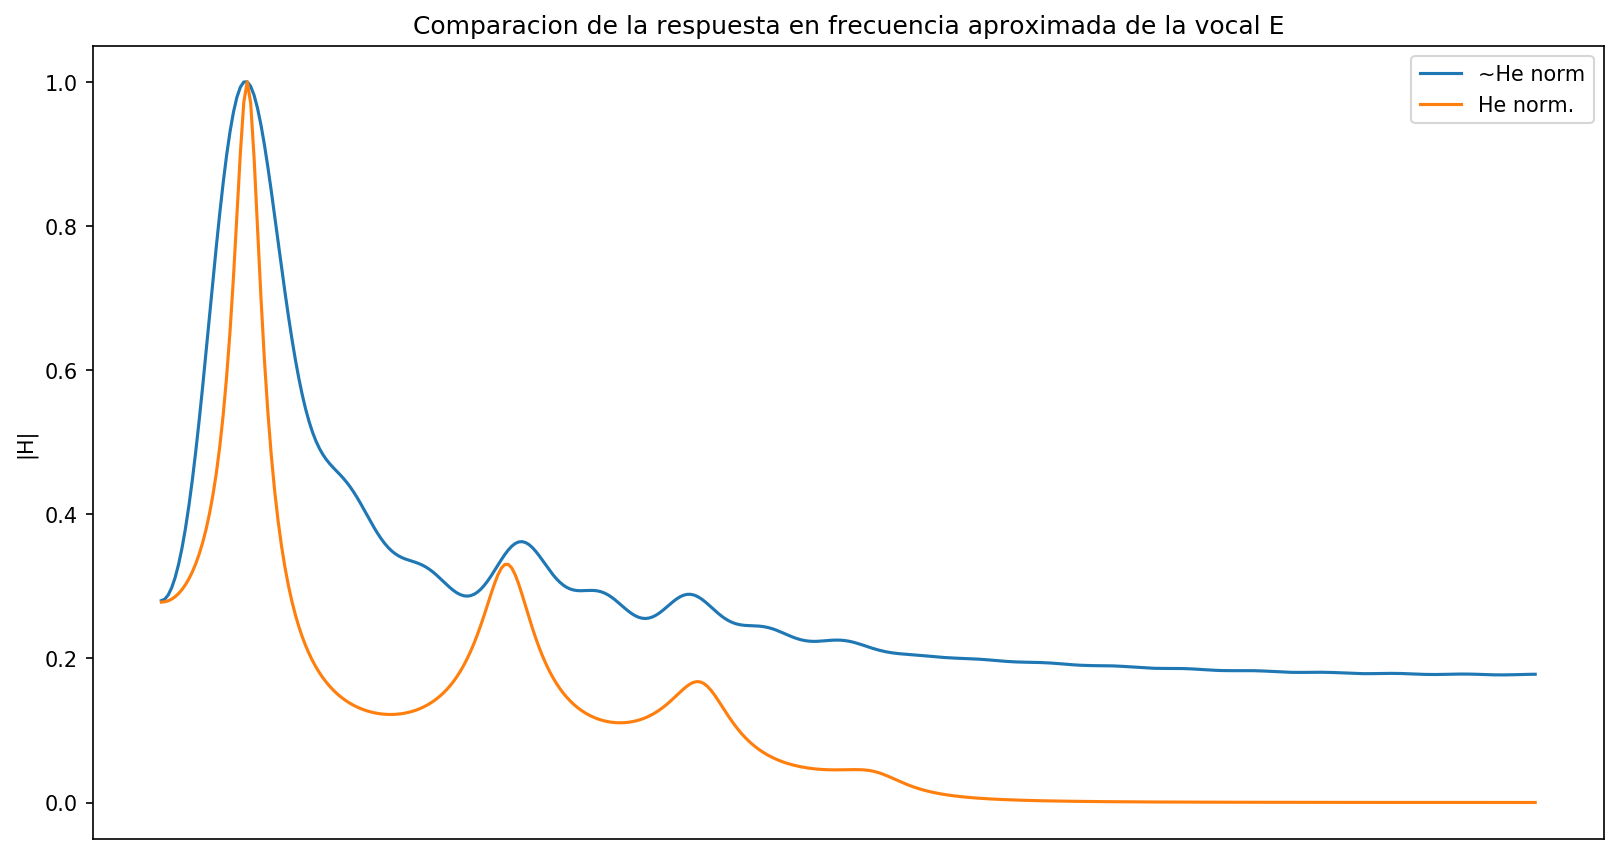

Ysint de 0 seg a 0.00375 seg


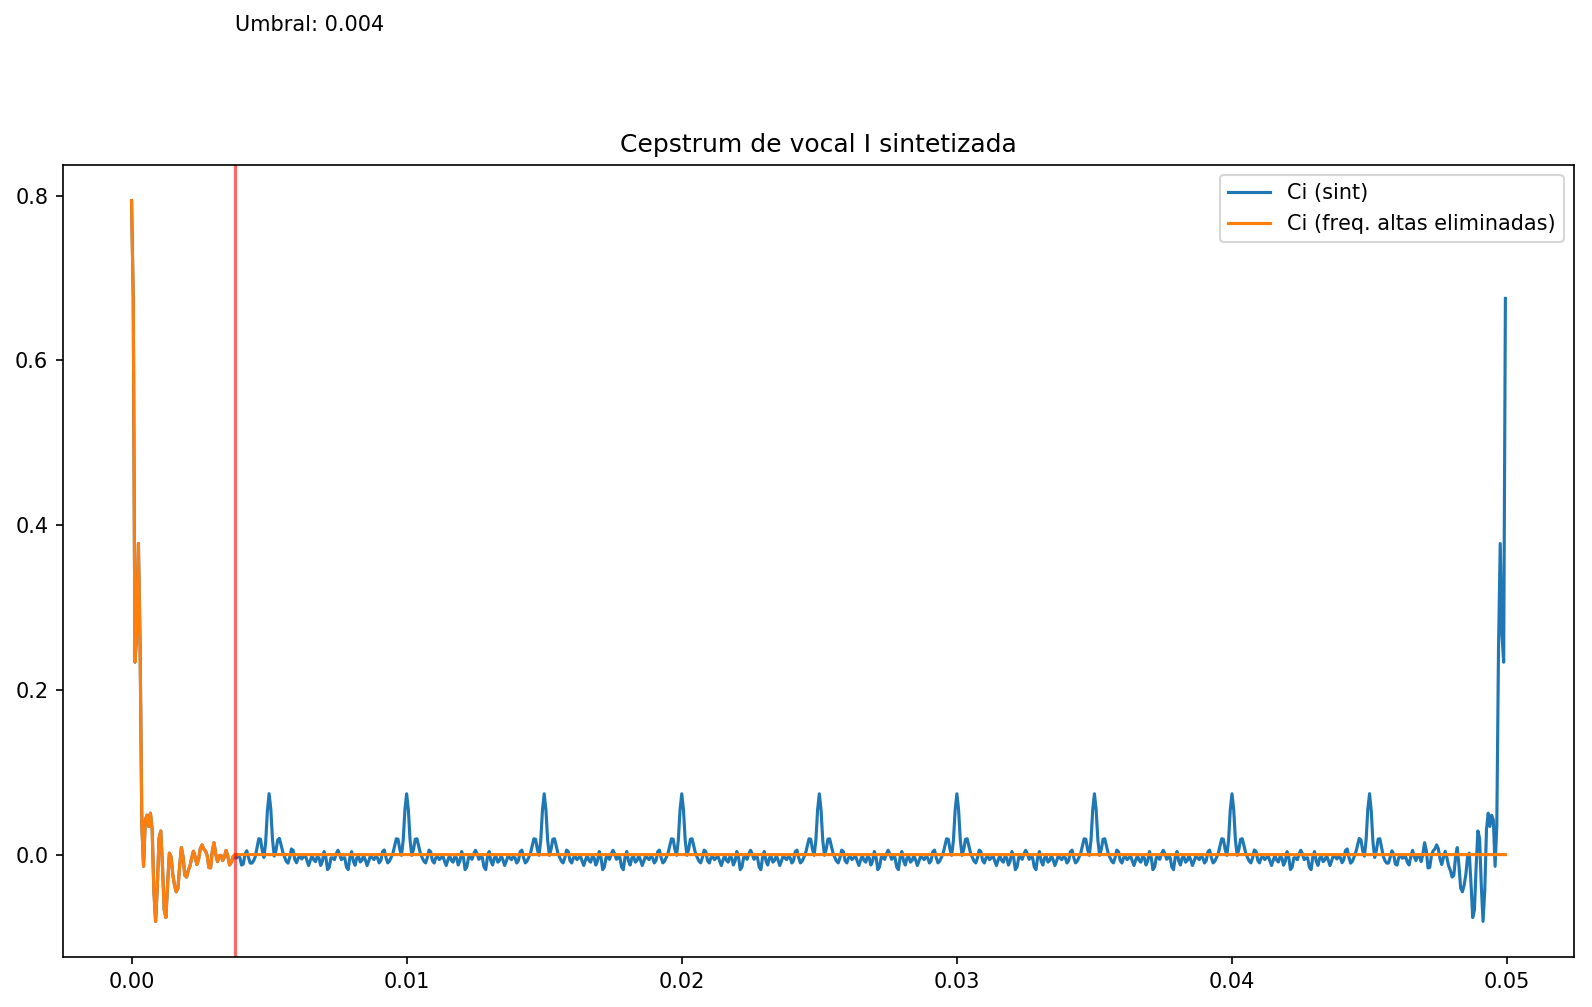

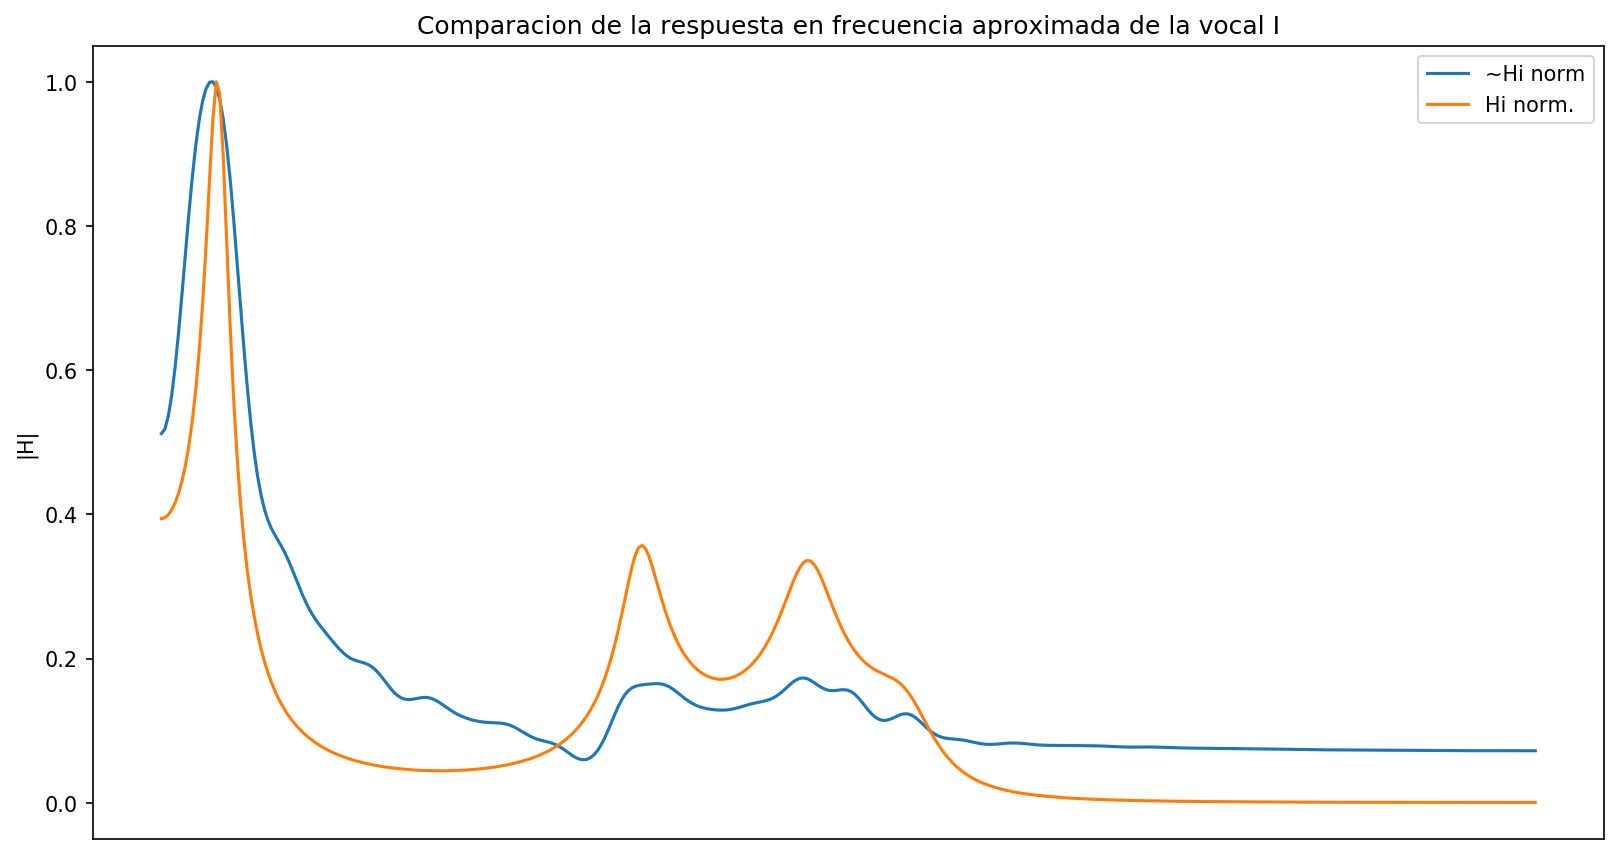

Ysint de 0 seg a 0.003125 seg


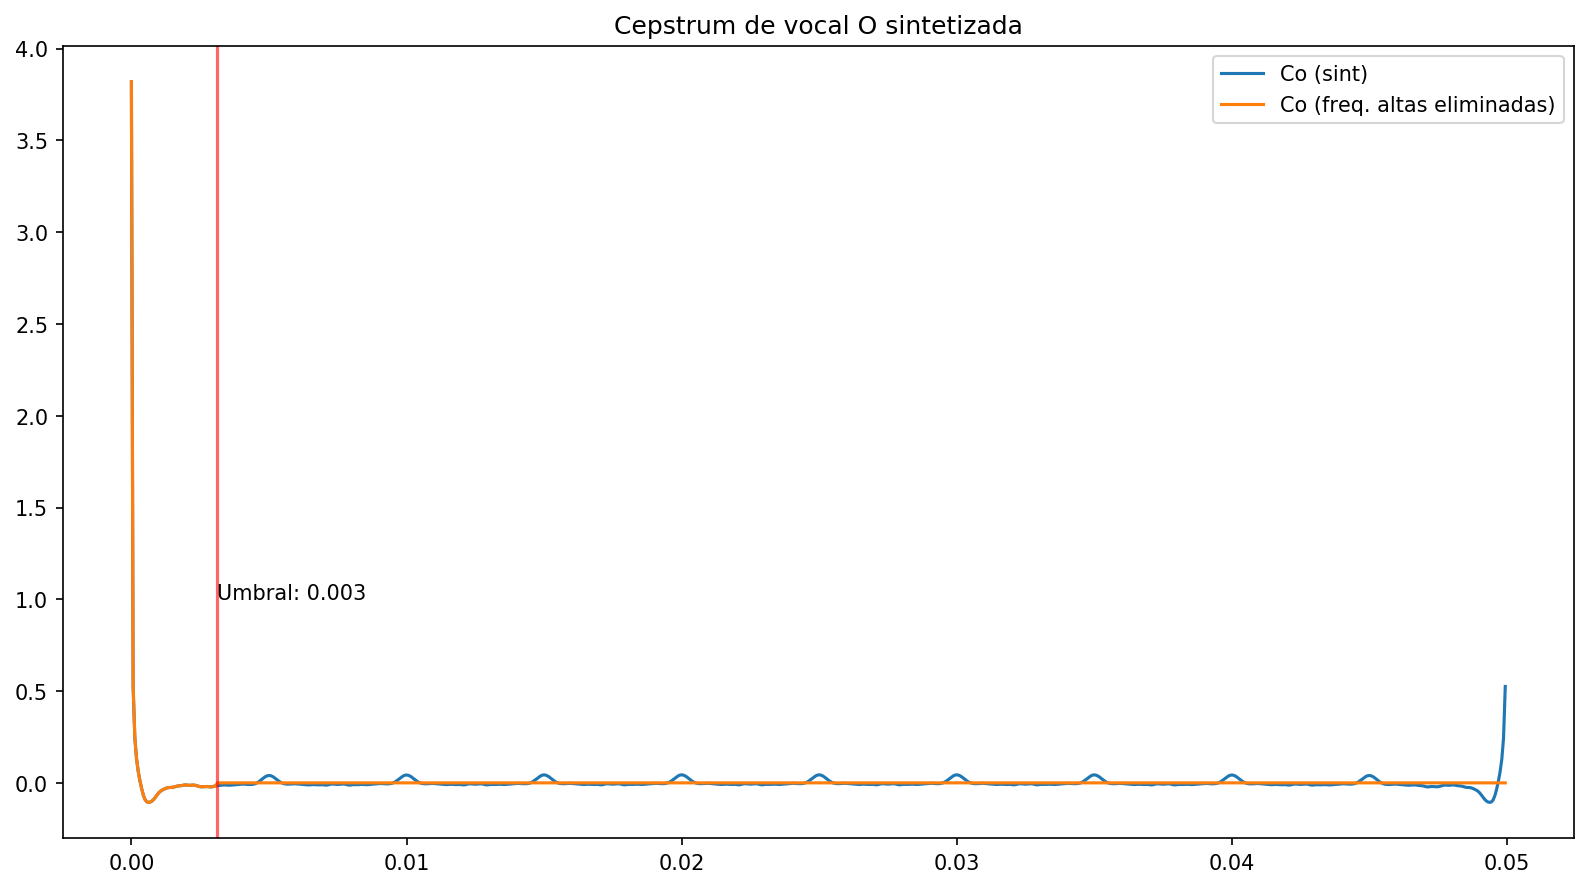

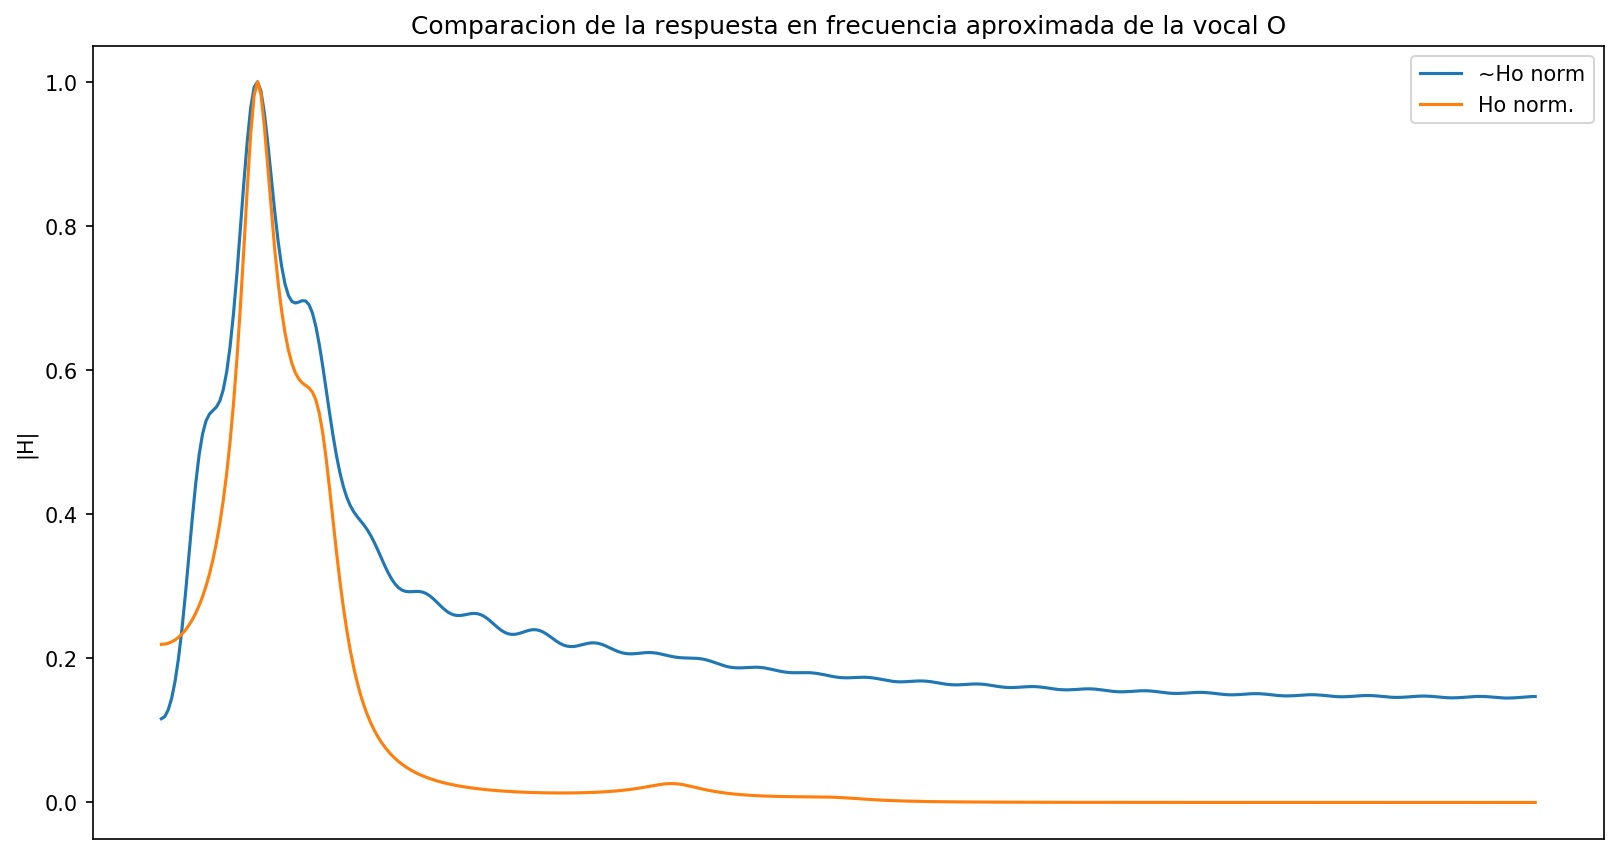

Ysint de 0 seg a 0.001875 seg


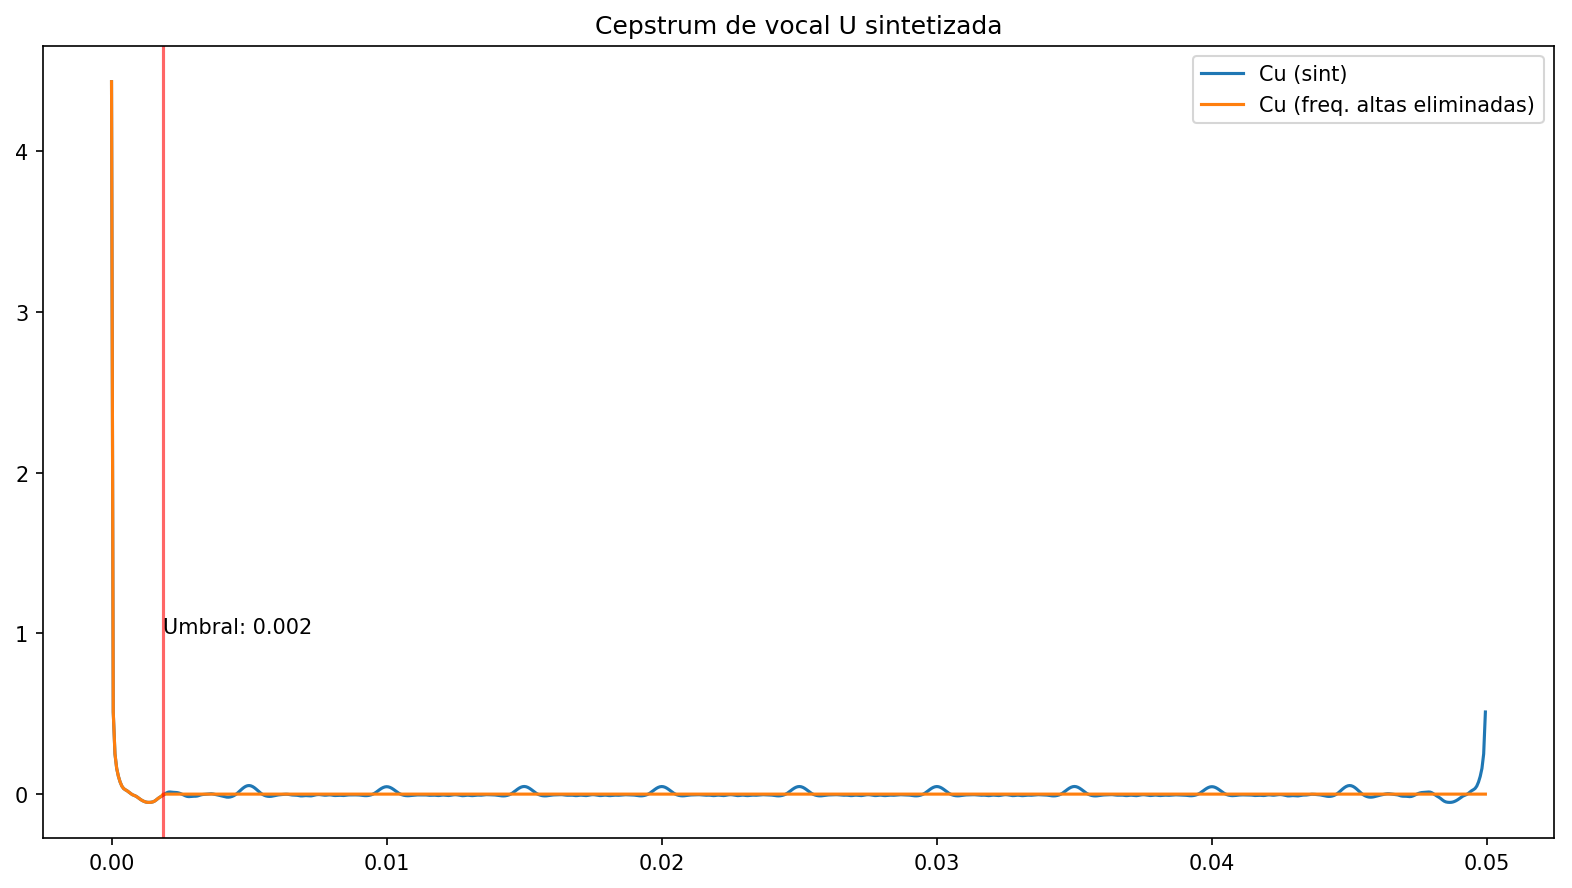

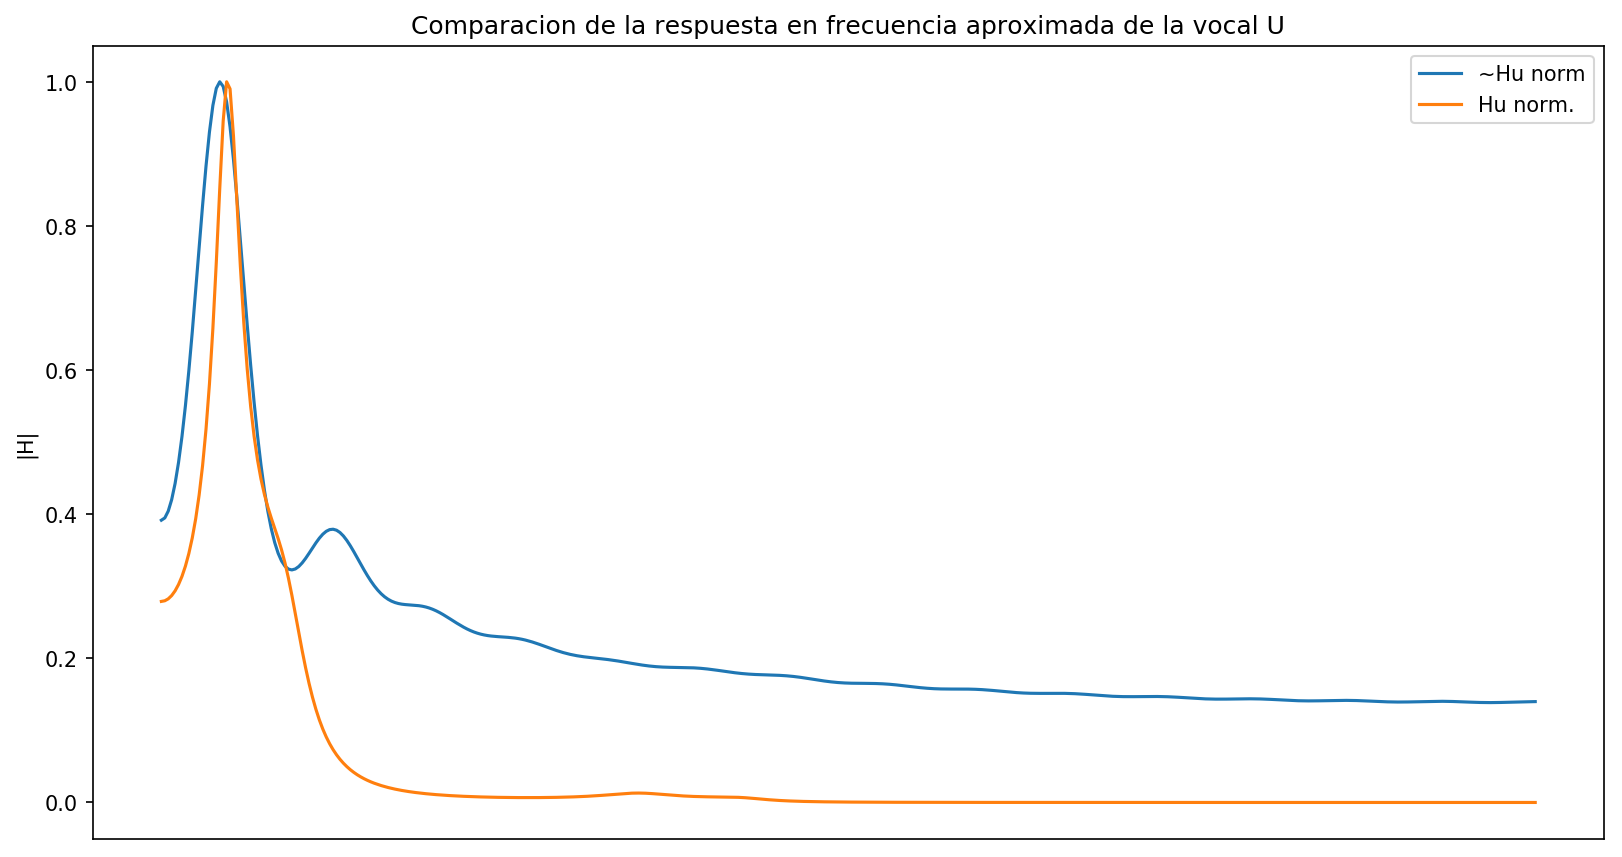

In [491]:
from tp.vocal import Cepstrum 

def aprox_resp_freq(vocal: str, umbral = 50):
    t, sint = VOCALS[vocal]['sint']
    Csint = Cepstrum.generate(sint)
    
    # Eliminar freciencias altas
    hsint = np.copy(Csint)
    print("Ysint de 0 seg a {} seg".format(t[umbral]))
    hsint[umbral:] = 0
    plt.title("Cepstrum de vocal {} sintetizada".format(vocal.upper()))
    plt.plot(t, np.real(Csint))
    plt.plot(t, np.real(hsint))
    plt.axvline(x=t[umbral], color="red", alpha=.6)
    plt.text(t[umbral], 1, "Umbral: {:.3f}".format(t[umbral]))
    plt.legend(["C{} (sint)".format(vocal), "C{} (freq. altas eliminadas)".format(vocal)])
    plt.show()
    
    plt.title("Comparacion de la respuesta en frecuencia aproximada de la vocal {}".format(vocal.upper()))
    Hlog_aprox = np.real(np.fft.rfft(hsint))
    H_aprox = np.exp(Hlog_aprox)
    plt.plot(H_aprox/max(H_aprox))
    
    H = np.copy(VOCALS[vocal]["Hc"])
    H_s = np.absolute(H[::int(len(H)/len(Hlog_aprox))])[:len(Hlog_aprox)]
    Hlog = np.log(H_s)
    plt.plot(H_s/max(H_s))
    
    plt.legend(["~H{} norm".format(vocal), "H{} norm.".format(vocal)])
    plt.ylabel("|H|")
    plt.xticks([])
    plt.show()

umbrales = {'a': 35, 'e': 40, 'i':60, 'o':50, 'u':30}
for vocal in VOCALS:
    aprox_resp_freq(vocal, umbrales[vocal])
    

### Frecuencia fundamental de cada vocal sintetizada

INFO: Vocal: A [With plots to analysis]


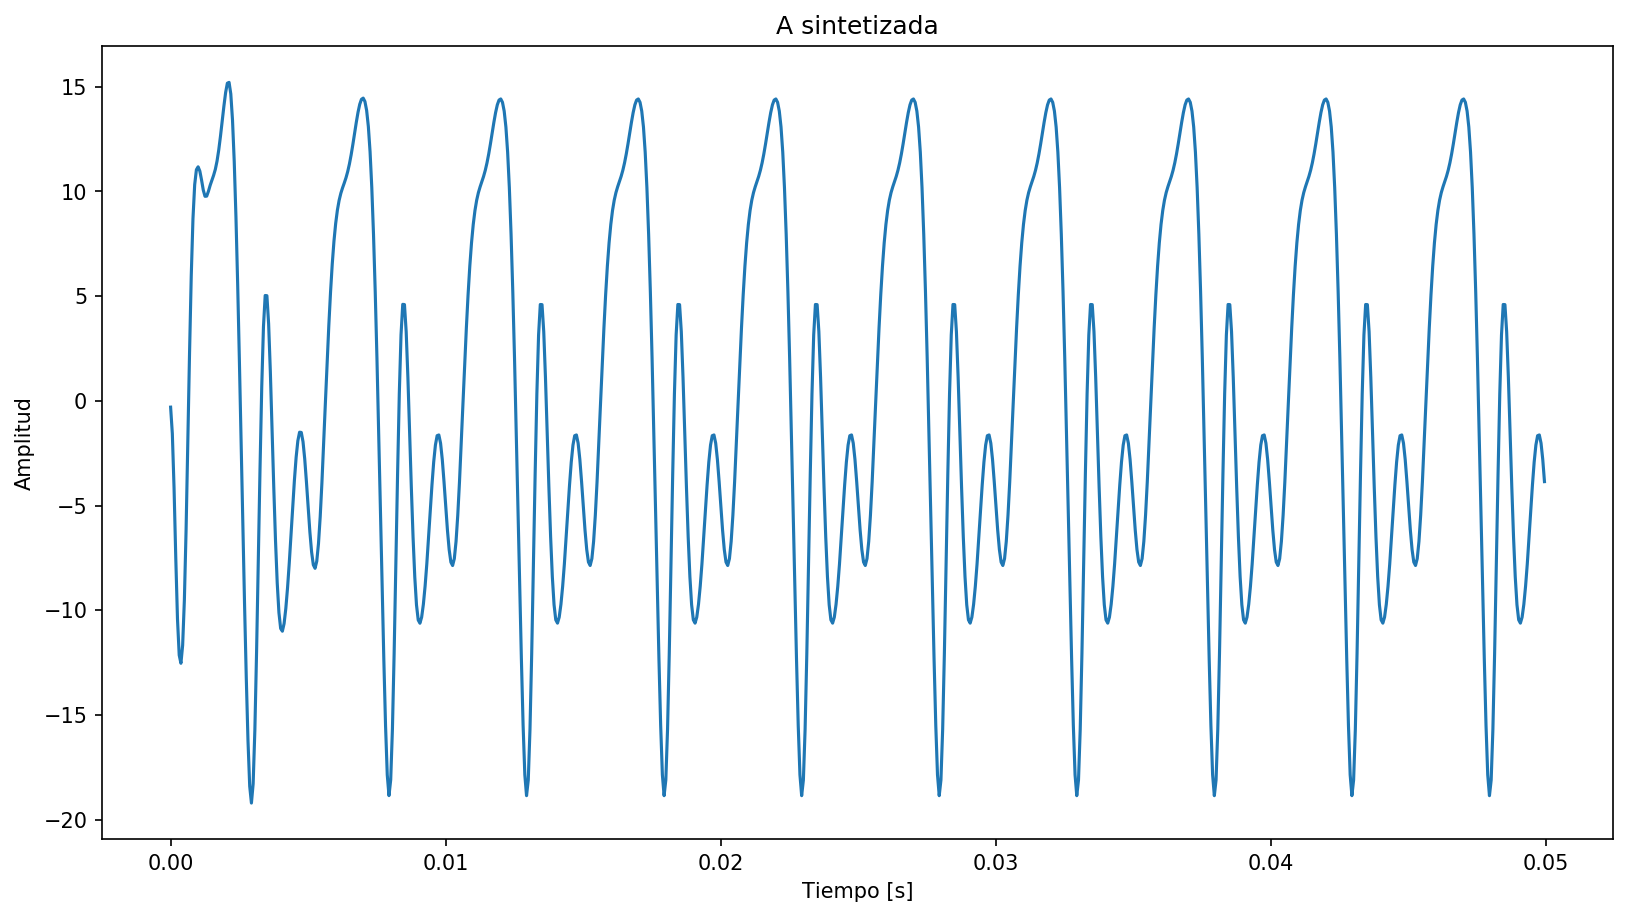

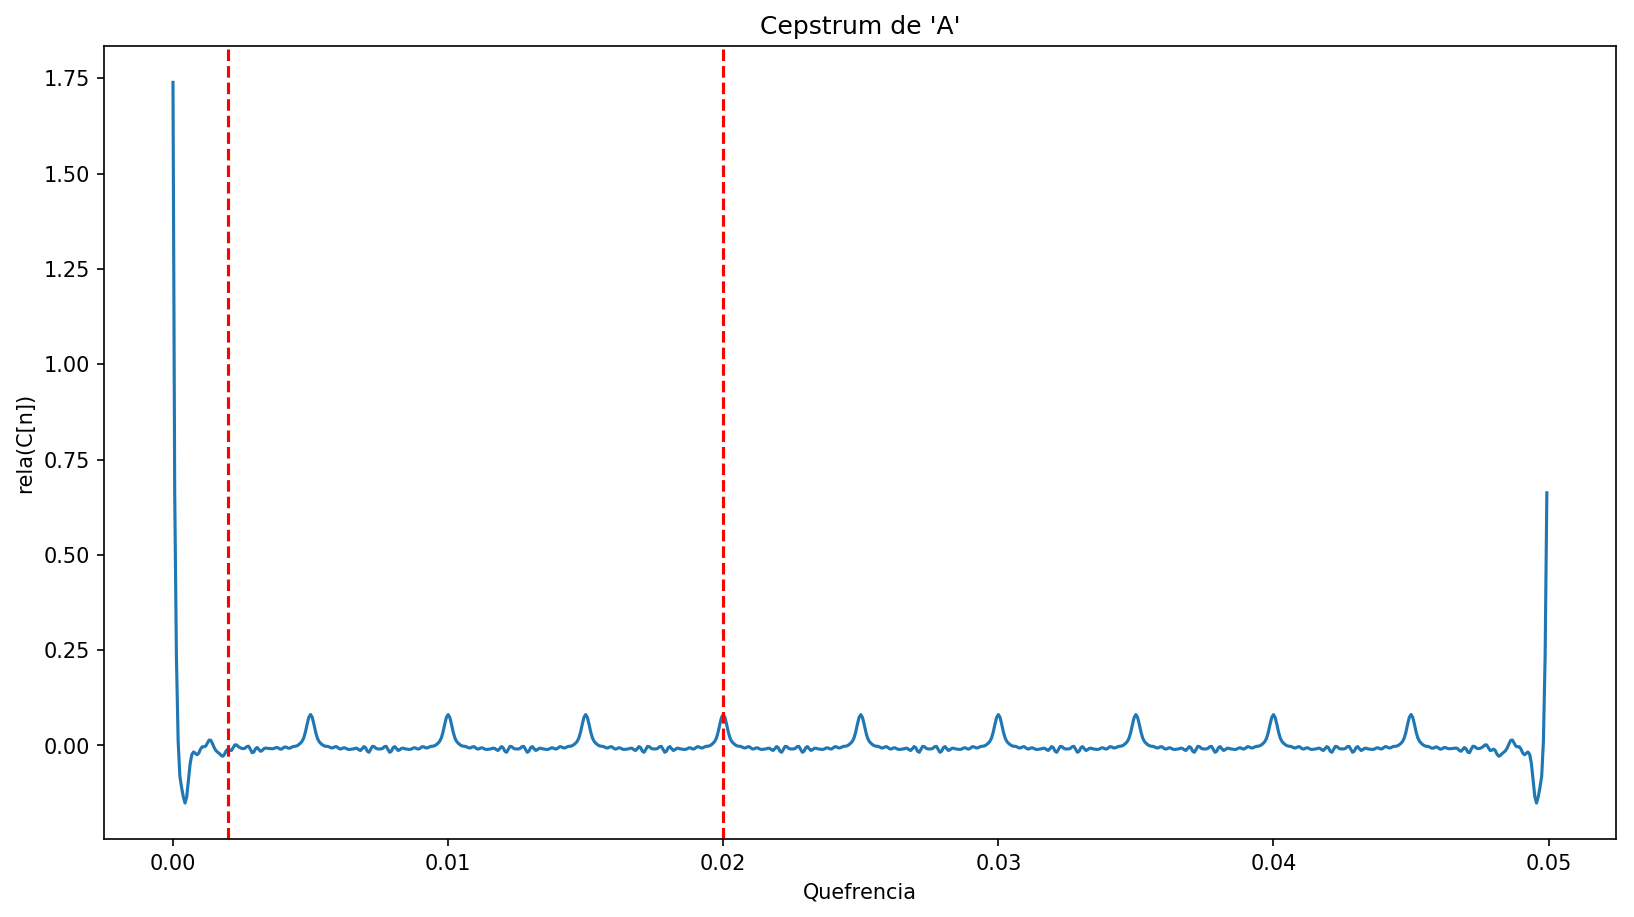

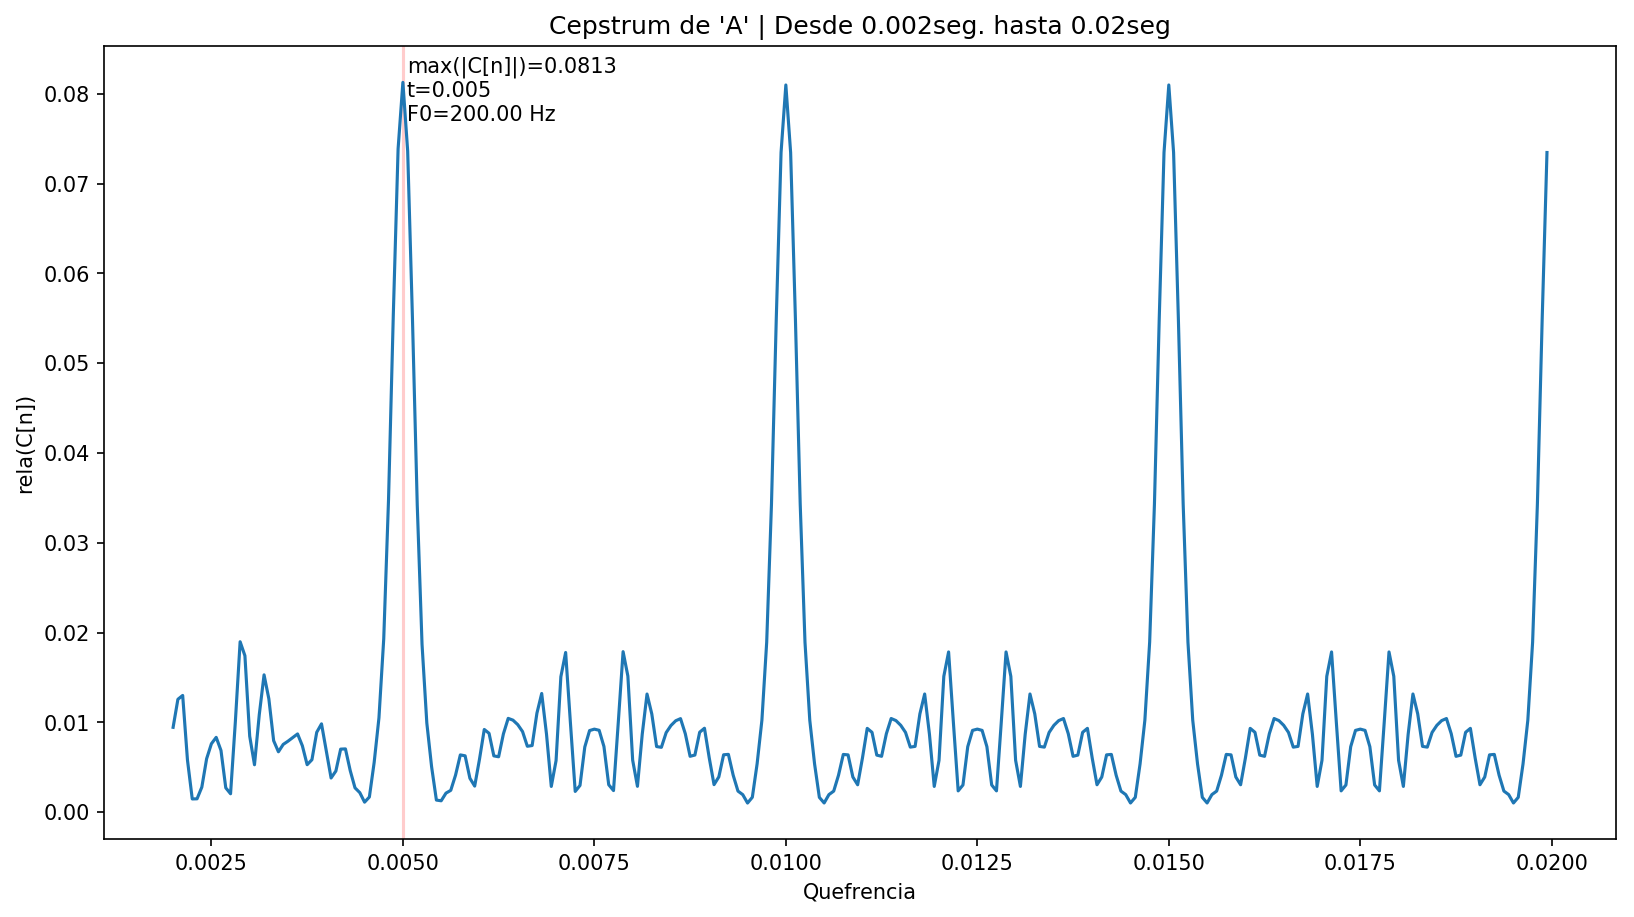

max(|C[n]|)=0.0813
t=0.005
F0=200.00 Hz
La frecuencia Fundamental de 'A' es 200.00

INFO: Vocal: E [With plots to analysis]


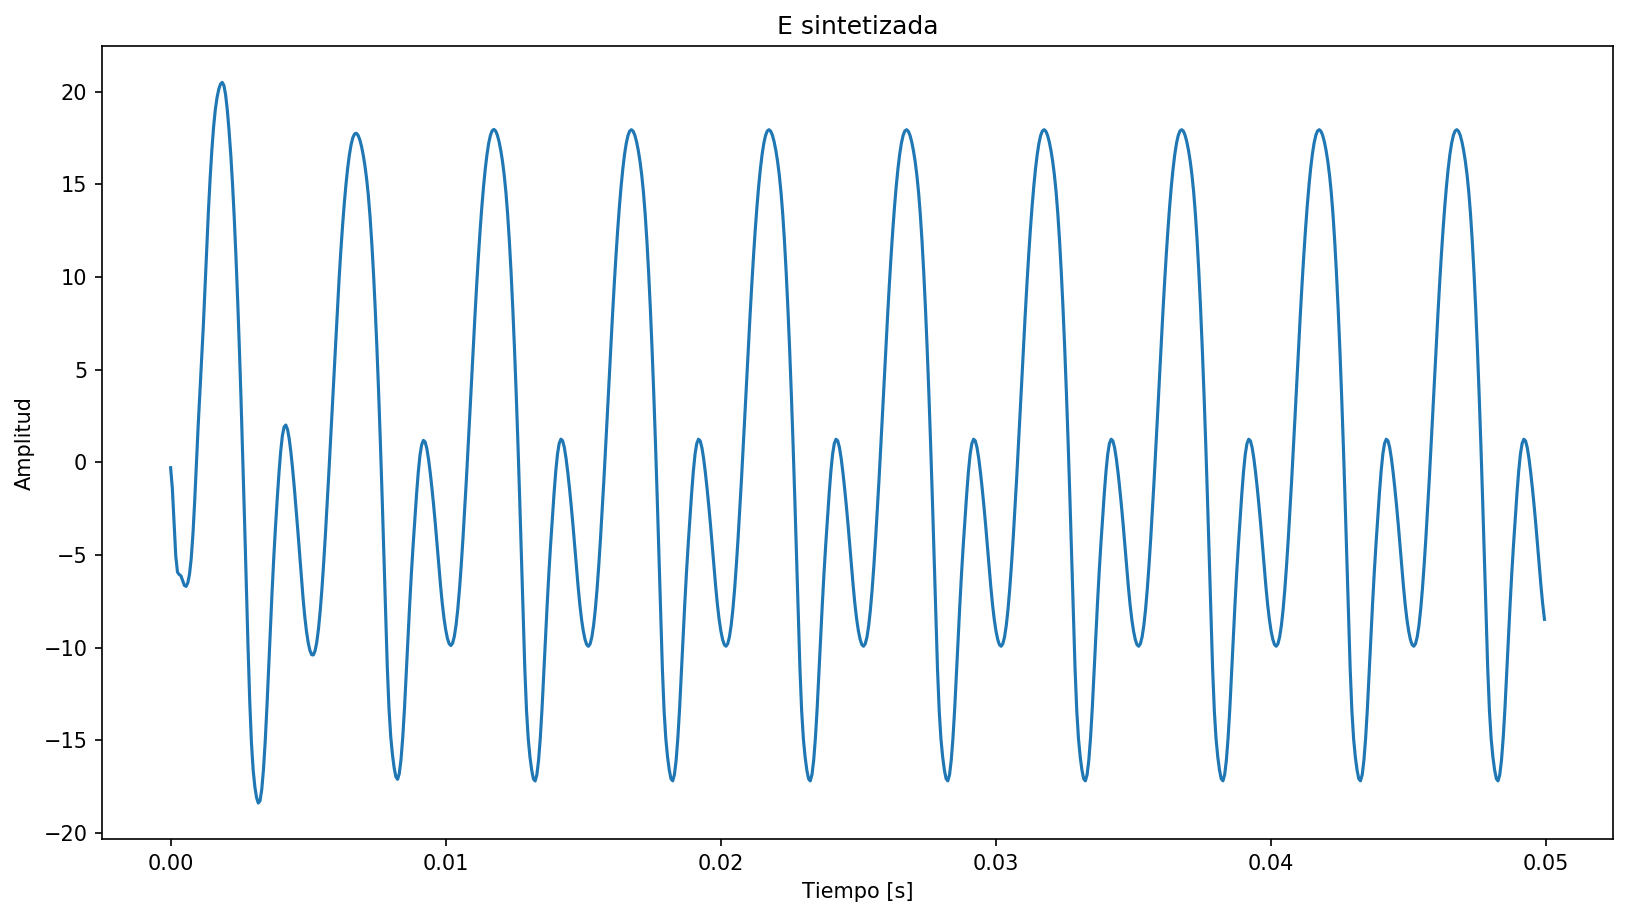

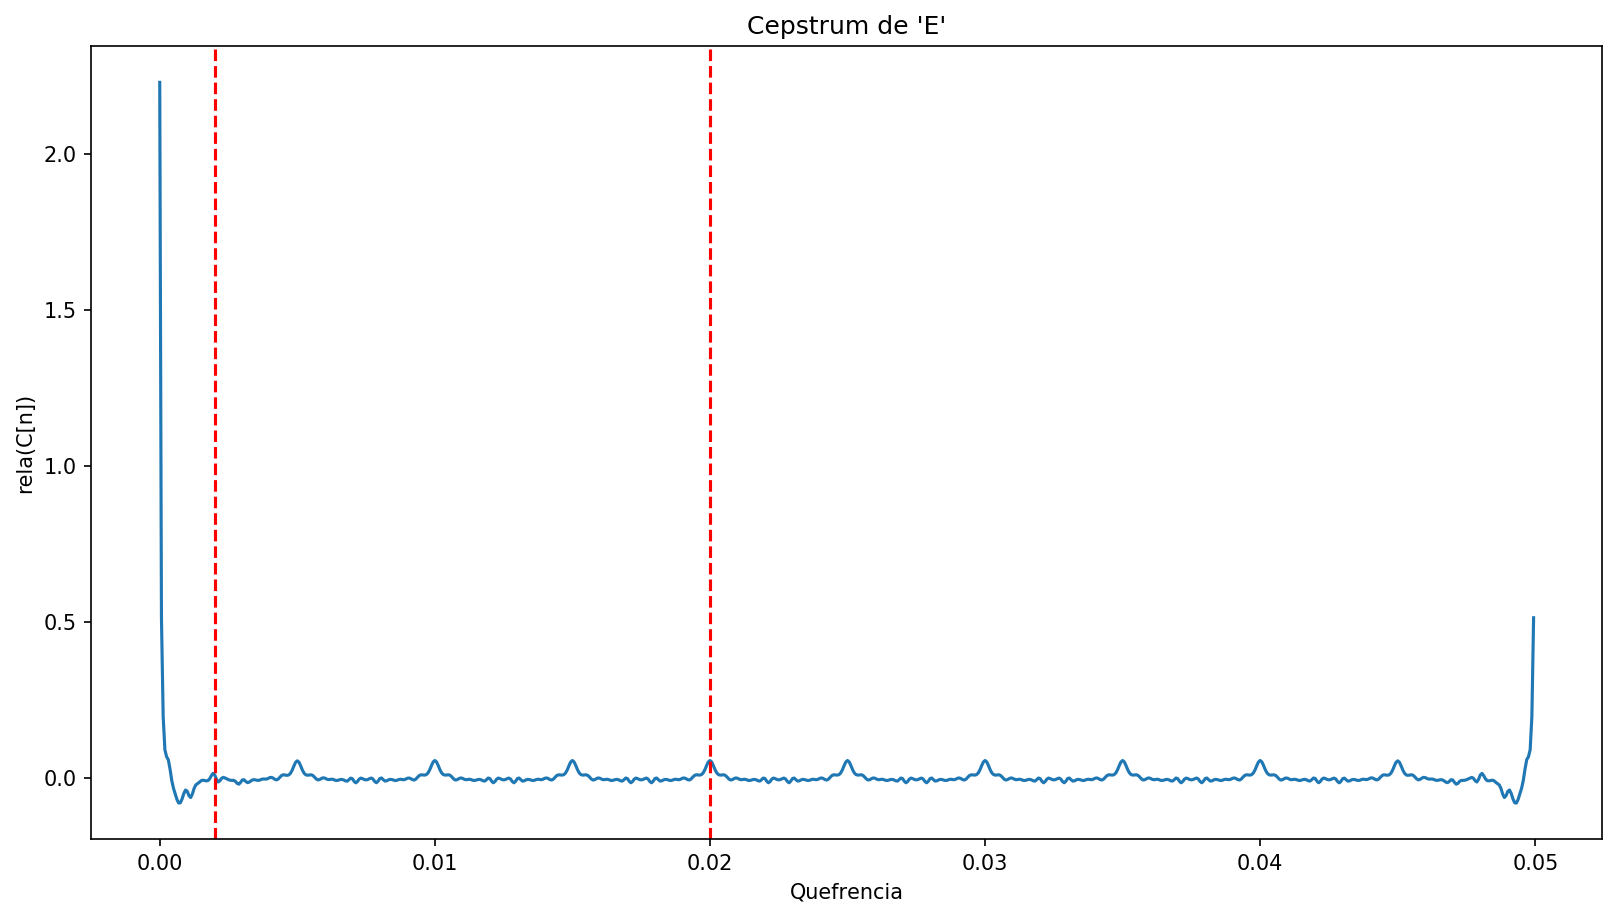

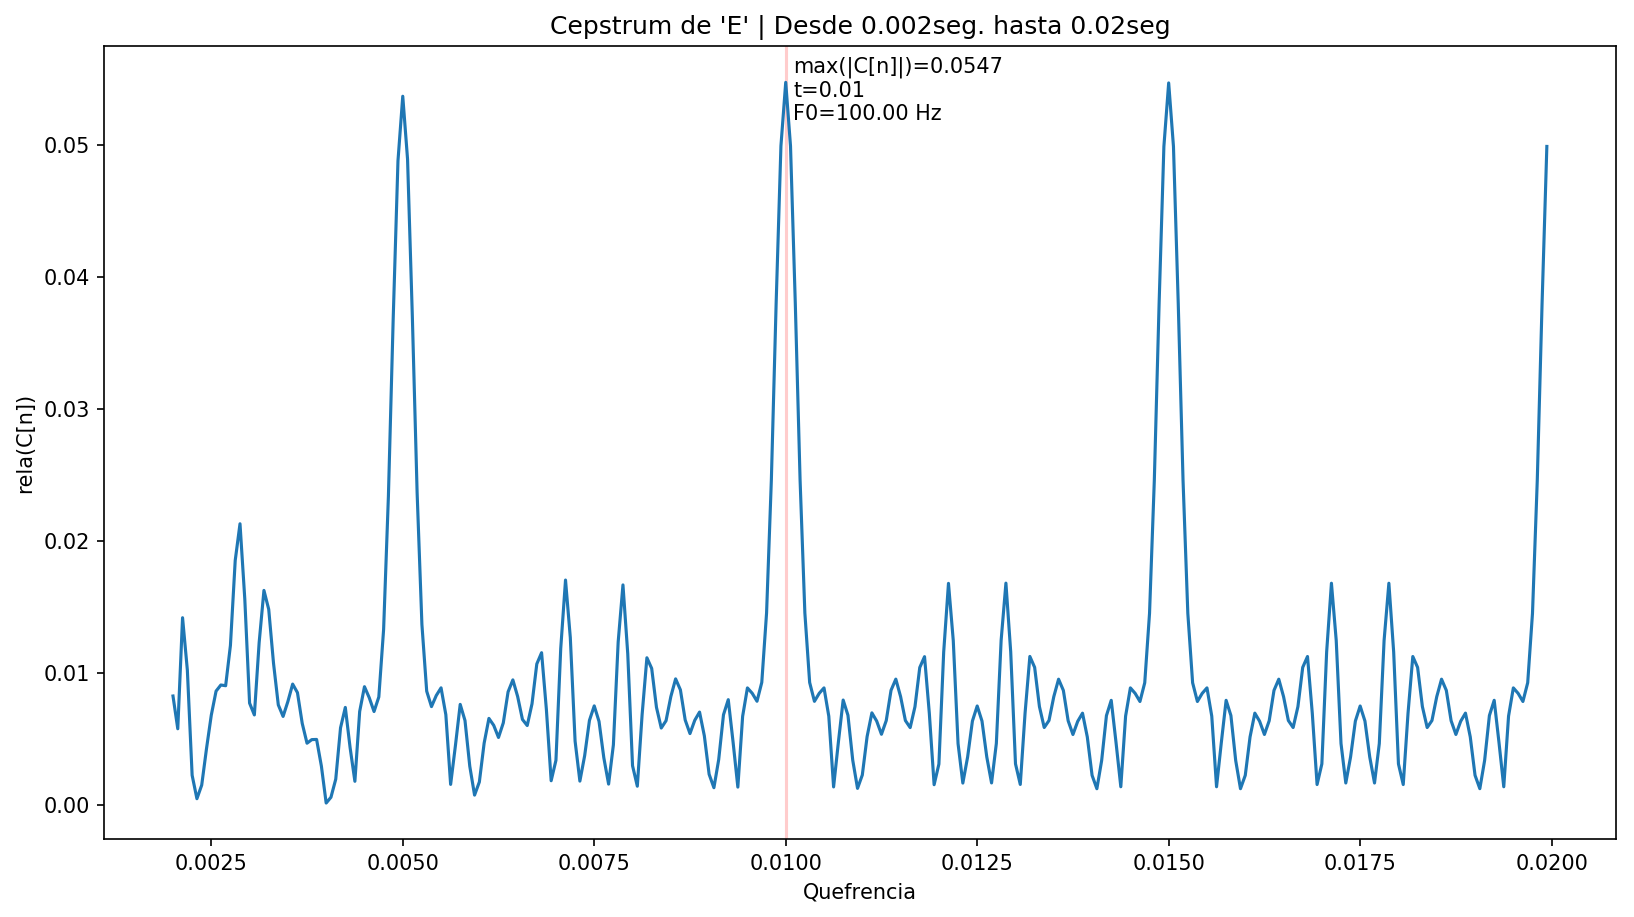

max(|C[n]|)=0.0547
t=0.01
F0=100.00 Hz
La frecuencia Fundamental de 'E' es 100.00

INFO: Vocal: I [With plots to analysis]


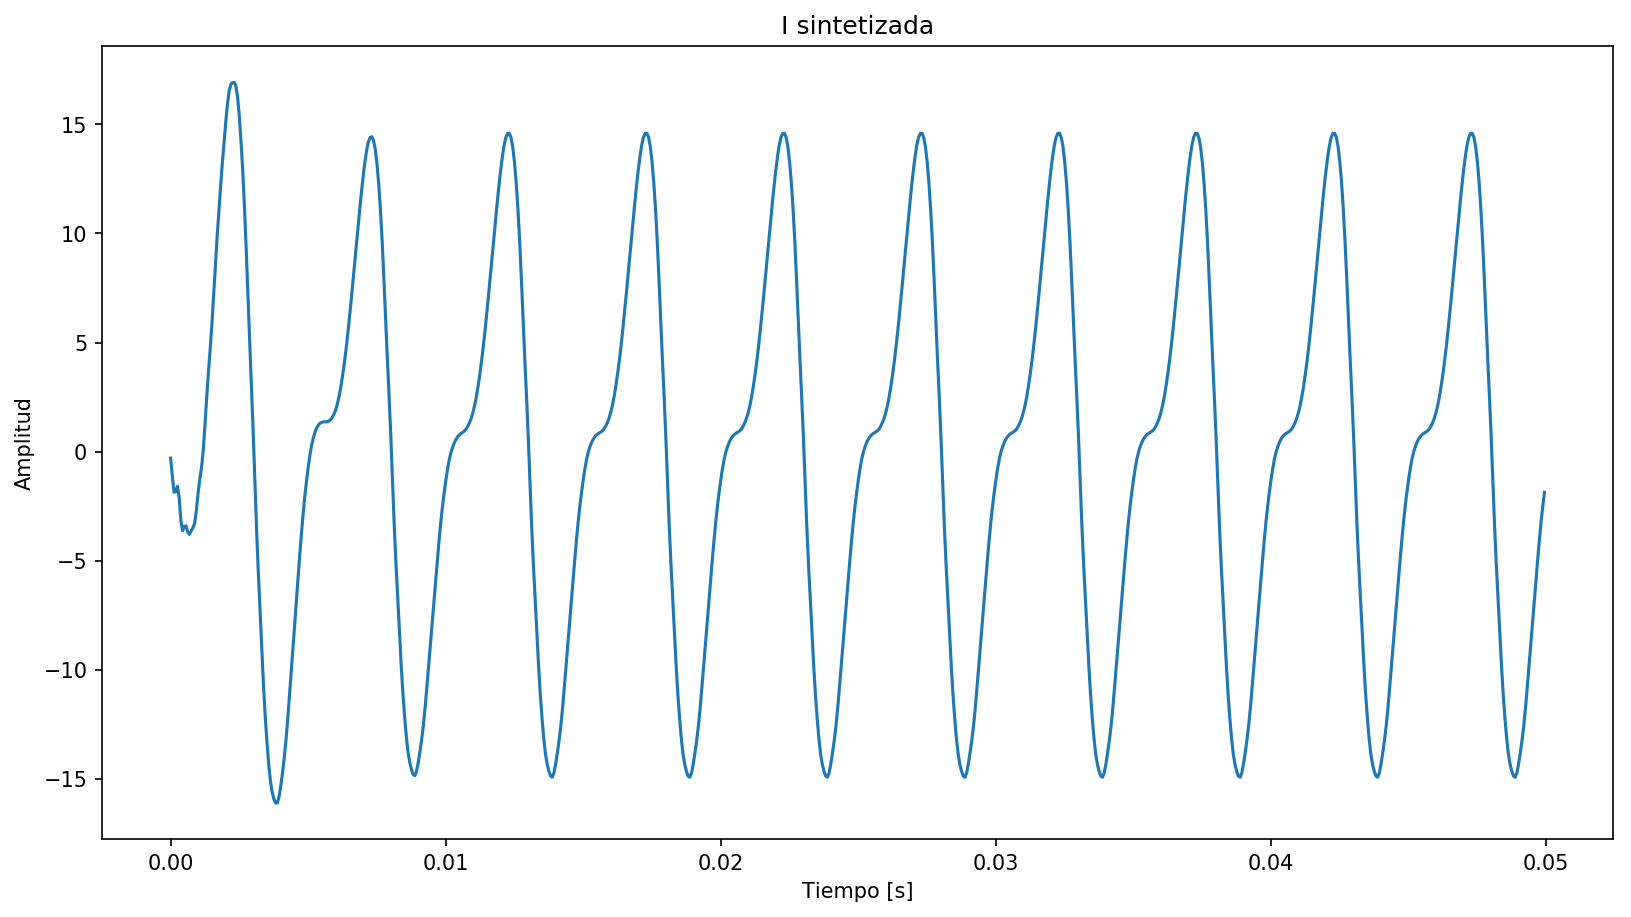

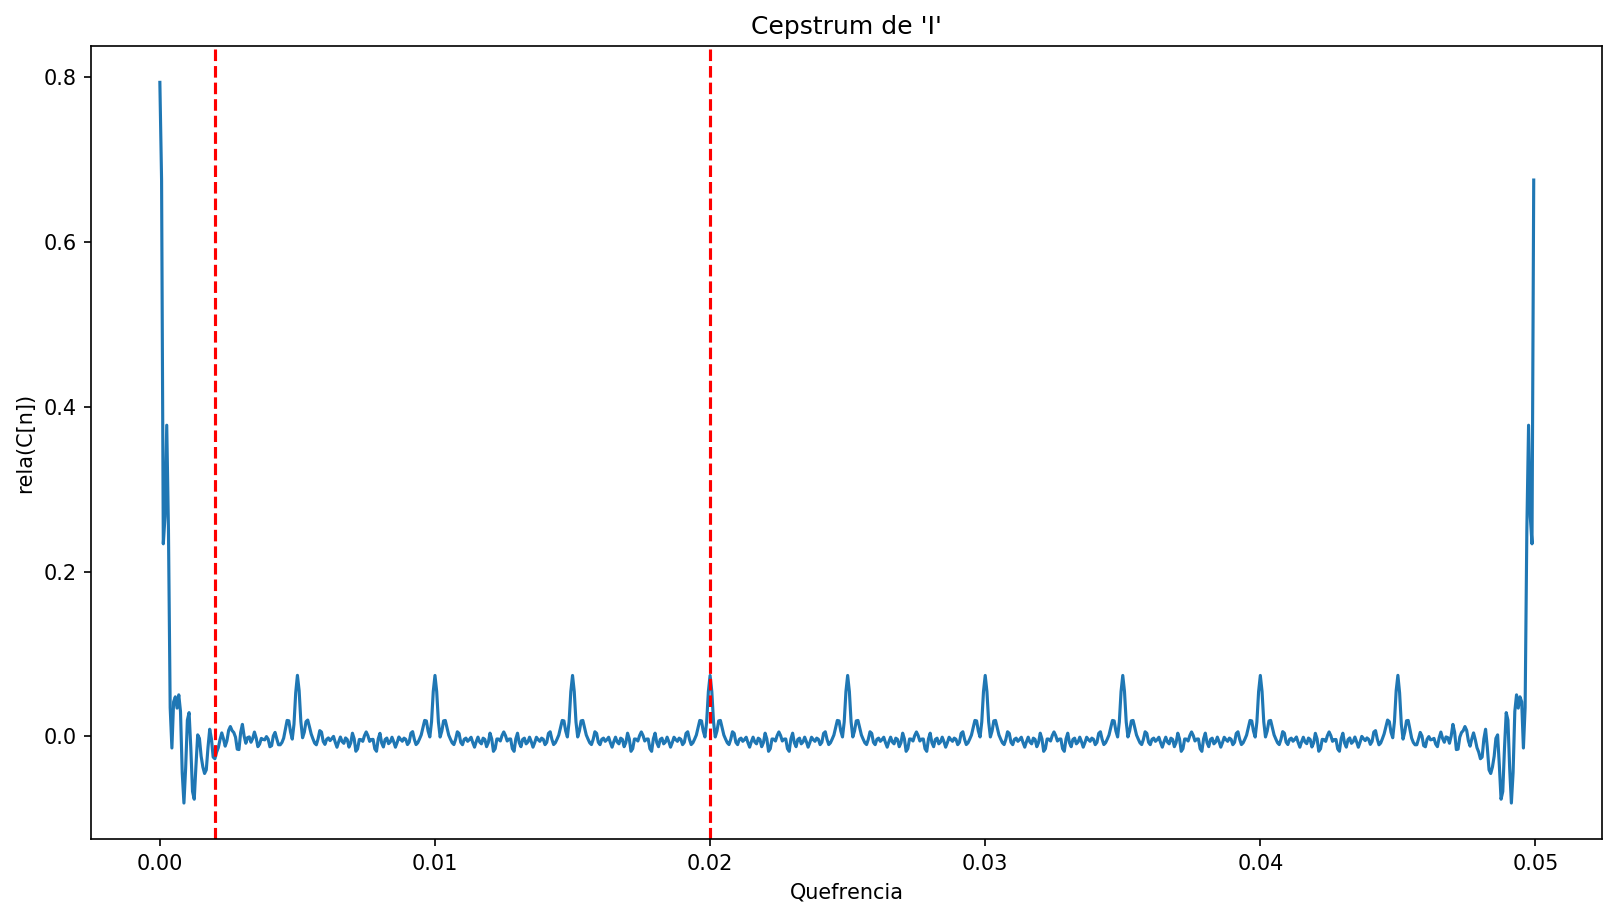

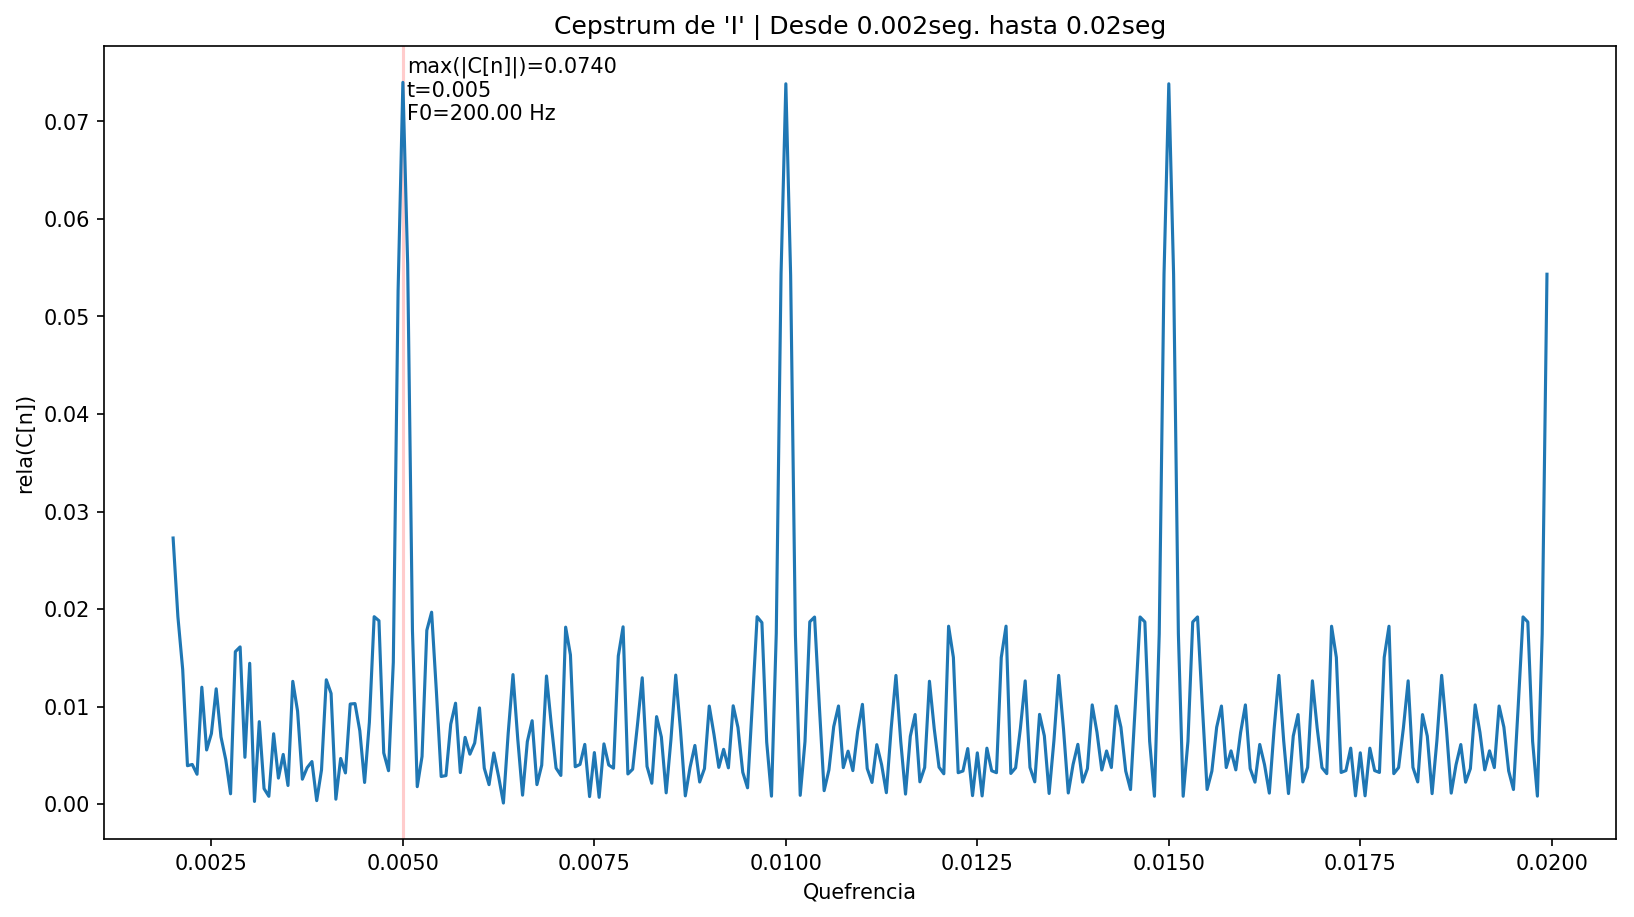

max(|C[n]|)=0.0740
t=0.005
F0=200.00 Hz
La frecuencia Fundamental de 'I' es 200.00

INFO: Vocal: O [With plots to analysis]


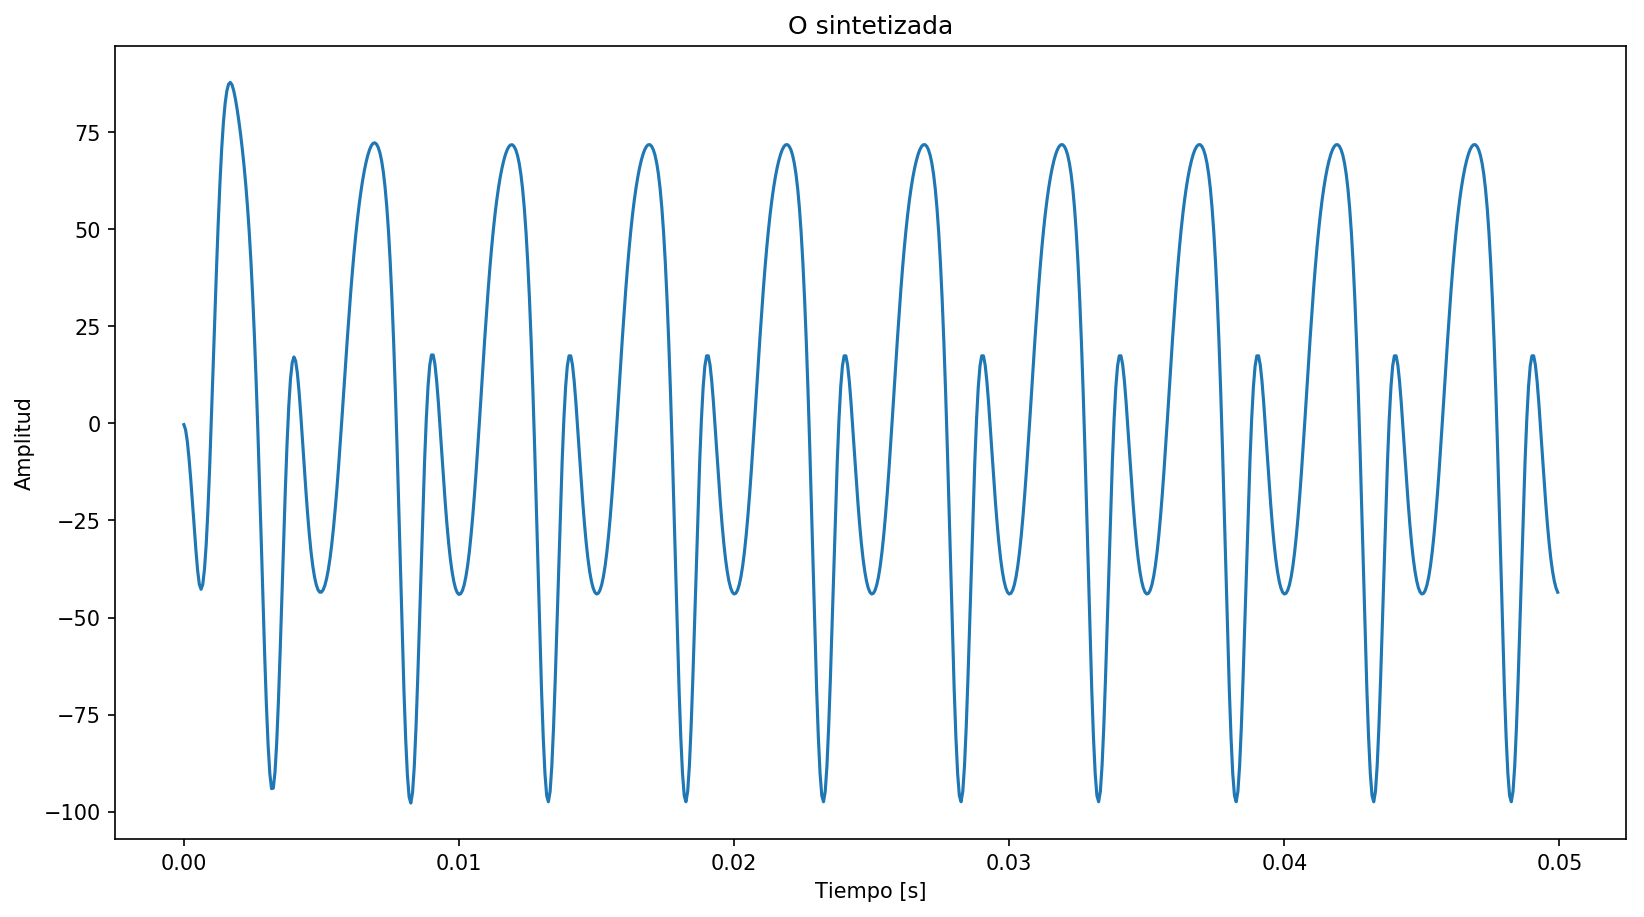

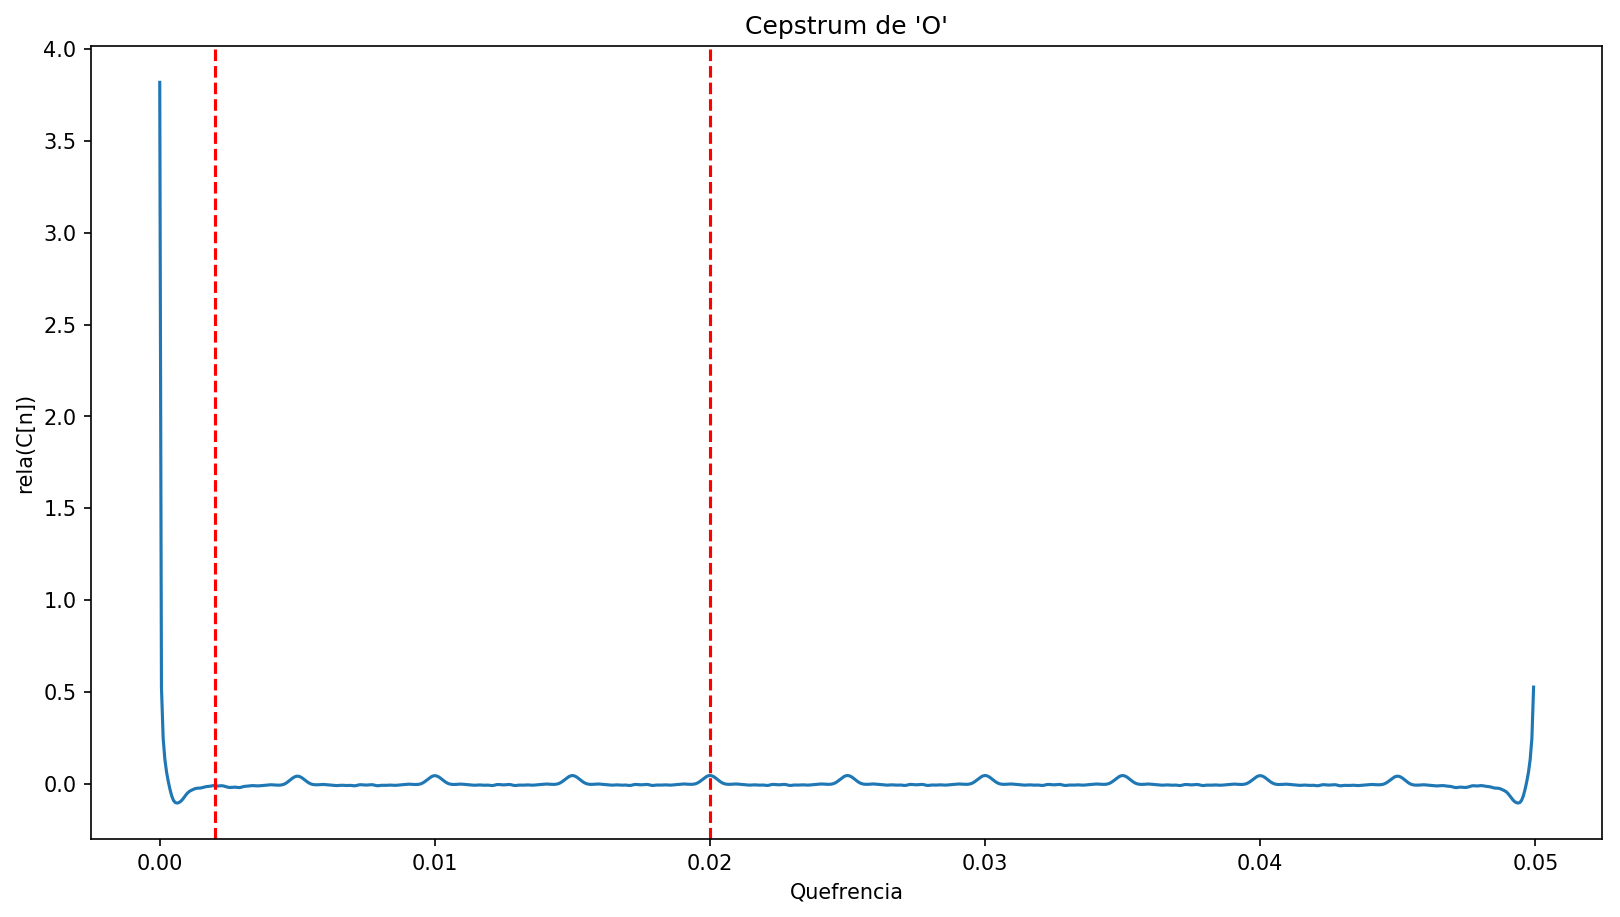

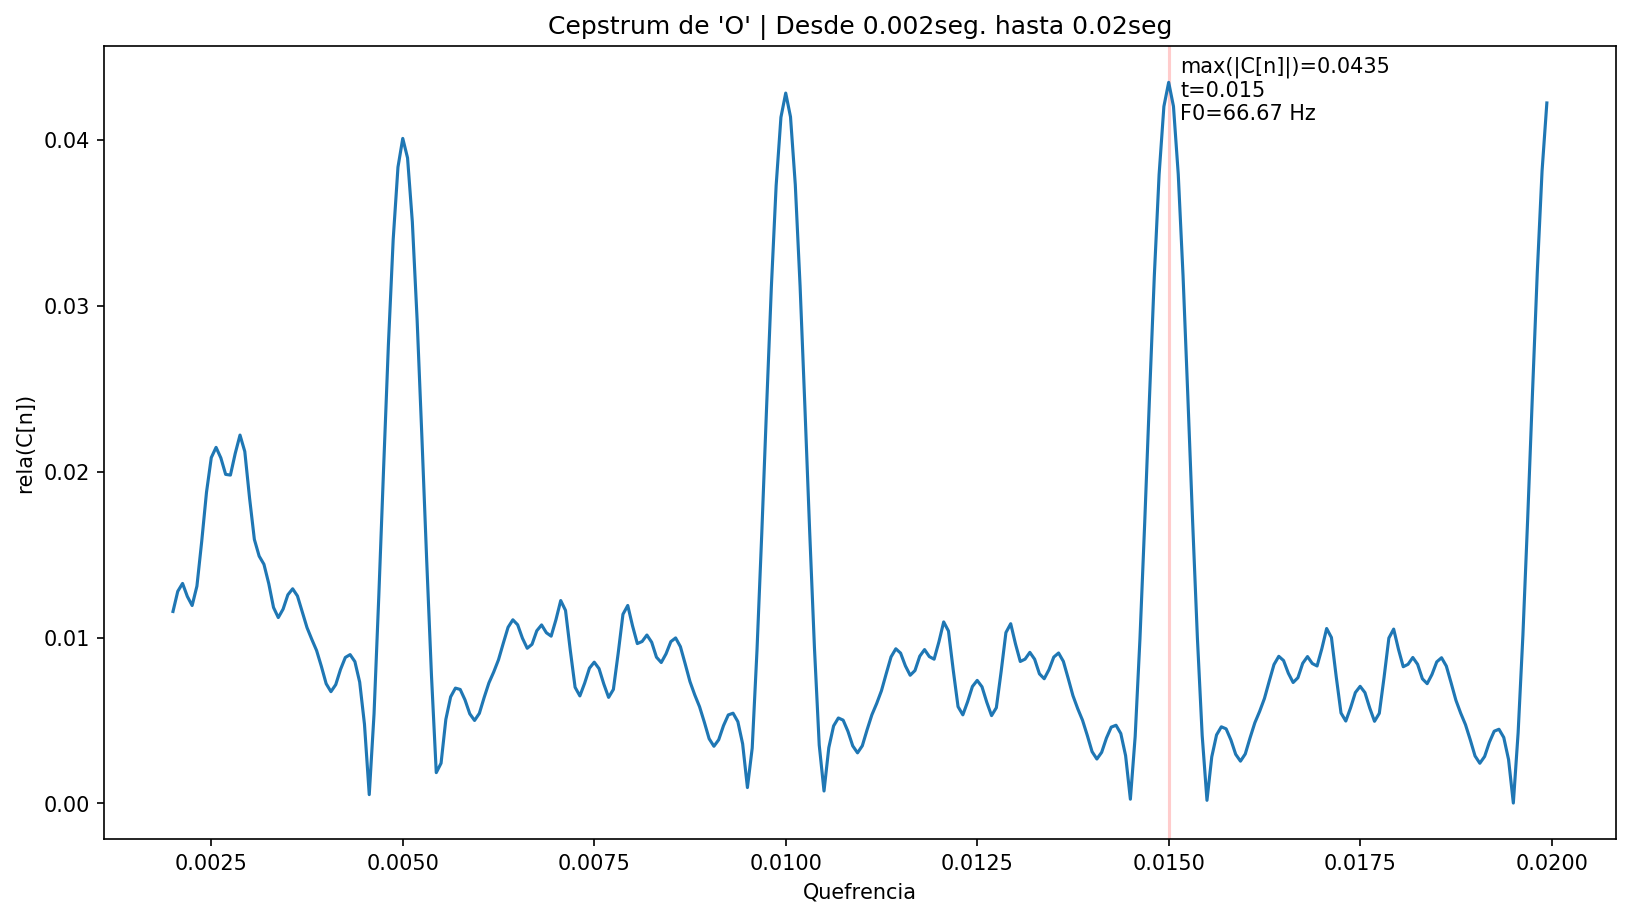

max(|C[n]|)=0.0435
t=0.015
F0=66.67 Hz
La frecuencia Fundamental de 'O' es 66.67

INFO: Vocal: U [With plots to analysis]


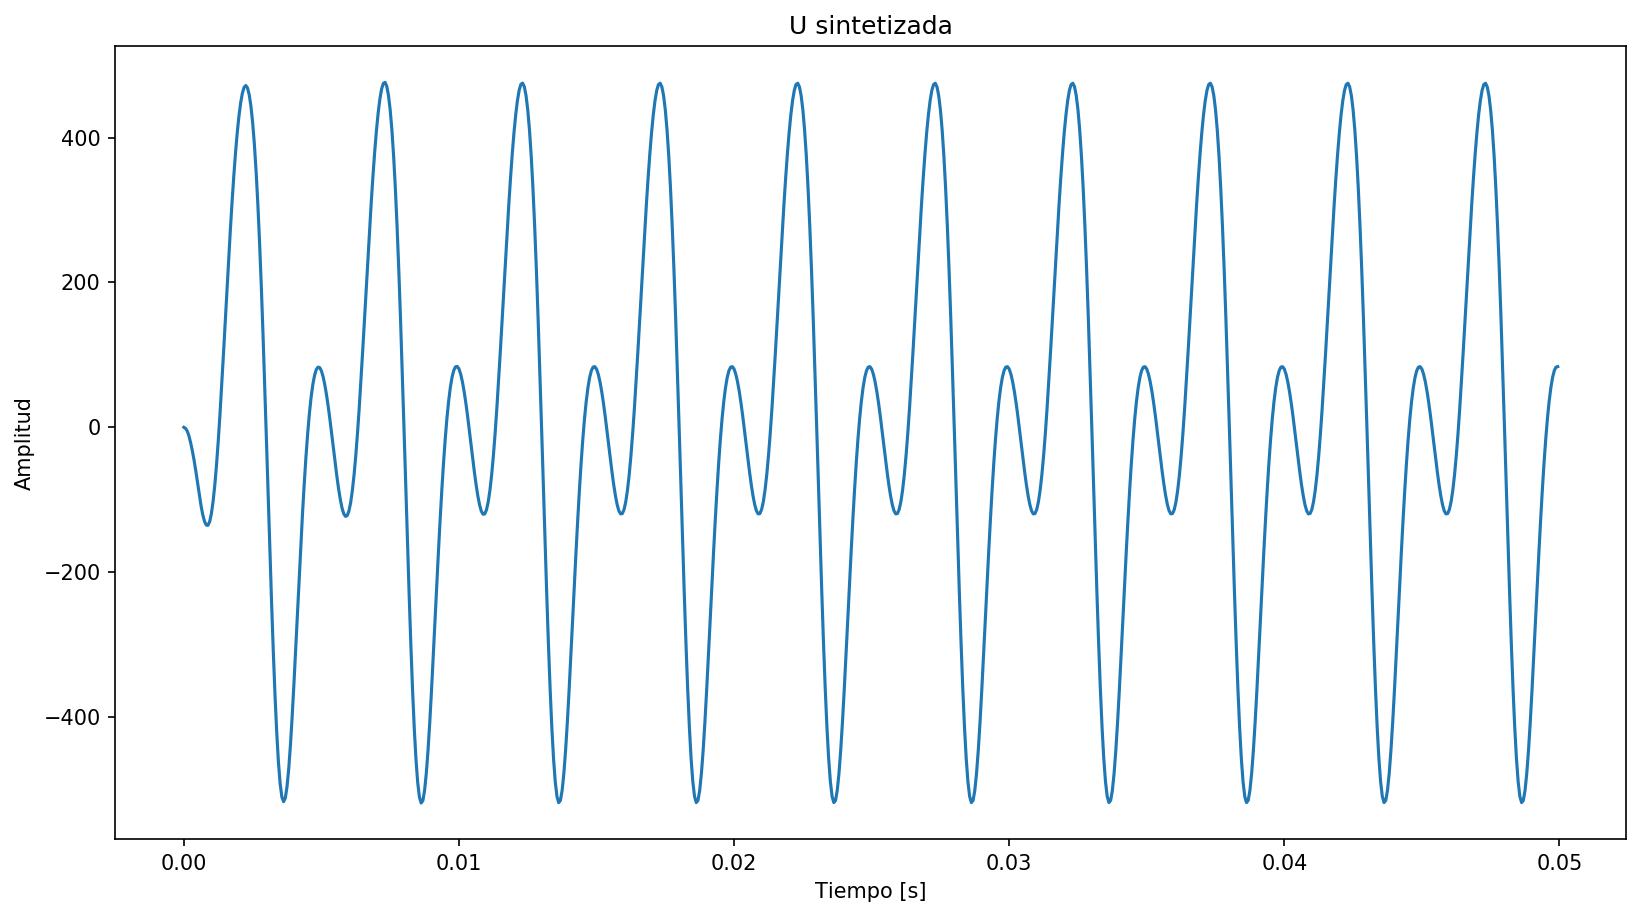

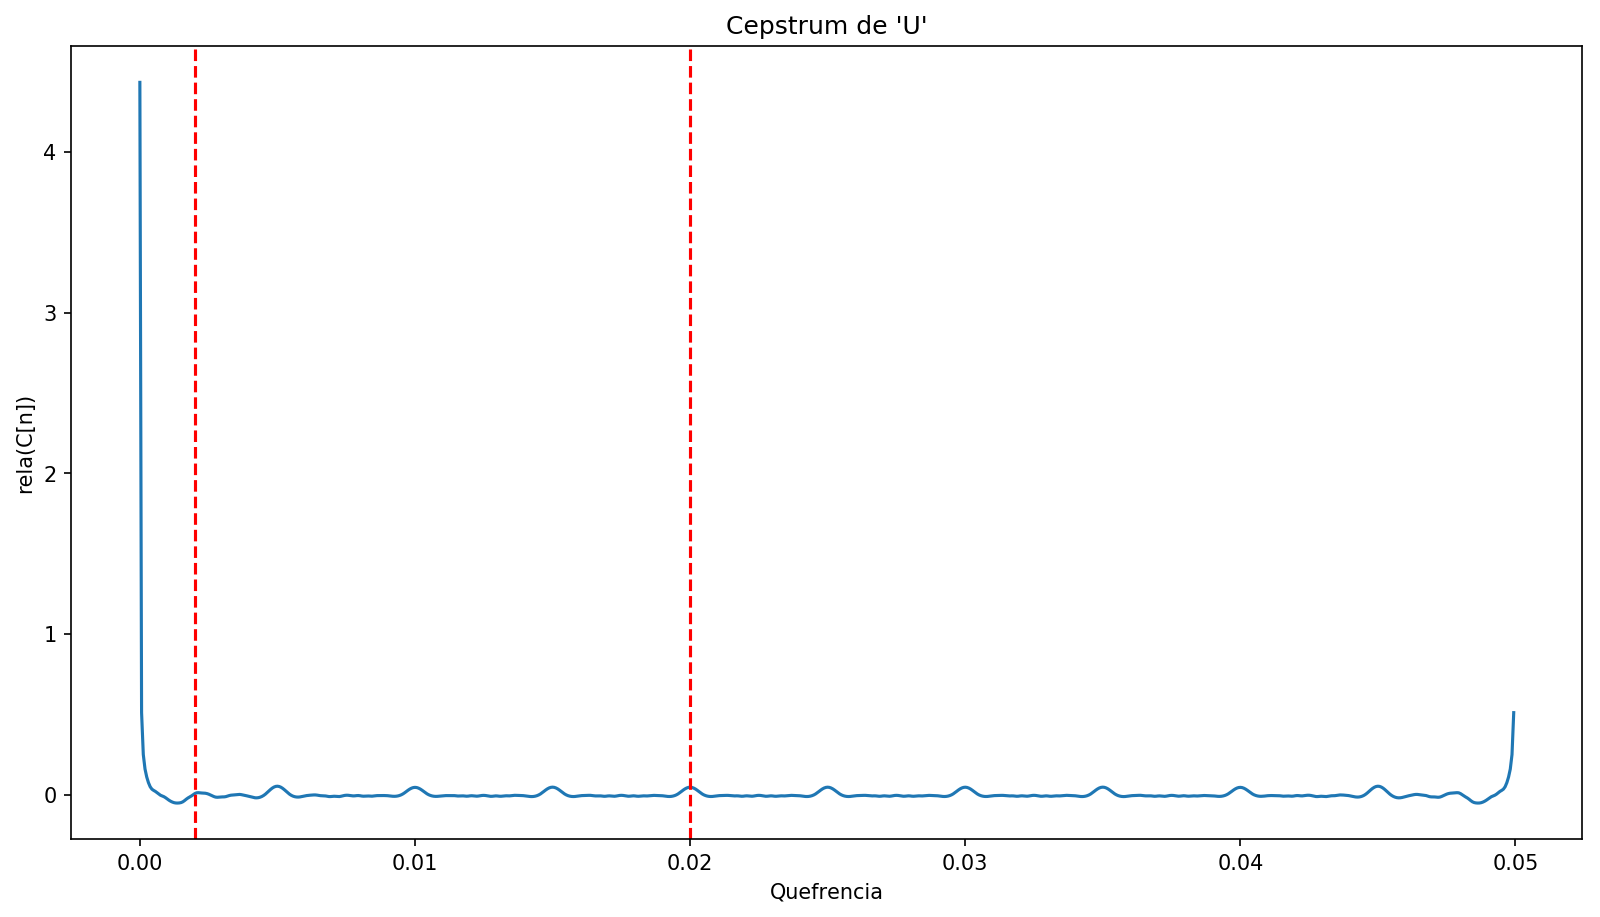

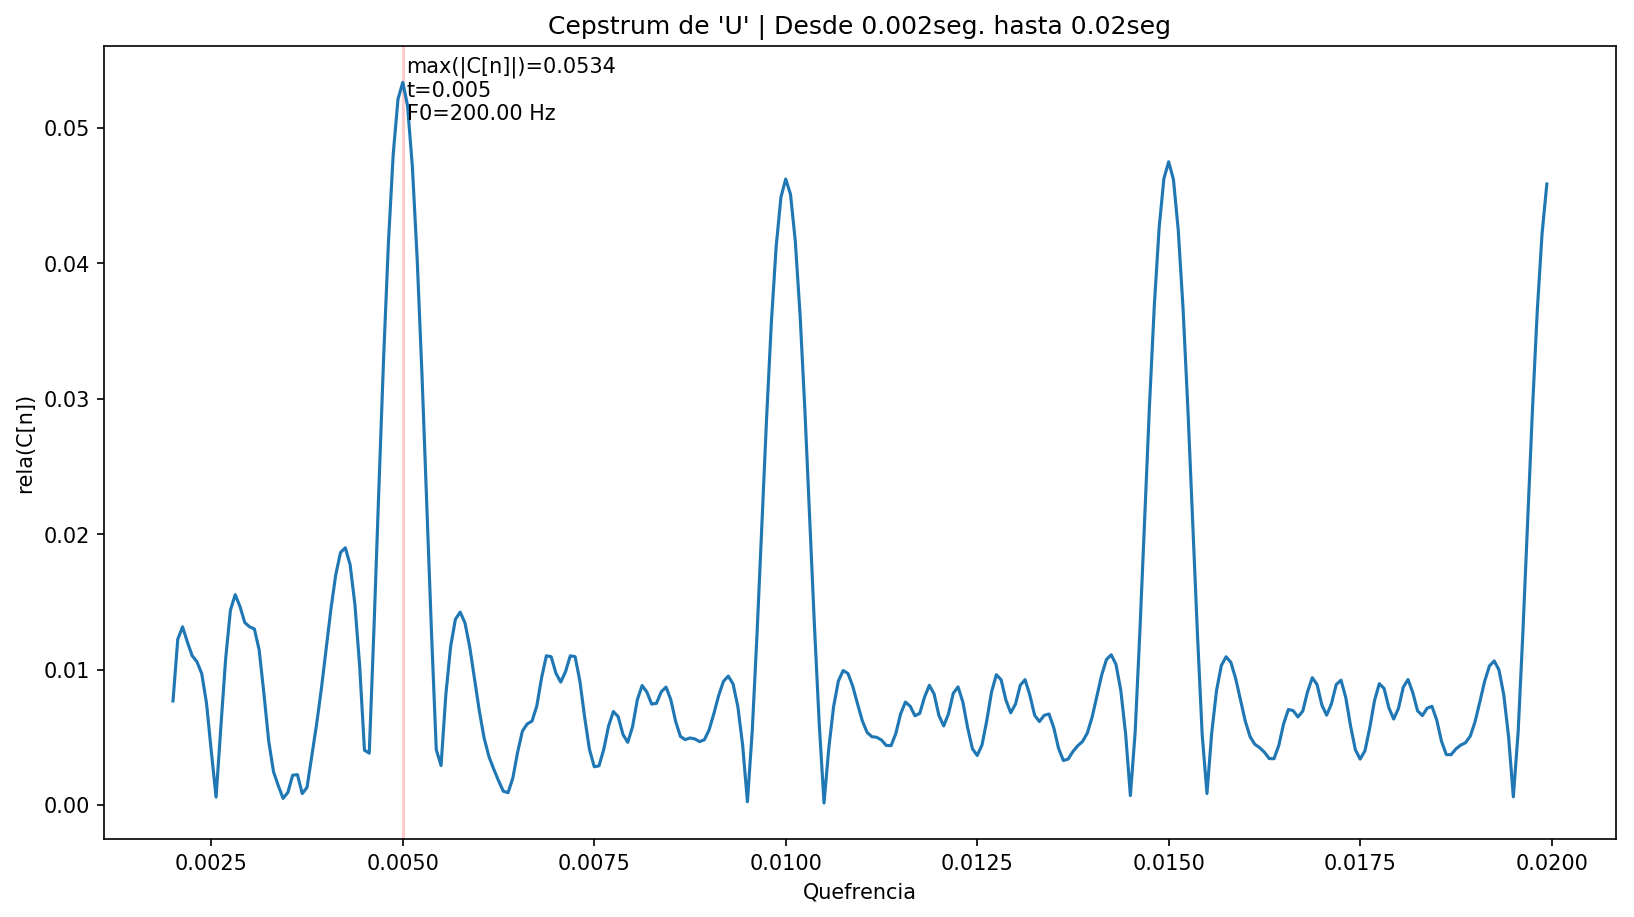

max(|C[n]|)=0.0534
t=0.005
F0=200.00 Hz
La frecuencia Fundamental de 'U' es 200.00



In [684]:
from tp.vocal import Cepstrum, Utils
import operator

def find_F0(vocal: str, **kwargs):
    plots = kwargs.get("plots", True)
    #t = T6_10
    print("INFO: Vocal: {} {}".format(vocal.upper(), "[NO PLOTS]" if not plots else "[With plots to analysis]"))
    t, sint = VOCALS[vocal]['sint']
    if plots:
        plt.plot(t, sint)
        plt.title("{} sintetizada".format(vocal.upper()))
        plt.xlabel("Tiempo [s]")
        plt.ylabel("Amplitud")
        plt.show()
    
    C = np.real(Cepstrum.generate(sint))
    ti, tf = Utils.index_time(t, 1/500, 1/50)
    
    if plots:
        plt.plot(t, C)
        plt.title("Cepstrum de '{}'".format(vocal.upper()))
        plt.xlabel("Quefrencia")
        plt.ylabel("rela(C[n])")
        plt.axvline(x=t[ti], color="red", linestyle = "dashed")
        plt.axvline(x=t[tf], color="red", linestyle = "dashed")
        plt.show()
    
    
    subT, subC = t[ti:tf], np.absolute(C[ti:tf])
    index, value = max(enumerate(subC), key=lambda t: t[1])
    F0 = 1/subT[index]
    text = "max(|C[n]|)={:.4f}\nt={}\nF0={:.2f} Hz".format(value, subT[index], F0)
    if plots:
        plt.title("Cepstrum de '{}' | Desde {}seg. hasta {}seg".format(vocal.upper(), t[ti], t[tf]))
        plt.text(subT[index]*1.01, value*0.95, text)
        plt.axvline(x=subT[index], color="red", alpha=0.2)
        plt.plot(subT, subC)
        plt.xlabel("Quefrencia")
        plt.ylabel("rela(C[n])")
        plt.show()
        
    print(text)
    return F0
    
EX9_VOCALS_TO_ANALISYS = "aeiou"
for vocal in VOCALS:
    f0 = find_F0(vocal, plots = vocal in EX9_VOCALS_TO_ANALISYS)
    print("La frecuencia Fundamental de '{}' es {:.2f}\n".format(vocal.upper(), f0))

## 10) Utilizando nuevamente la transformada cepstrum, estime el contorno de la frecuencia fundamental de la voz en el archivo hh15.wav. Grafique en forma sincrónica con la onda.

Tamaño de ventana de tiempo: 0.050000s


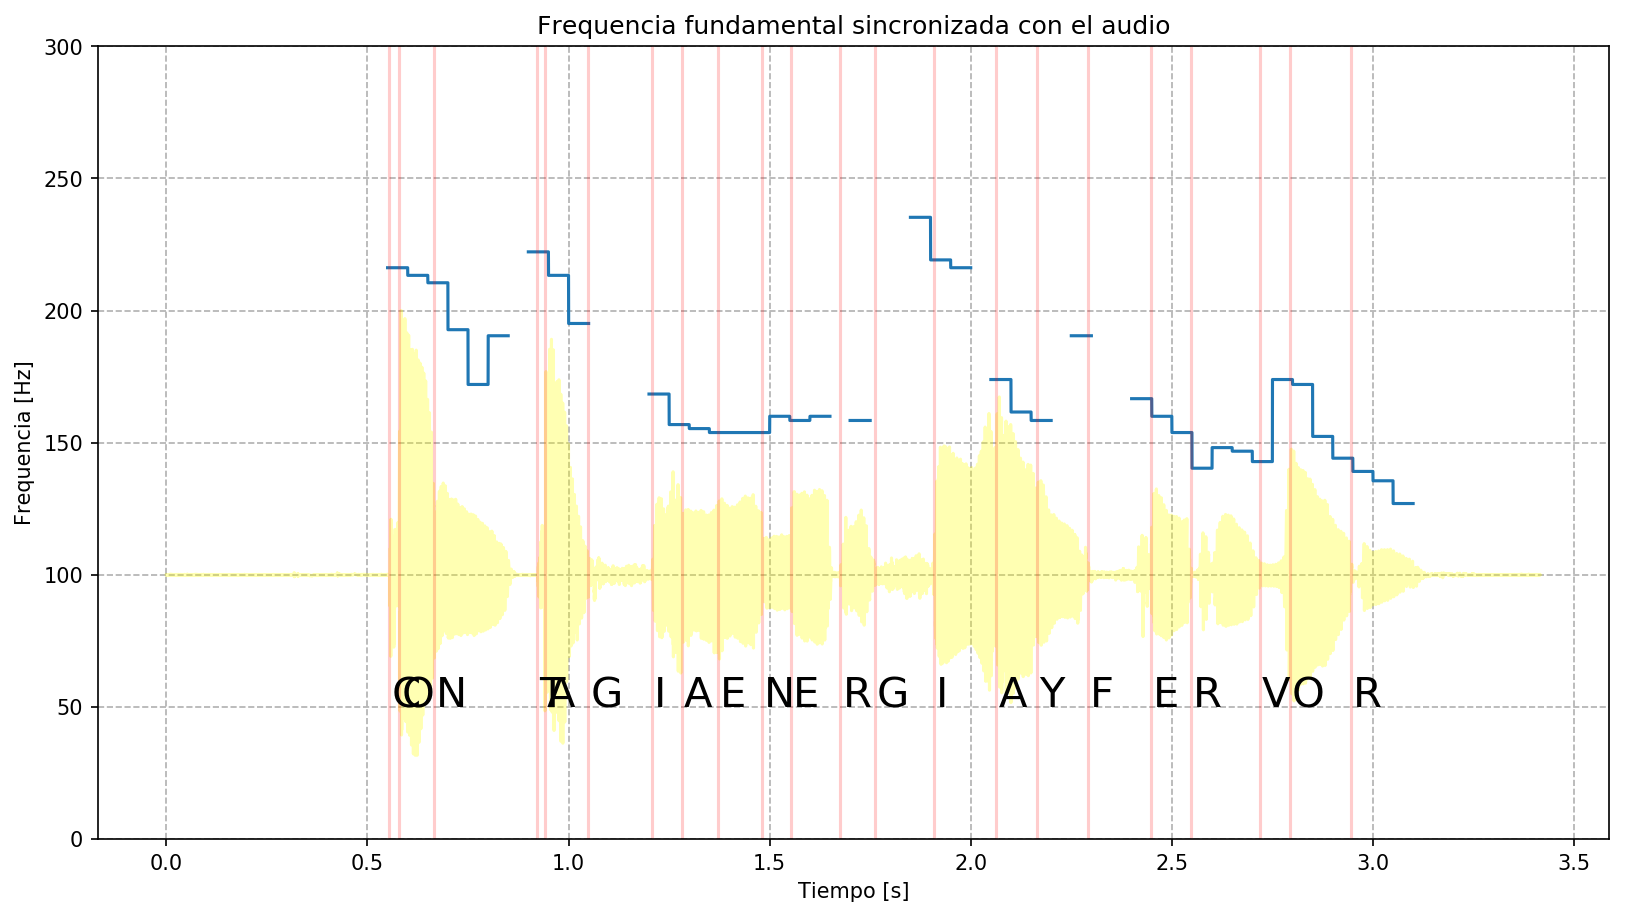

In [602]:
from tp.vocal import Letter, Utils

def f0_Cepstum(Y, FS):
    C = Cepstrum.generate(Y)

    i_start = int(1 / 500 * FS)
    i_end = int(1 / 50 * FS)

    max_c = np.argmax(np.real(C[i_start: i_end]))

    max_q = (i_start + max_c) / FS

    return 1 / max_q


def collect_F0(t, x, fs, window_time = 0.05, **kwargs):
    window_size = int(window_time * fs)
    print("Tamaño de ventana de tiempo: %fs" % (window_time))

    n_segments = len(x) // window_size

    segments = np.array_split(x, n_segments)
    f0s = []
    for segment in segments:
        if np.max(np.abs(segment)) > kwargs.get("umbral", 1000): 
            f0s.append(fundamental_freq(segment, fs))
        else:
            f0s.append(0)

    f0s = np.array(f0s)

    f0s = np.repeat(f0s, window_size)
    f0s = np.pad(f0s, (0, len(t) - len(f0s)), 'constant', constant_values=(0, 0))
    f0s[f0s < 80] = float('nan')
    return f0s

F0s = collect_F0(X, Y*Y_max, FS)
plt.plot(t, 100*x/max(x) + 100, alpha = 0.3, color="yellow")
plt.plot(t, f0s)
plt.grid(linestyle='dashed')
plt.title("Frequencia fundamental sincronizada con el audio")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frequencia [Hz]")
plt.ylim([0,300])
for letter in Letter.LETTERS_POSITION:
    plt.axvline(x=letter.start, color="red", alpha=0.2)
    plt.text(letter.start + 0.005, 50, letter.char, fontsize=20)
plt.show()

## 11) Aplique el método PSOLA para aumentar y disminuir un 10%, 20% y 30% la frecuencia fundamental de la voz en el archivo hh15.wav. Para ello utilice la curva de frecuencia fundamental obtenida en el ejercicio anterior.

## 12) Aplique el método PSOLA para aumentar y disminuir un 10%, 20% y 30% la duración de la voz en el archivo hh15.wav. Para ello utilice la curva de frecuencia fundamental obtenida en el ejercicio anterior.

## 13) Modifique la frecuencia fundamental de las vocales sintetizadas del ejercicio 8 desde 200 a 300 Hz en forma lineal. Escuche la onda resultante, ¿cómo se percibe el cambio en la frecuencia fundamental? Estime el F0 resultante y compárelo con el teórico.

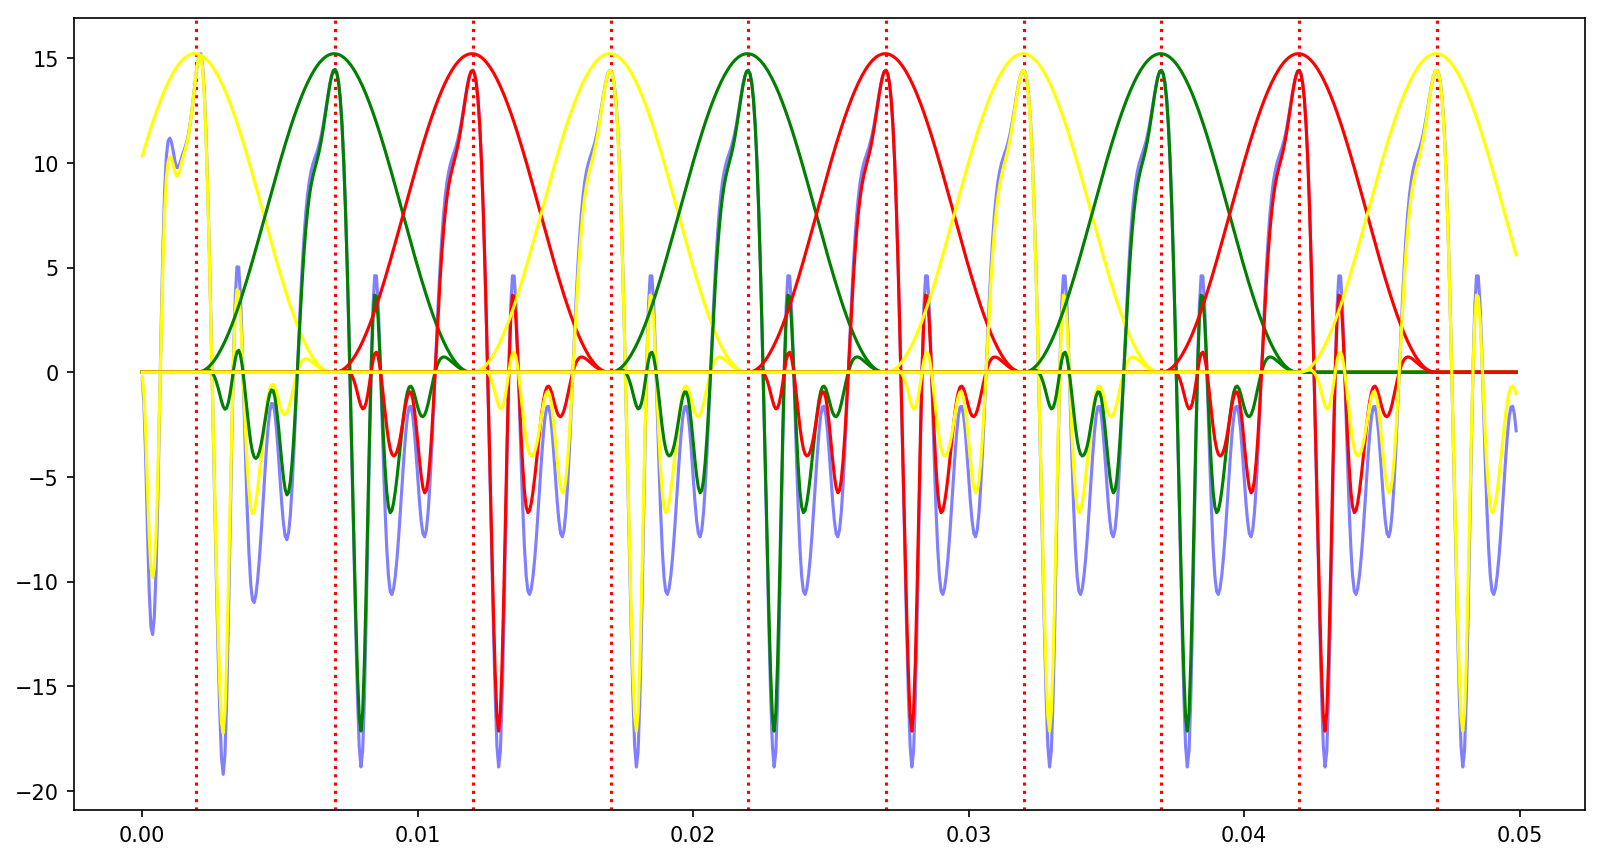

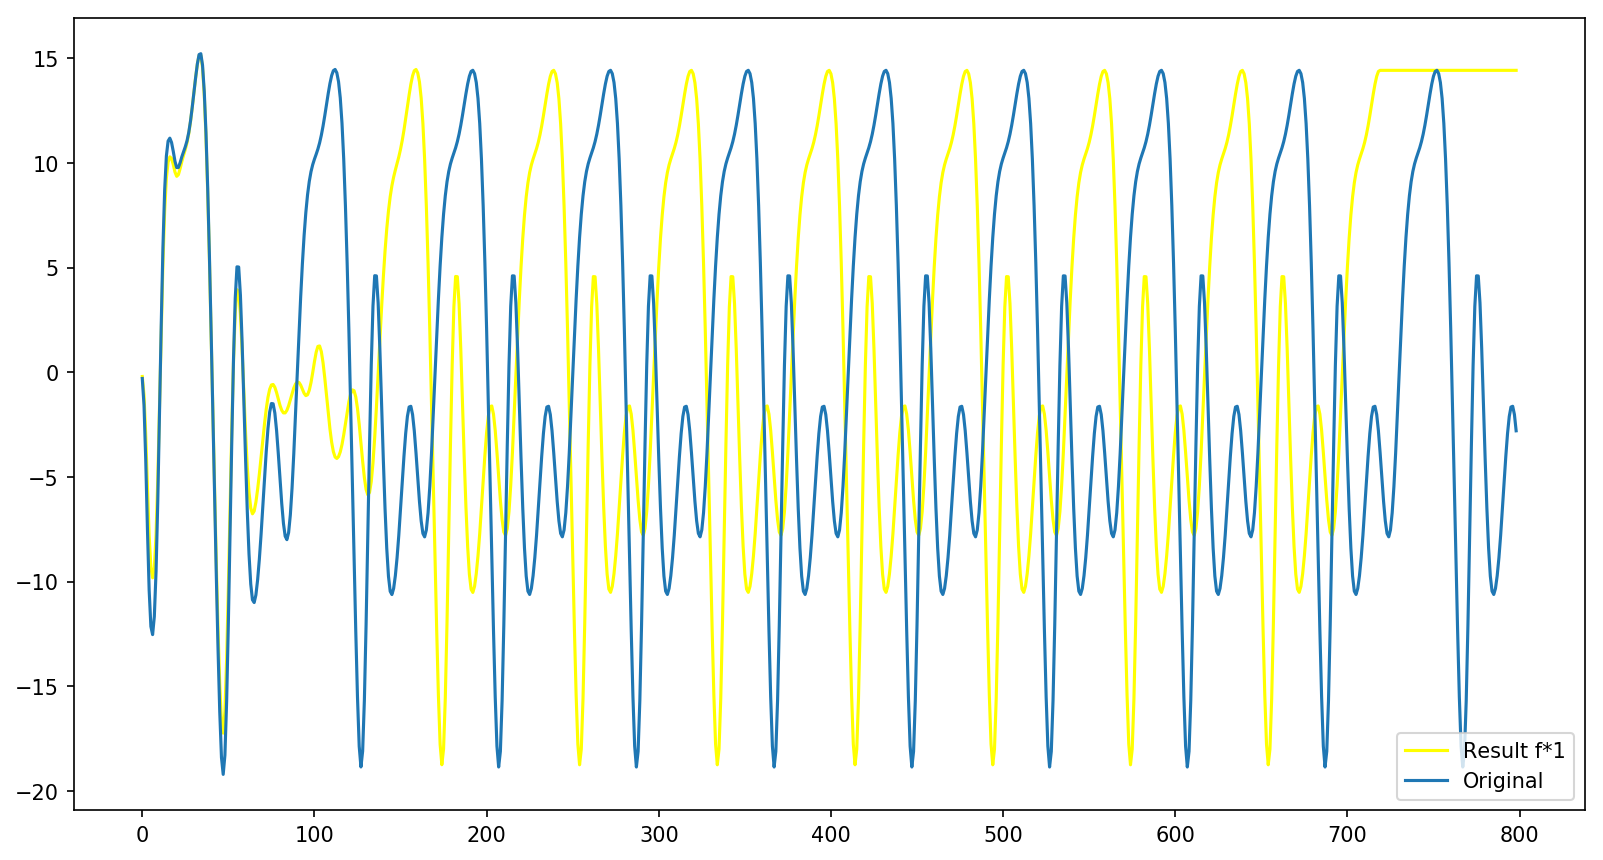

In [839]:

def PSOLA(x, fs, sonorous_segments, f0s, new_f0_pct, plot=True):
 
    for sonorous_segment in sonorous_segments:
        x_start = int(sonorous_segment[0] * fs)
        x_end = int(sonorous_segment[1] * fs)
        x_segment = x[x_start:x_end]
        peaks_idxs = signal.find_peaks_cwt(x_segment, np.arange(1, 100))
 
        diffs = []
        prev = None
        for peak in peaks_idxs:
            if (prev != None):
                diffs.append(peak - prev)
            prev = peak
        mean_diff = np.mean(np.array(diffs))
 
        # Tomamos aproximadamente 2 periodos como ancho de ventana
        window_size = int(mean_diff * 2)
        
        windows = []
        windows_data = []
        for n, peak_idx in enumerate(peaks_idxs):
            window = np.hanning(window_size)

            win_start = peak_idx - window_size // 2
            win_end = win_start + len(window)
 
            if(win_start < 0):
                window = window[-win_start:]
                win_start = 0
            if (win_end > len(x_segment)):
                window = window[:len(x_segment)]
                win_end = len(x_segment)
                    
 
            full_window = np.zeros(len(x_segment))
            full_window[win_start:win_end] = window[:win_end - win_start]
            windows_data.append({
                "full": full_window,
                "center_id": peak_idx
            })
            windows.append(full_window)
 
        start_idx = np.nonzero(windows[0])[0][0]
        end_idx = np.nonzero(windows[-1])[0][-1]
        starting_x_window = np.zeros(len(x_segment))
        starting_x_window[:start_idx] = 1
        starting_x_window[end_idx:] = 1
 
        segmented_x = x_segment * starting_x_window

        
        windows_signal = [] #Falta la primera y la ultima con la mitad de la ventana
        for window in windows:
            windows_signal.append(x_segment * window) #0000000012312512341200000000
            #segmented_x += x_segment * window
 
        if (plot):
            t = np.arange(0, len(x) / fs, 1 / fs)[x_start:x_end]
            plt.plot(t, x_segment, color="blue", alpha=0.5)
            
            for peak_idx in peaks_idxs:
                plt.axvline(x=t[peak_idx], color='r', linestyle='dotted')
             
            colors = ["red", "yellow","green"]
            icolor = 1
            for wsignal, wind in zip(windows_signal,windows):
                c = colors[icolor % len(colors)]
                plt.plot(t, wind*max(x_segment), color=c)
                plt.plot(t, wsignal, color=c)
                icolor+=1
            #plt.show()
 
            #plt.plot(t, x_segment)
            #plt.plot(t, segmented_x)
            #plot = False # Only plot first
            plt.show()
            
        result = np.zeros(int(len(x_segment) if new_f0_pct < 1 else len(x_segment)*new_f0_pct))
        index_actual = 0
        for i, wsignal in enumerate(windows_signal):
            signal_window = np.trim_zeros(wsignal)
            if index_actual + len(signal_window) < len(result):
                result[index_actual:index_actual + len(signal_window)] += signal_window
            else:
                cant_index = len(result[index_actual:])
                result[index_actual:] = signal_window[cant_index]
            index_actual += int(mean_diff * new_f0_pct)
        
        # Ajuste de final si la nueva senal es mas corta
        
        if new_f0_pct < 1:
            ultima_senal = windows_signal[-1]
            while index_actual < len(x_segment):
                signal_window = np.trim_zeros(ultima_senal)
                if index_actual + len(signal_window) < len(x_segment):
                    result[index_actual:index_actual + len(signal_window)] += signal_window
                else:
                    cant_index = len(result[index_actual:])
                    result[index_actual:] = signal_window[:cant_index]
                index_actual += int(mean_diff * new_f0_pct)
        else:
            result = result[:len(x_segment)]
        
        plt.plot(result, color="yellow")
        plt.plot(x_segment)
        plt.legend(["Result f*{}".format(new_f0_pct), "Original"])
        plt.show()
            

 




t, x = VOCALS['a']['sint']
f0s = np.zeros(len(x)) #fundamental_freqs(x, fs)

sonorous_segs = [(0, t[-1])]

new_f0_pct = 1
PSOLA(x, FS, sonorous_segs, f0s, new_f0_pct)




## 14) Repita el ejercicio anterior pero esta vez variando la frecuencia fundamental desde 200 a 100 Hz.

## 15) Aplique un filtro a las vocales sintetizadas del ejercicio 8 para eliminar la frecuencia fundamental. Puede utilizar la herramienta fdatool para diseñar el filtro. Justifique el filtro implementado. Grafique ambas señales, haga un análisis en frecuencia y compare. ¿Perceptualmente se nota alguna diferencia? ¿Porqué?.

Guardado: "out/A-sin_PA-200.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


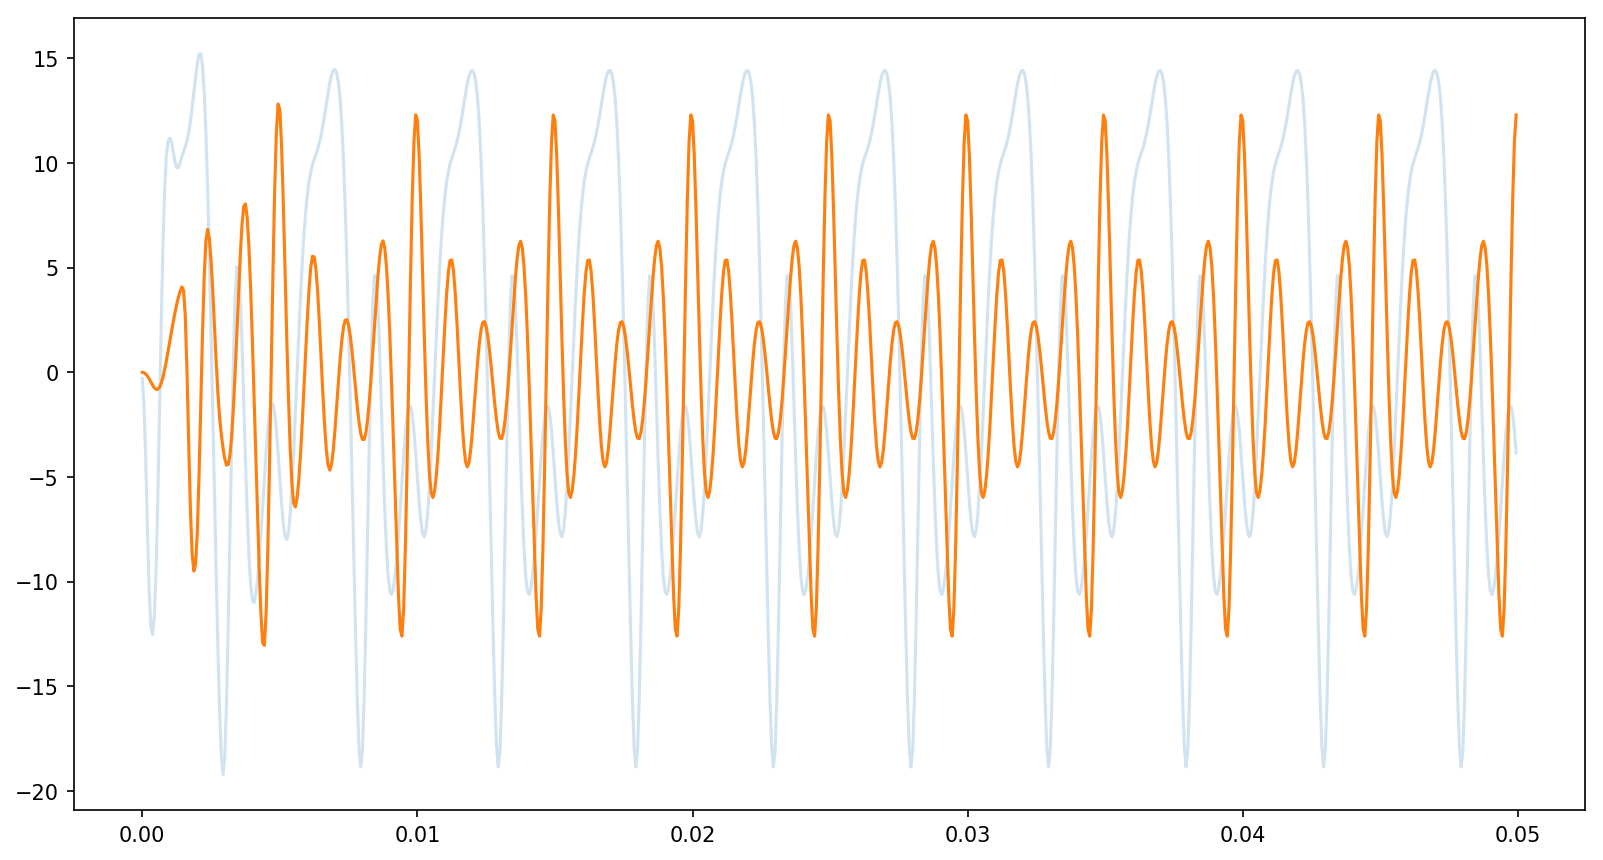

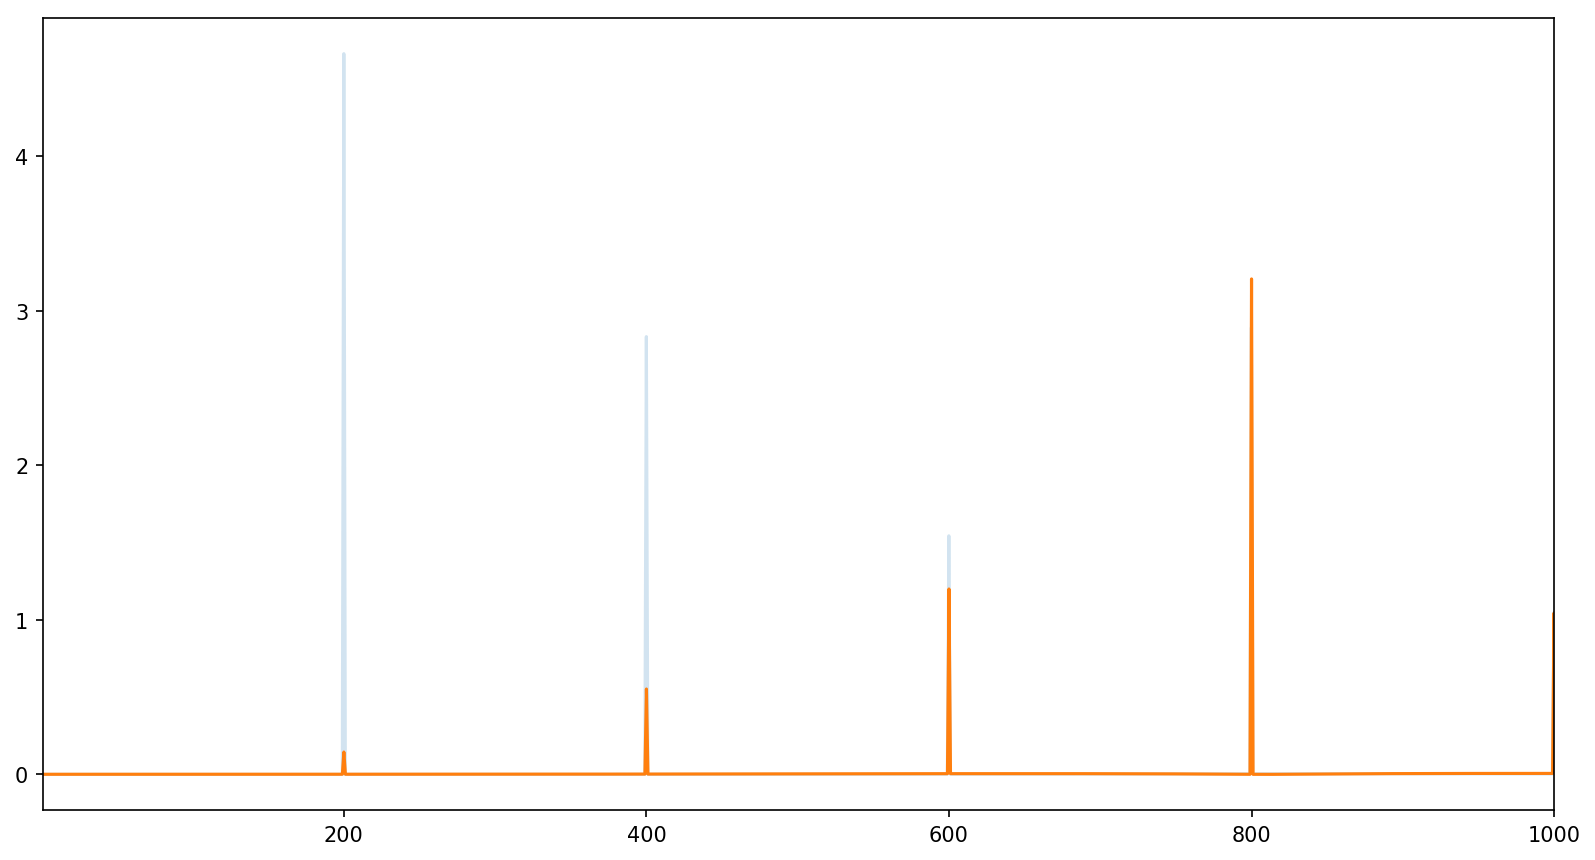

Guardado: "out/E-sin_PA-200.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


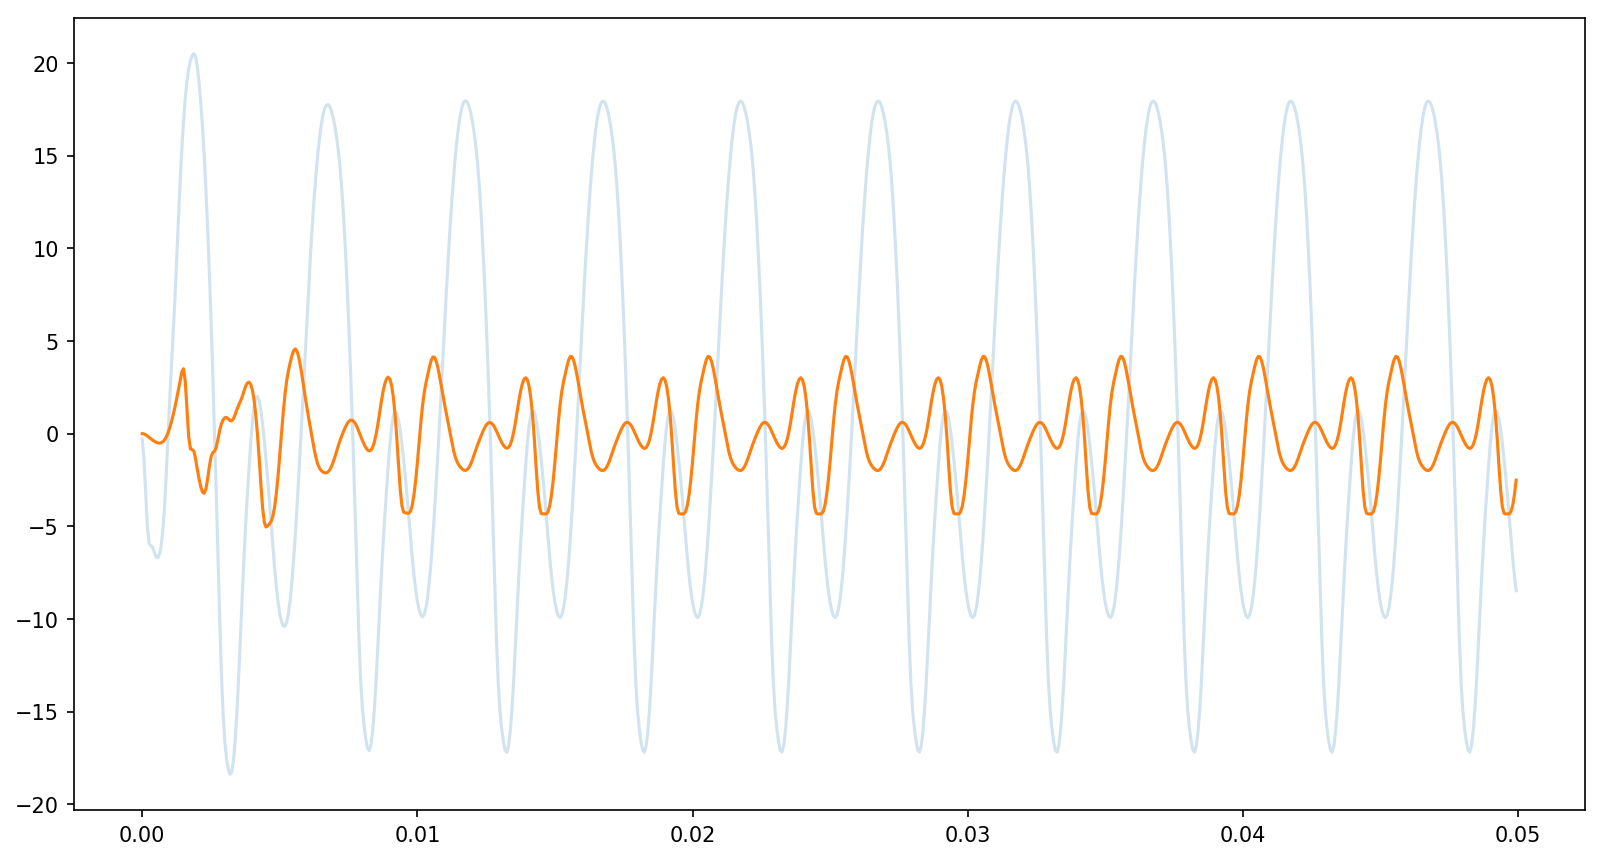

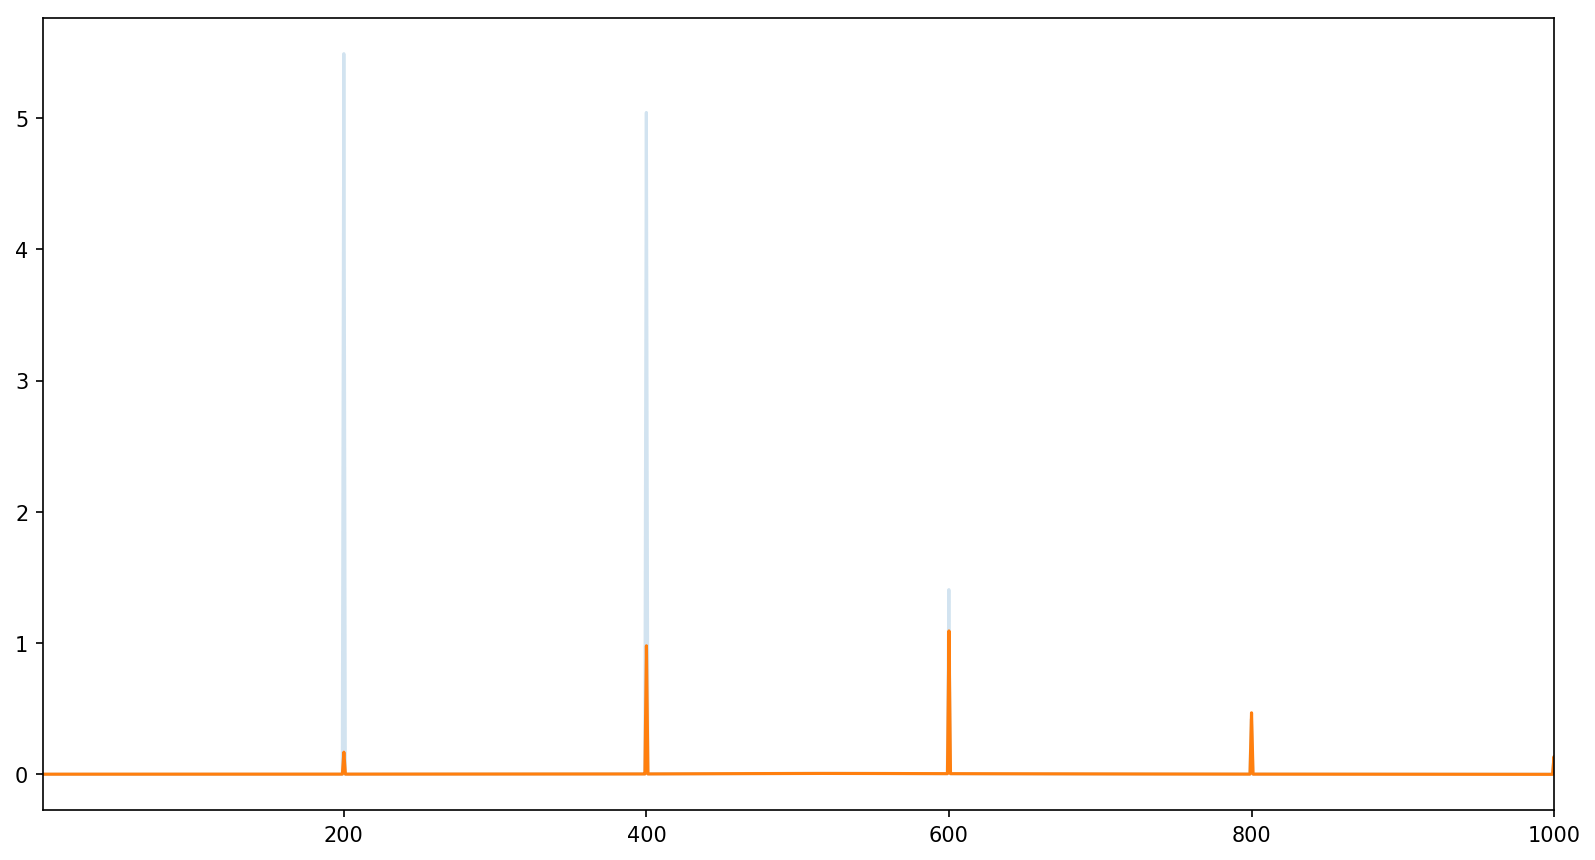

Guardado: "out/I-sin_PA-200.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


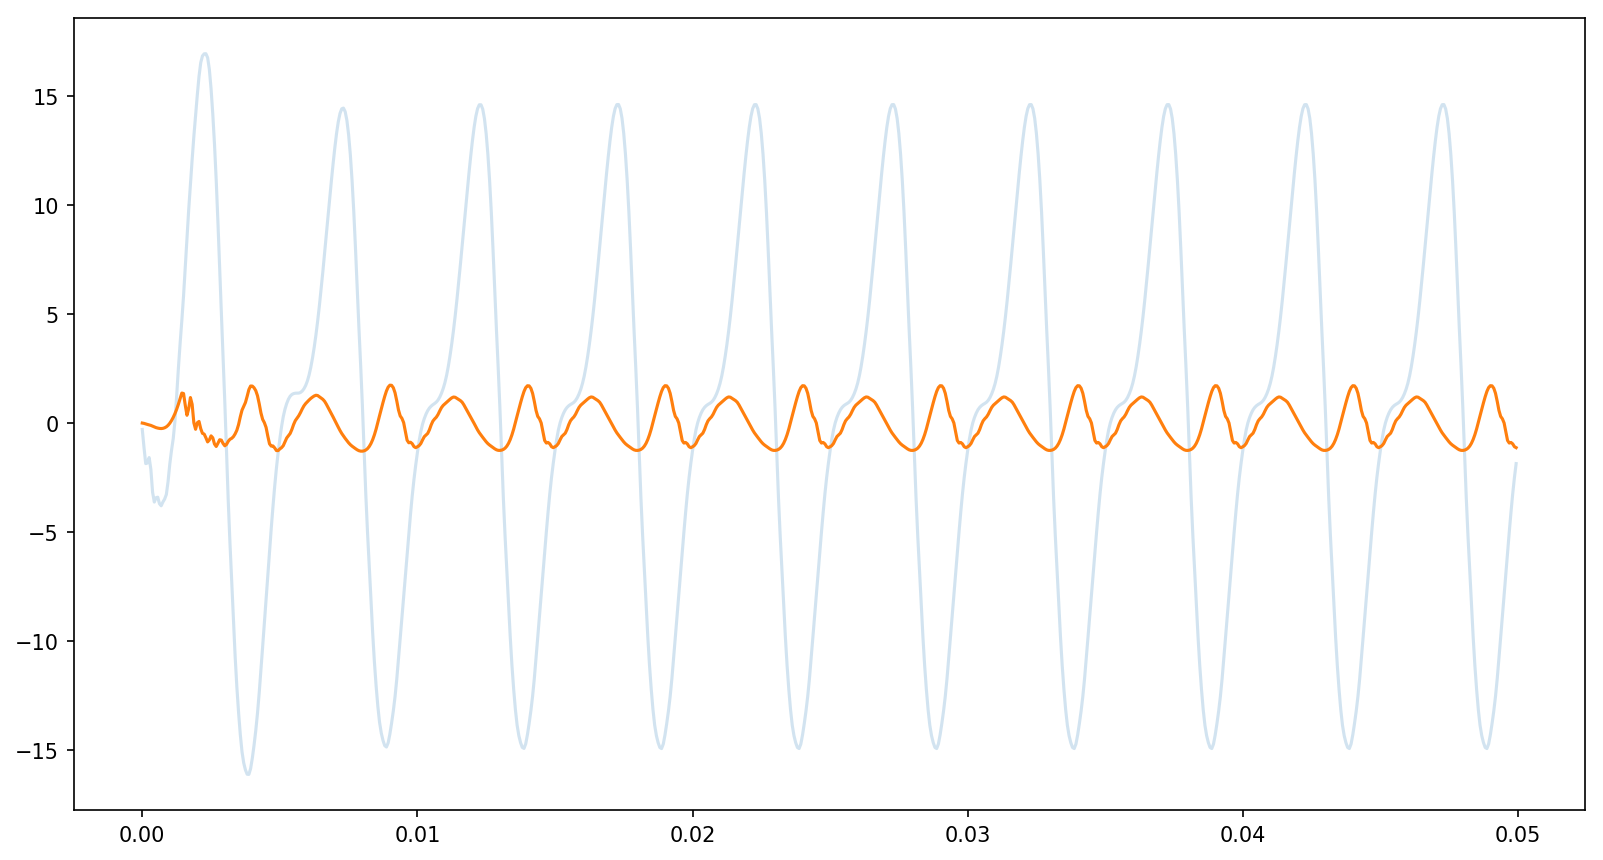

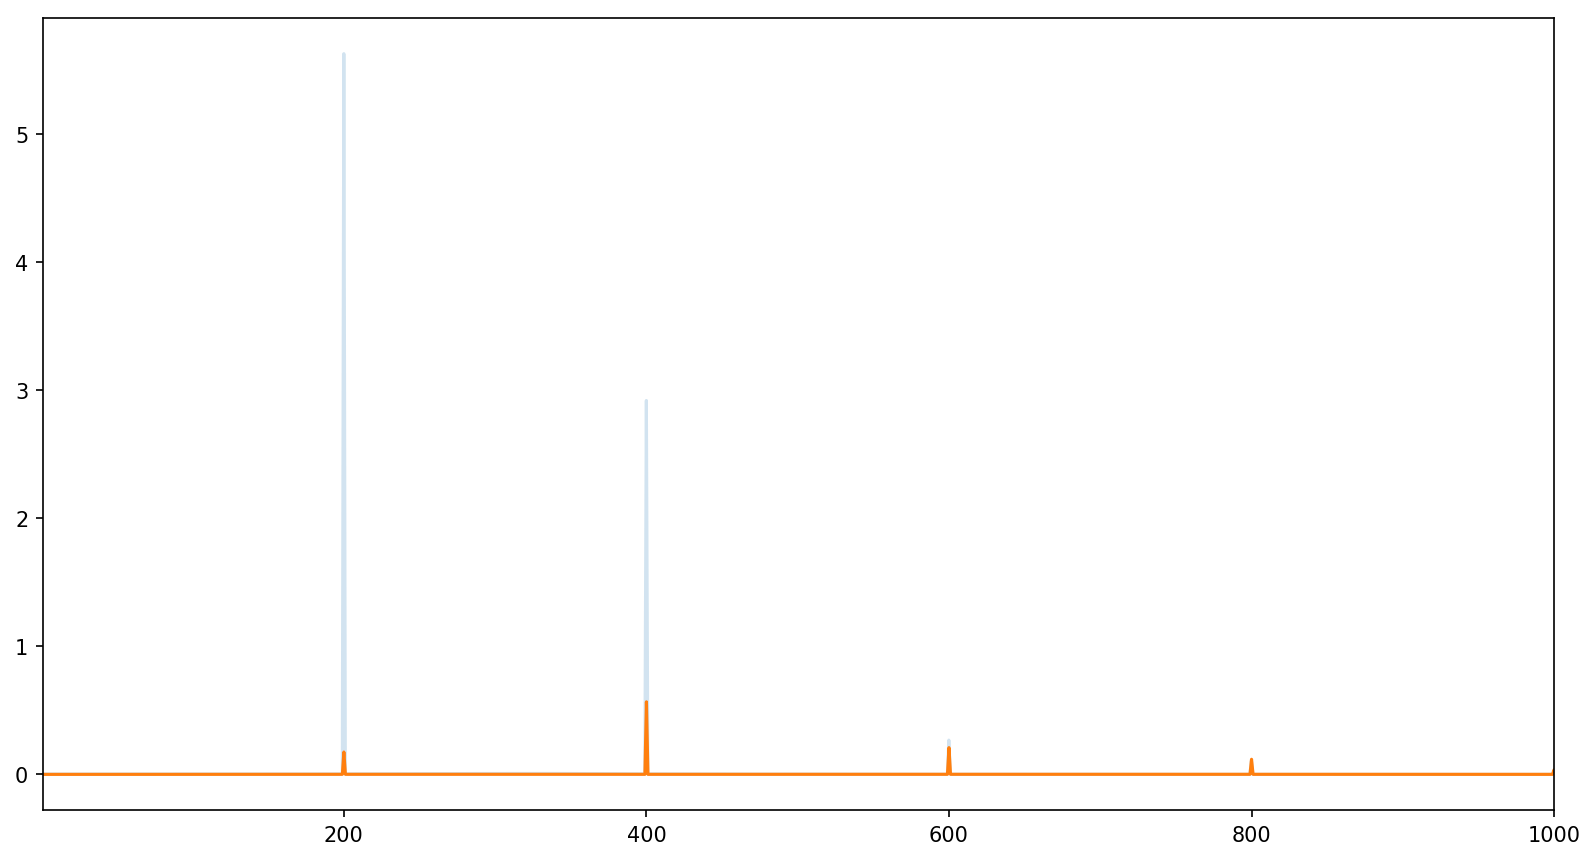

Guardado: "out/O-sin_PA-200.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


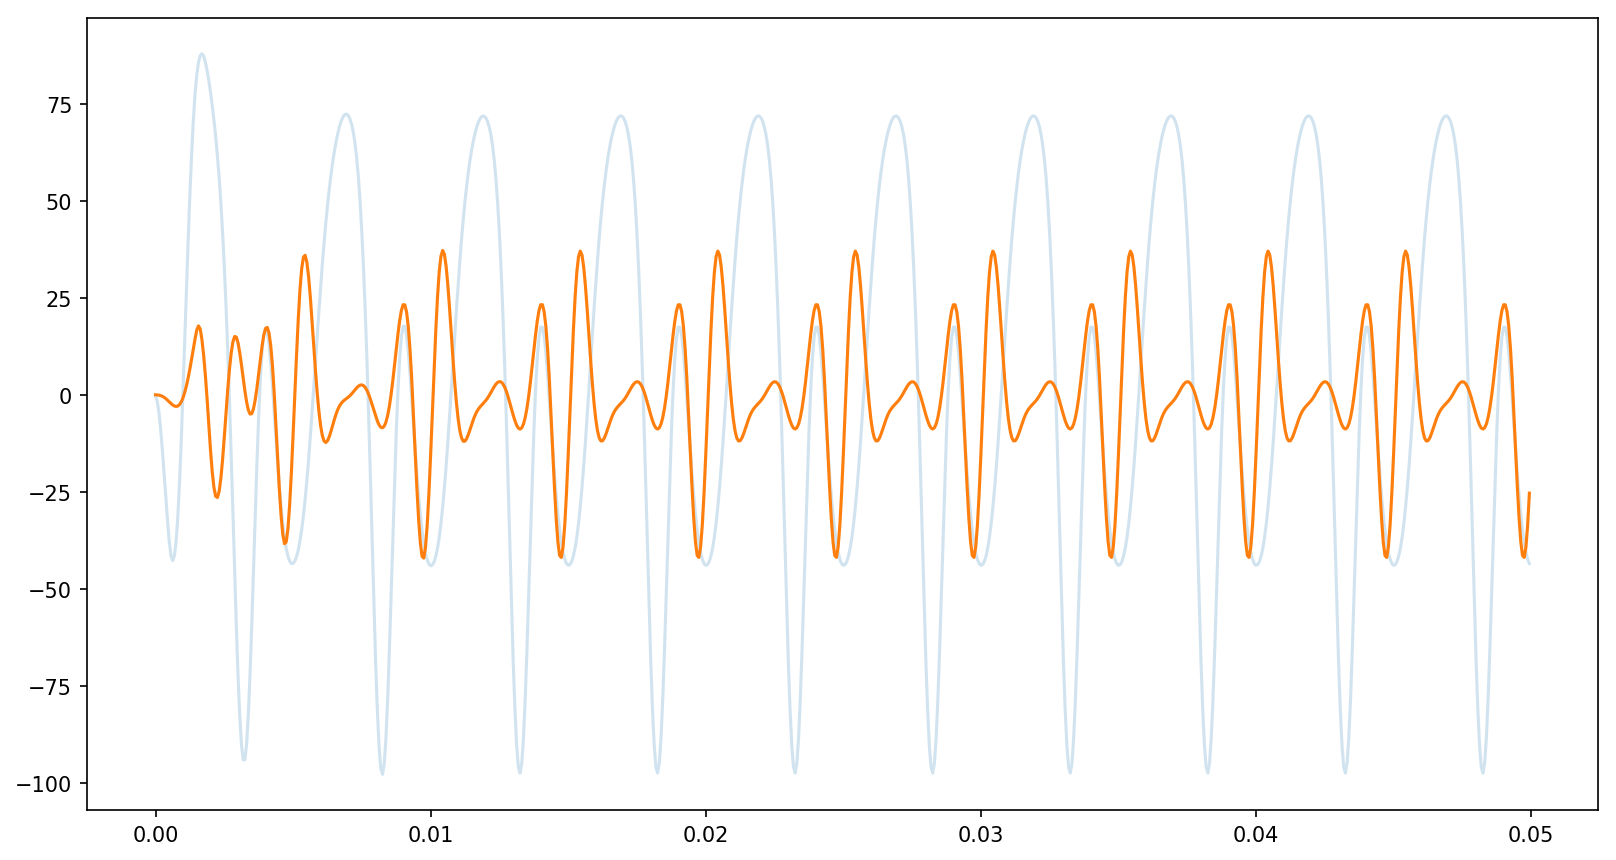

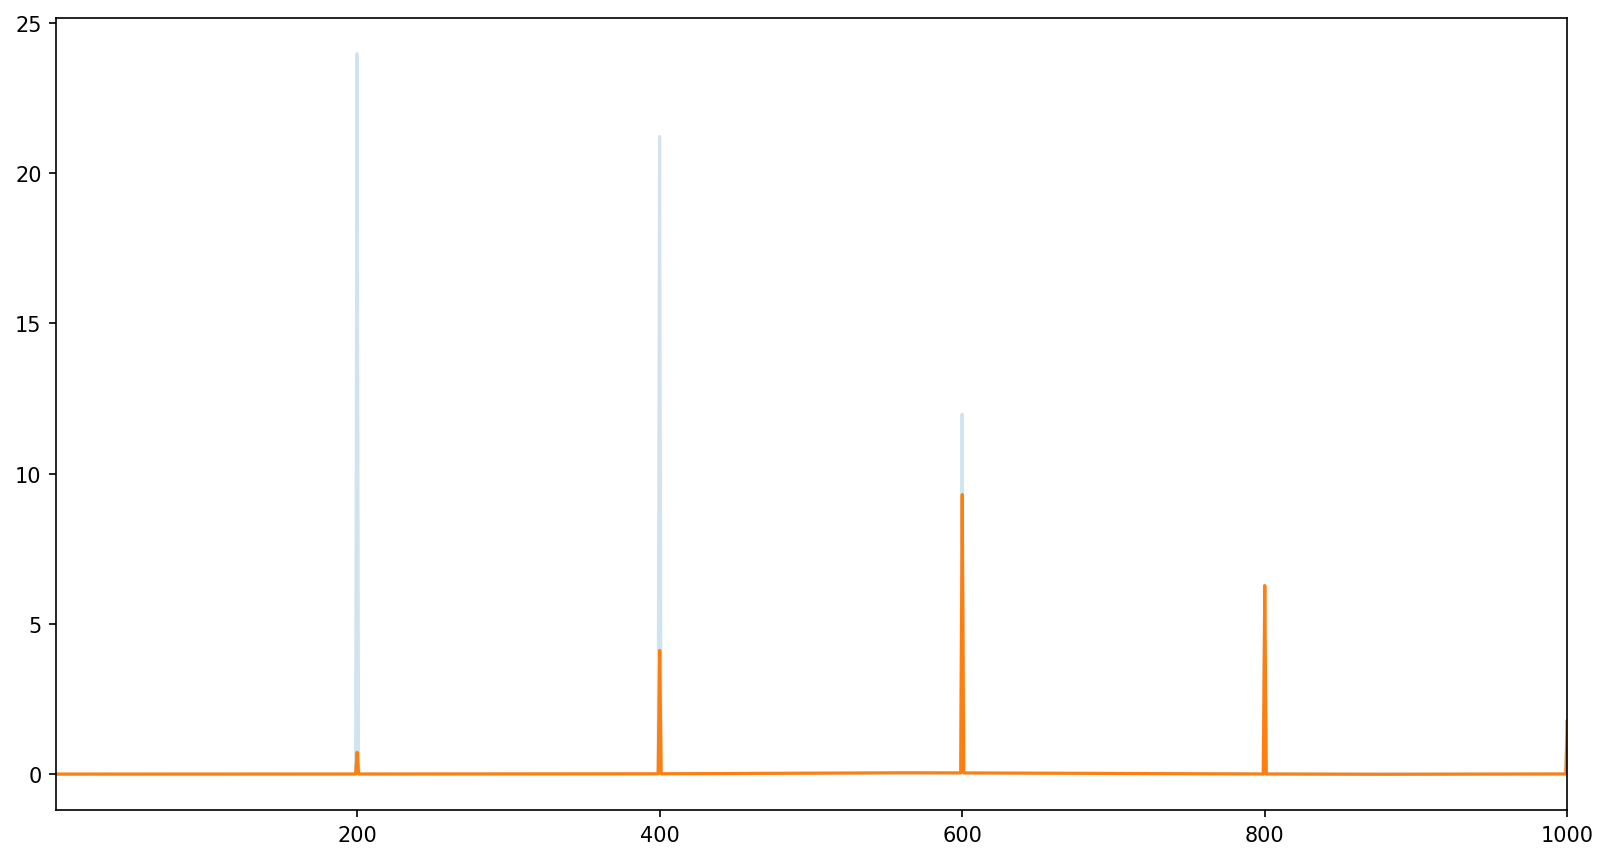

Guardado: "out/U-sin_PA-200.wav" [Duracion: 1.0 seg., FS:16000, Muestras: 16000]


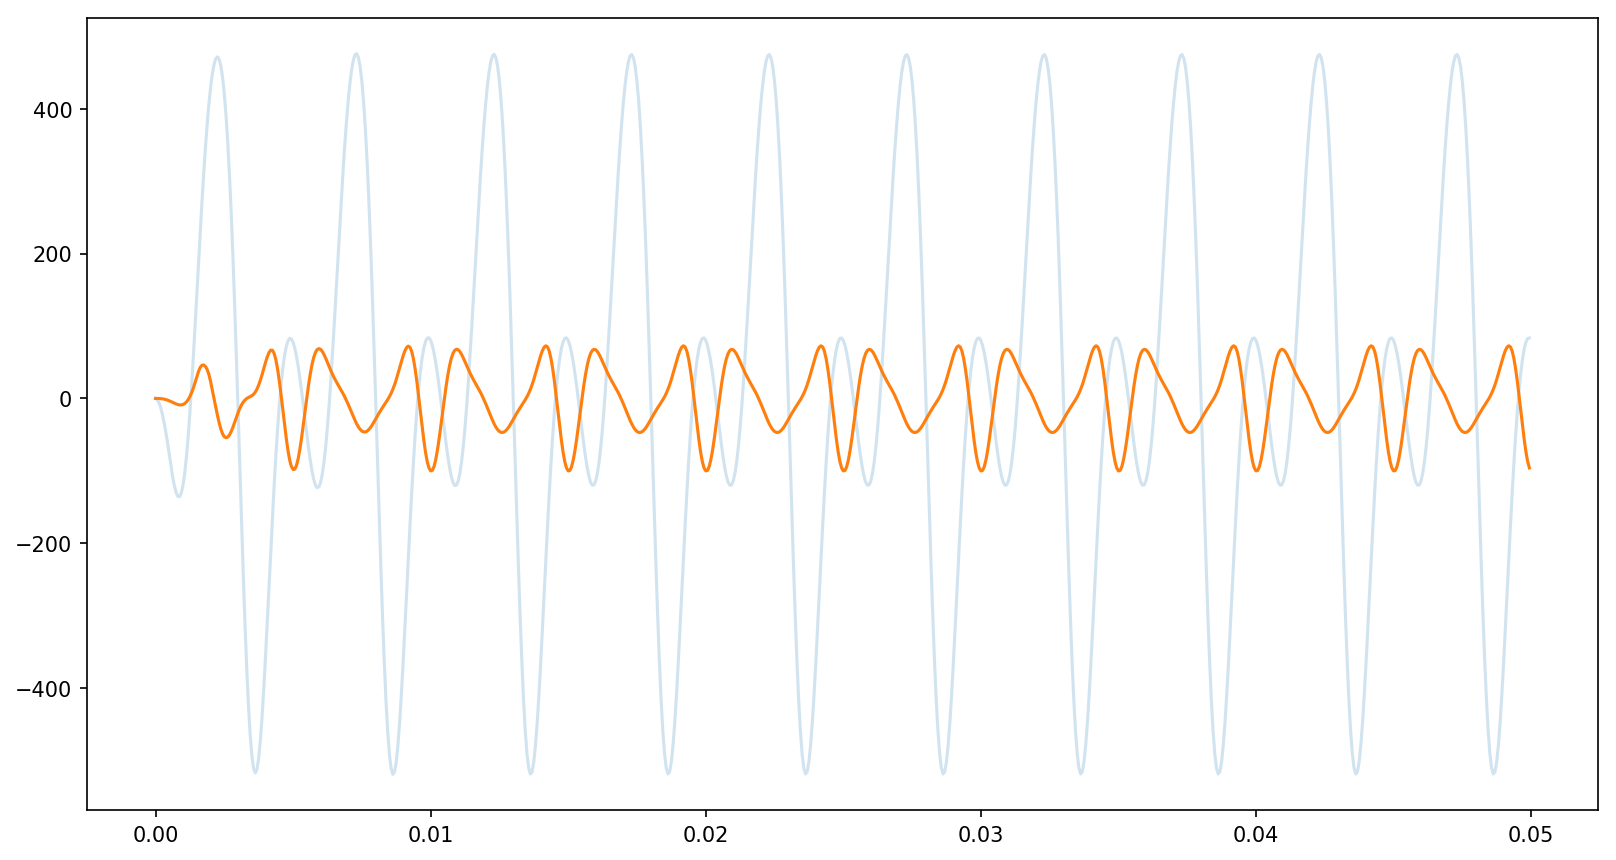

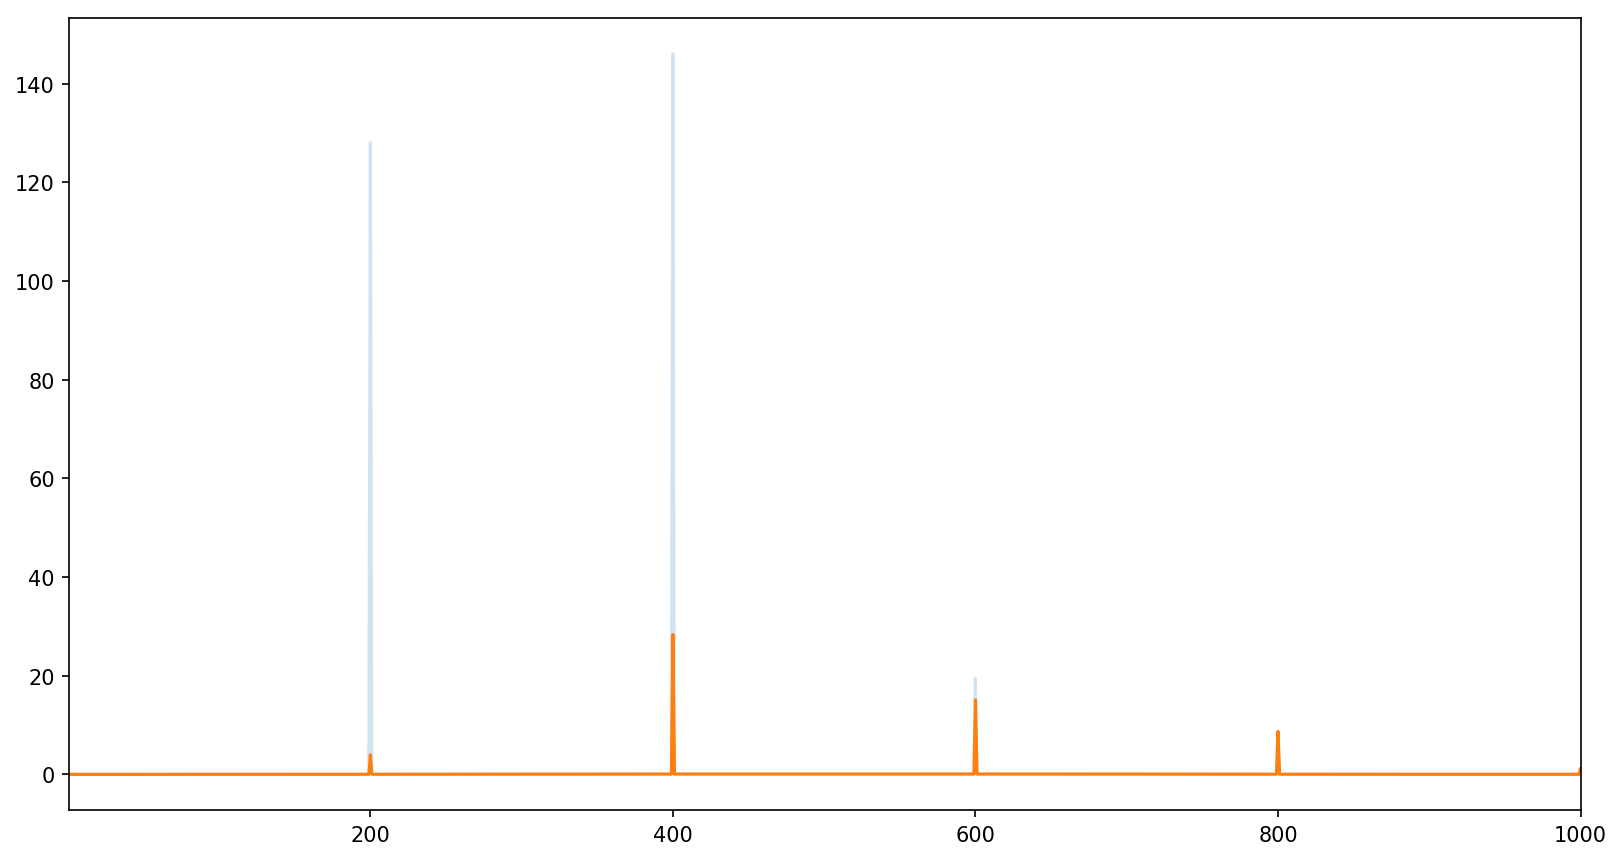

In [680]:
from scipy import signal

import numpy as np

def generate_filter():
    # Configuration.
    fS = 16000  # Sampling rate.
    fH = 500  # Cutoff frequency.
    N = 49  # Filter length, must be odd.

    # Compute sinc filter.
    h = np.sinc(2 * fH / fS * (np.arange(N) - (N - 1) / 2.))

    # Normalize to get unity gain.
    h /= np.sum(h)

    # Create a high-pass filter from the low-pass filter through spectral inversion.
    h = -h
    h[(N - 1) // 2] += 1

    # Applying the filter to a signal s can be as simple as writing
    # s = np.convolve(s, h)
    
    return h


h = generate_filter()

for vocal in VOCALS:
    t, sint = VOCALS[vocal]["sint_large"]

    y = np.convolve(sint, h)[:len(t)]
    store_wav(y, FS, "{}-sin_PA-200".format(vocal.upper()))

    plt.plot(t[:800],sint[:800], alpha=0.2)
    plt.plot(t[:800],y[:800])
    plt.show()

    sp_o = np.abs(np.fft.rfft(sint)/len(sint))
    sp_n = np.abs(np.fft.rfft(y)/len(y))
    ts = np.arange(0, FS/2, (FS/2)/len(sp_o))
    plt.plot(ts, sp_o, alpha=0.2)
    plt.plot(sp_n)
    plt.xlim(1,1e3)
    plt.show()